In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df = pd.read_csv(r'/content/Microsoft_Stock.csv')

In [ ]:
df['Close'] = df['Close']

In [ ]:
train = df.Close[0:-30]
test = df.Close[-30:]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
#Holt Parameters:
#    endog (array-like) – Time series
#    expoential (bool, optional) – Type of trend component.
#    damped (bool, optional) – Should the trend component be damped.

In [ ]:
#fit Parameters:
#    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
#    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
#    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
#    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
1481    238.157125
1482    238.157876
1483    238.157952
1484    238.157959
1485    238.157960
1486    238.157960
1487    238.157960
1488    238.157960
1489    238.157960
1490    238.157960
1491    238.157960
1492    238.157960
1493    238.157960
1494    238.157960
1495    238.157960
1496    238.157960
1497    238.157960
1498    238.157960
1499    238.157960
1500    238.157960
1501    238.157960
1502    238.157960
1503    238.157960
1504    238.157960
1505    238.157960
1506    238.157960
1507    238.157960
1508    238.157960
1509    238.157960
1510    238.157960
dtype: float64
 RMSE is 5.537473970615601
0.1 0.2 0.1 True
1481    238.252618
1482    238.254099
1483    238.254248
1484    238.254262
1485    238.254264
1486    238.254264
1487    238.254264
1488    238.254264
1489    238.254264
1490    238.254264
1491    238.254264
1492    238.254264
1493    238.254264
1494    238.254264
1495    238.254264
1496    238.254264
1497    238.254264
1498    238.254264
1499    238.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    238.346514
1482    238.348704
1483    238.348923
1484    238.348945
1485    238.348947
1486    238.348948
1487    238.348948
1488    238.348948
1489    238.348948
1490    238.348948
1491    238.348948
1492    238.348948
1493    238.348948
1494    238.348948
1495    238.348948
1496    238.348948
1497    238.348948
1498    238.348948
1499    238.348948
1500    238.348948
1501    238.348948
1502    238.348948
1503    238.348948
1504    238.348948
1505    238.348948
1506    238.348948
1507    238.348948
1508    238.348948
1509    238.348948
1510    238.348948
dtype: float64
 RMSE is 5.679006030206267
0.1 0.4 0.1 True
1481    238.438843
1482    238.441721
1483    238.442009
1484    238.442037
1485    238.442040
1486    238.442041
1487    238.442041
1488    238.442041
1489    238.442041
1490    238.442041
1491    238.442041
1492    238.442041
1493    238.442041
1494    238.442041
1495    238.442041
1496    238.442041
1497    238.442041
1498    238.442041
1499    238.442041
1500    23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini


 RMSE is 5.818504834660827
0.1 0.6 0.1 True
1481    238.618912
1482    238.623105
1483    238.623524
1484    238.623566
1485    238.623570
1486    238.623571
1487    238.623571
1488    238.623571
1489    238.623571
1490    238.623571
1491    238.623571
1492    238.623571
1493    238.623571
1494    238.623571
1495    238.623571
1496    238.623571
1497    238.623571
1498    238.623571
1499    238.623571
1500    238.623571
1501    238.623571
1502    238.623571
1503    238.623571
1504    238.623571
1505    238.623571
1506    238.623571
1507    238.623571
1508    238.623571
1509    238.623571
1510    238.623571
dtype: float64
 RMSE is 5.887405216887669
0.1 0.7 0.1 True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    238.706708
1482    238.711529
1483    238.712011
1484    238.712059
1485    238.712064
1486    238.712064
1487    238.712065
1488    238.712065
1489    238.712065
1490    238.712065
1491    238.712065
1492    238.712065
1493    238.712065
1494    238.712065
1495    238.712065
1496    238.712065
1497    238.712065
1498    238.712065
1499    238.712065
1500    238.712065
1501    238.712065
1502    238.712065
1503    238.712065
1504    238.712065
1505    238.712065
1506    238.712065
1507    238.712065
1508    238.712065
1509    238.712065
1510    238.712065
dtype: float64
 RMSE is 5.955701301080386
0.1 0.8 0.1 True
1481    238.793047
1482    238.798477
1483    238.799020
1484    238.799075
1485    238.799080
1486    238.799081
1487    238.799081
1488    238.799081
1489    238.799081
1490    238.799081
1491    238.799081
1492    238.799081
1493    238.799081
1494    238.799081
1495    238.799081
1496    238.799081
1497    238.799081
1498    238.799081
1499    238.799081
1500    23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    242.669244
1482    242.669672
1483    242.669714
1484    242.669719
1485    242.669719
1486    242.669719
1487    242.669719
1488    242.669719
1489    242.669719
1490    242.669719
1491    242.669719
1492    242.669719
1493    242.669719
1494    242.669719
1495    242.669719
1496    242.669719
1497    242.669719
1498    242.669719
1499    242.669719
1500    242.669719
1501    242.669719
1502    242.669719
1503    242.669719
1504    242.669719
1505    242.669719
1506    242.669719
1507    242.669719
1508    242.669719
1509    242.669719
1510    242.669719
dtype: float64
 RMSE is 9.361911642581875
0.2 0.2 0.1 True
1481    242.712677
1482    242.713510
1483    242.713594
1484    242.713602
1485    242.713603
1486    242.713603
1487    242.713603
1488    242.713603
1489    242.713603
1490    242.713603
1491    242.713603
1492    242.713603
1493    242.713603
1494    242.713603
1495    242.713603
1496    242.713603
1497    242.713603
1498    242.713603
1499    242.713603
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    242.795556
1482    242.797138
1483    242.797297
1484    242.797312
1485    242.797314
1486    242.797314
1487    242.797314
1488    242.797314
1489    242.797314
1490    242.797314
1491    242.797314
1492    242.797314
1493    242.797314
1494    242.797314
1495    242.797314
1496    242.797314
1497    242.797314
1498    242.797314
1499    242.797314
1500    242.797314
1501    242.797314
1502    242.797314
1503    242.797314
1504    242.797314
1505    242.797314
1506    242.797314
1507    242.797314
1508    242.797314
1509    242.797314
1510    242.797314
dtype: float64
 RMSE is 9.478865370109792
0.2 0.5 0.1 True
1481    242.835088
1482    242.837015
1483    242.837207
1484    242.837227
1485    242.837229
1486    242.837229
1487    242.837229
1488    242.837229
1489    242.837229
1490    242.837229
1491    242.837229
1492    242.837229
1493    242.837229
1494    242.837229
1495    242.837229
1496    242.837229
1497    242.837229
1498    242.837229
1499    242.837229
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    242.910538
1482    242.913099
1483    242.913355
1484    242.913381
1485    242.913383
1486    242.913383
1487    242.913383
1488    242.913383
1489    242.913383
1490    242.913383
1491    242.913383
1492    242.913383
1493    242.913383
1494    242.913383
1495    242.913383
1496    242.913383
1497    242.913383
1498    242.913383
1499    242.913383
1500    242.913383
1501    242.913383
1502    242.913383
1503    242.913383
1504    242.913383
1505    242.913383
1506    242.913383
1507    242.913383
1508    242.913383
1509    242.913383
1510    242.913383
dtype: float64
 RMSE is 9.585489118124574
0.2 0.8 0.1 True
1481    242.946533
1482    242.949385
1483    242.949671
1484    242.949699
1485    242.949702
1486    242.949702
1487    242.949702
1488    242.949702
1489    242.949702
1490    242.949702
1491    242.949702
1492    242.949702
1493    242.949702
1494    242.949702
1495    242.949702
1496    242.949702
1497    242.949702
1498    242.949702
1499    242.949702
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

 RMSE is 10.346396257150387
0.3 0.2 0.1 True
1481    243.751914
1482    243.752328
1483    243.752370
1484    243.752374
1485    243.752374
1486    243.752375
1487    243.752375
1488    243.752375
1489    243.752375
1490    243.752375
1491    243.752375
1492    243.752375
1493    243.752375
1494    243.752375
1495    243.752375
1496    243.752375
1497    243.752375
1498    243.752375
1499    243.752375
1500    243.752375
1501    243.752375
1502    243.752375
1503    243.752375
1504    243.752375
1505    243.752375
1506    243.752375
1507    243.752375
1508    243.752375
1509    243.752375
1510    243.752375
dtype: float64
 RMSE is 10.362227789108415
0.3 0.3 0.1 True
1481    243.767992
1482    243.768593
1483    243.768653
1484    243.768659
1485    243.768660
1486    243.768660
1487    243.768660
1488    243.768660
1489    243.768660
1490    243.768660
1491    243.768660
1492    243.768660
1493    243.768660
1494    243.768660
1495    243.768660
1496    243.768660
1497    243.768660
14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.783405
1482    243.784180
1483    243.784257
1484    243.784265
1485    243.784266
1486    243.784266
1487    243.784266
1488    243.784266
1489    243.784266
1490    243.784266
1491    243.784266
1492    243.784266
1493    243.784266
1494    243.784266
1495    243.784266
1496    243.784266
1497    243.784266
1498    243.784266
1499    243.784266
1500    243.784266
1501    243.784266
1502    243.784266
1503    243.784266
1504    243.784266
1505    243.784266
1506    243.784266
1507    243.784266
1508    243.784266
1509    243.784266
1510    243.784266
dtype: float64
 RMSE is 10.39194332945591
0.3 0.5 0.1 True
1481    243.798183
1482    243.799119
1483    243.799213
1484    243.799222
1485    243.799223
1486    243.799223
1487    243.799223
1488    243.799223
1489    243.799223
1490    243.799223
1491    243.799223
1492    243.799223
1493    243.799223
1494    243.799223
1495    243.799223
1496    243.799223
1497    243.799223
1498    243.799223
1499    243.799223
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.825948
1482    243.827172
1483    243.827294
1484    243.827307
1485    243.827308
1486    243.827308
1487    243.827308
1488    243.827308
1489    243.827308
1490    243.827308
1491    243.827308
1492    243.827308
1493    243.827308
1494    243.827308
1495    243.827308
1496    243.827308
1497    243.827308
1498    243.827308
1499    243.827308
1500    243.827308
1501    243.827308
1502    243.827308
1503    243.827308
1504    243.827308
1505    243.827308
1506    243.827308
1507    243.827308
1508    243.827308
1509    243.827308
1510    243.827308
dtype: float64
 RMSE is 10.432069500659116
0.3 0.8 0.1 True
1481    243.838987
1482    243.840339
1483    243.840474
1484    243.840488
1485    243.840489
1486    243.840489
1487    243.840489
1488    243.840489
1489    243.840489
1490    243.840489
1491    243.840489
1492    243.840489
1493    243.840489
1494    243.840489
1495    243.840489
1496    243.840489
1497    243.840489
1498    243.840489
1499    243.840489
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.024376
1482    244.024487
1483    244.024498
1484    244.024499
1485    244.024499
1486    244.024499
1487    244.024499
1488    244.024499
1489    244.024499
1490    244.024499
1491    244.024499
1492    244.024499
1493    244.024499
1494    244.024499
1495    244.024499
1496    244.024499
1497    244.024499
1498    244.024499
1499    244.024499
1500    244.024499
1501    244.024499
1502    244.024499
1503    244.024499
1504    244.024499
1505    244.024499
1506    244.024499
1507    244.024499
1508    244.024499
1509    244.024499
1510    244.024499
dtype: float64
 RMSE is 10.616198413692727
0.4 0.2 0.1 True
1481    244.031076
1482    244.031289
1483    244.031310
1484    244.031312
1485    244.031313
1486    244.031313
1487    244.031313
1488    244.031313
1489    244.031313
1490    244.031313
1491    244.031313
1492    244.031313
1493    244.031313
1494    244.031313
1495    244.031313
1496    244.031313
1497    244.031313
1498    244.031313
1499    244.031313
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.043470
1482    244.043863
1483    244.043902
1484    244.043906
1485    244.043906
1486    244.043906
1487    244.043906
1488    244.043906
1489    244.043906
1490    244.043906
1491    244.043906
1492    244.043906
1493    244.043906
1494    244.043906
1495    244.043906
1496    244.043906
1497    244.043906
1498    244.043906
1499    244.043906
1500    244.043906
1501    244.043906
1502    244.043906
1503    244.043906
1504    244.043906
1505    244.043906
1506    244.043906
1507    244.043906
1508    244.043906
1509    244.043906
1510    244.043906
dtype: float64
 RMSE is 10.634344300785315
0.4 0.5 0.1 True
1481    244.049198
1482    244.049669
1483    244.049716
1484    244.049721
1485    244.049721
1486    244.049721
1487    244.049721
1488    244.049721
1489    244.049721
1490    244.049721
1491    244.049721
1492    244.049721
1493    244.049721
1494    244.049721
1495    244.049721
1496    244.049721
1497    244.049721
1498    244.049721
1499    244.049721
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.069325
1482    244.070042
1483    244.070114
1484    244.070121
1485    244.070122
1486    244.070122
1487    244.070122
1488    244.070122
1489    244.070122
1490    244.070122
1491    244.070122
1492    244.070122
1493    244.070122
1494    244.070122
1495    244.070122
1496    244.070122
1497    244.070122
1498    244.070122
1499    244.070122
1500    244.070122
1501    244.070122
1502    244.070122
1503    244.070122
1504    244.070122
1505    244.070122
1506    244.070122
1507    244.070122
1508    244.070122
1509    244.070122
1510    244.070122
dtype: float64
 RMSE is 10.658863363359224
0.5 0.1 0.1 True
1481    244.111959
1482    244.112023
1483    244.112029
1484    244.112030
1485    244.112030
1486    244.112030
1487    244.112030
1488    244.112030
1489    244.112030
1490    244.112030
1491    244.112030
1492    244.112030
1493    244.112030
1494    244.112030
1495    244.112030
1496    244.112030
1497    244.112030
1498    244.112030
1499    244.112030
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.118967
1482    244.119190
1483    244.119213
1484    244.119215
1485    244.119215
1486    244.119215
1487    244.119215
1488    244.119215
1489    244.119215
1490    244.119215
1491    244.119215
1492    244.119215
1493    244.119215
1494    244.119215
1495    244.119215
1496    244.119215
1497    244.119215
1498    244.119215
1499    244.119215
1500    244.119215
1501    244.119215
1502    244.119215
1503    244.119215
1504    244.119215
1505    244.119215
1506    244.119215
1507    244.119215
1508    244.119215
1509    244.119215
1510    244.119215
dtype: float64
 RMSE is 10.704804275253252
0.5 0.5 0.1 True
1481    244.120957
1482    244.121226
1483    244.121253
1484    244.121255
1485    244.121256
1486    244.121256
1487    244.121256
1488    244.121256
1489    244.121256
1490    244.121256
1491    244.121256
1492    244.121256
1493    244.121256
1494    244.121256
1495    244.121256
1496    244.121256
1497    244.121256
1498    244.121256
1499    244.121256
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.135928
1482    244.135981
1483    244.135987
1484    244.135987
1485    244.135987
1486    244.135987
1487    244.135987
1488    244.135987
1489    244.135987
1490    244.135987
1491    244.135987
1492    244.135987
1493    244.135987
1494    244.135987
1495    244.135987
1496    244.135987
1497    244.135987
1498    244.135987
1499    244.135987
1500    244.135987
1501    244.135987
1502    244.135987
1503    244.135987
1504    244.135987
1505    244.135987
1506    244.135987
1507    244.135987
1508    244.135987
1509    244.135987
1510    244.135987
dtype: float64
 RMSE is 10.720505768791604
0.6 0.2 0.1 True
1481    244.136466
1482    244.136571
1483    244.136581
1484    244.136582
1485    244.136582
1486    244.136582
1487    244.136582
1488    244.136582
1489    244.136582
1490    244.136582
1491    244.136582
1492    244.136582
1493    244.136582
1494    244.136582
1495    244.136582
1496    244.136582
1497    244.136582
1498    244.136582
1499    244.136582
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.7 0.1 True
1481    244.137778
1482    244.138130
1483    244.138166
1484    244.138169
1485    244.138169
1486    244.138170
1487    244.138170
1488    244.138170
1489    244.138170
1490    244.138170
1491    244.138170
1492    244.138170
1493    244.138170
1494    244.138170
1495    244.138170
1496    244.138170
1497    244.138170
1498    244.138170
1499    244.138170
1500    244.138170
1501    244.138170
1502    244.138170
1503    244.138170
1504    244.138170
1505    244.138170
1506    244.138170
1507    244.138170
1508    244.138170
1509    244.138170
1510    244.138170
dtype: float64
 RMSE is 10.722548228975757
0.6 0.8 0.1 True
1481    244.137808
1482    244.138211
1483    244.138251
1484    244.138255
1485    244.138255
1486    244.138256
1487    244.138256
1488    244.138256
1489    244.138256
1490    244.138256
1491    244.138256
1492    244.138256
1493    244.138256
1494    244.138256
1495    244.138256
1496    244.138256
1497    244.138256
1498    244.138256
1499    244.138

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.139803
1482    244.140046
1483    244.140071
1484    244.140073
1485    244.140073
1486    244.140073
1487    244.140073
1488    244.140073
1489    244.140073
1490    244.140073
1491    244.140073
1492    244.140073
1493    244.140073
1494    244.140073
1495    244.140073
1496    244.140073
1497    244.140073
1498    244.140073
1499    244.140073
1500    244.140073
1501    244.140073
1502    244.140073
1503    244.140073
1504    244.140073
1505    244.140073
1506    244.140073
1507    244.140073
1508    244.140073
1509    244.140073
1510    244.140073
dtype: float64
 RMSE is 10.724331073483555
0.7 0.4 0.1 True
1481    244.139566
1482    244.139897
1483    244.139931
1484    244.139934
1485    244.139934
1486    244.139934
1487    244.139934
1488    244.139934
1489    244.139934
1490    244.139934
1491    244.139934
1492    244.139934
1493    244.139934
1494    244.139934
1495    244.139934
1496    244.139934
1497    244.139934
1498    244.139934
1499    244.139934
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.138511
1482    244.139245
1483    244.139318
1484    244.139326
1485    244.139326
1486    244.139327
1487    244.139327
1488    244.139327
1489    244.139327
1490    244.139327
1491    244.139327
1492    244.139327
1493    244.139327
1494    244.139327
1495    244.139327
1496    244.139327
1497    244.139327
1498    244.139327
1499    244.139327
1500    244.139327
1501    244.139327
1502    244.139327
1503    244.139327
1504    244.139327
1505    244.139327
1506    244.139327
1507    244.139327
1508    244.139327
1509    244.139327
1510    244.139327
dtype: float64
 RMSE is 10.723630507064609
0.7 0.9 0.1 True
1481    244.138248
1482    244.139097
1483    244.139182
1484    244.139190
1485    244.139191
1486    244.139191
1487    244.139191
1488    244.139191
1489    244.139191
1490    244.139191
1491    244.139191
1492    244.139191
1493    244.139191
1494    244.139191
1495    244.139191
1496    244.139191
1497    244.139191
1498    244.139191
1499    244.139191
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.146335
1482    244.147134
1483    244.147214
1484    244.147222
1485    244.147223
1486    244.147223
1487    244.147223
1488    244.147223
1489    244.147223
1490    244.147223
1491    244.147223
1492    244.147223
1493    244.147223
1494    244.147223
1495    244.147223
1496    244.147223
1497    244.147223
1498    244.147223
1499    244.147223
1500    244.147223
1501    244.147223
1502    244.147223
1503    244.147223
1504    244.147223
1505    244.147223
1506    244.147223
1507    244.147223
1508    244.147223
1509    244.147223
1510    244.147223
dtype: float64
 RMSE is 10.731023660764745
0.8 0.6 0.1 True
1481    244.146762
1482    244.147751
1483    244.147849
1484    244.147859
1485    244.147860
1486    244.147860
1487    244.147860
1488    244.147860
1489    244.147860
1490    244.147860
1491    244.147860
1492    244.147860
1493    244.147860
1494    244.147860
1495    244.147860
1496    244.147860
1497    244.147860
1498    244.147860
1499    244.147860
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.163735
1482    244.163980
1483    244.164004
1484    244.164007
1485    244.164007
1486    244.164007
1487    244.164007
1488    244.164007
1489    244.164007
1490    244.164007
1491    244.164007
1492    244.164007
1493    244.164007
1494    244.164007
1495    244.164007
1496    244.164007
1497    244.164007
1498    244.164007
1499    244.164007
1500    244.164007
1501    244.164007
1502    244.164007
1503    244.164007
1504    244.164007
1505    244.164007
1506    244.164007
1507    244.164007
1508    244.164007
1509    244.164007
1510    244.164007
dtype: float64
 RMSE is 10.74674307187871
0.9 0.2 0.1 True
1481    244.165367
1482    244.165872
1483    244.165923
1484    244.165928
1485    244.165929
1486    244.165929
1487    244.165929
1488    244.165929
1489    244.165929
1490    244.165929
1491    244.165929
1492    244.165929
1493    244.165929
1494    244.165929
1495    244.165929
1496    244.165929
1497    244.165929
1498    244.165929
1499    244.165929
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.173402
1482    244.175117
1483    244.175289
1484    244.175306
1485    244.175308
1486    244.175308
1487    244.175308
1488    244.175308
1489    244.175308
1490    244.175308
1491    244.175308
1492    244.175308
1493    244.175308
1494    244.175308
1495    244.175308
1496    244.175308
1497    244.175308
1498    244.175308
1499    244.175308
1500    244.175308
1501    244.175308
1502    244.175308
1503    244.175308
1504    244.175308
1505    244.175308
1506    244.175308
1507    244.175308
1508    244.175308
1509    244.175308
1510    244.175308
dtype: float64
 RMSE is 10.757323770711196
0.9 0.7 0.1 True
1481    244.175816
1482    244.177879
1483    244.178085
1484    244.178105
1485    244.178108
1486    244.178108
1487    244.178108
1488    244.178108
1489    244.178108
1490    244.178108
1491    244.178108
1492    244.178108
1493    244.178108
1494    244.178108
1495    244.178108
1496    244.178108
1497    244.178108
1498    244.178108
1499    244.178108
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    238.486024
1482    238.492539
1483    238.493843
1484    238.494103
1485    238.494155
1486    238.494166
1487    238.494168
1488    238.494168
1489    238.494168
1490    238.494168
1491    238.494168
1492    238.494168
1493    238.494168
1494    238.494168
1495    238.494168
1496    238.494168
1497    238.494168
1498    238.494168
1499    238.494168
1500    238.494168
1501    238.494168
1502    238.494168
1503    238.494168
1504    238.494168
1505    238.494168
1506    238.494168
1507    238.494168
1508    238.494168
1509    238.494168
1510    238.494168
dtype: float64
 RMSE is 5.788667587271071
0.1 0.3 0.2 True
1481    238.687406
1482    238.696866
1483    238.698758
1484    238.699137
1485    238.699213
1486    238.699228
1487    238.699231
1488    238.699231
1489    238.699231
1490    238.699231
1491    238.699231
1492    238.699231
1493    238.699231
1494    238.699231
1495    238.699231
1496    238.699231
1497    238.699231
1498    238.699231
1499    238.699231
1500    23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    239.422290
1482    239.441682
1483    239.445560
1484    239.446336
1485    239.446491
1486    239.446522
1487    239.446528
1488    239.446529
1489    239.446530
1490    239.446530
1491    239.446530
1492    239.446530
1493    239.446530
1494    239.446530
1495    239.446530
1496    239.446530
1497    239.446530
1498    239.446530
1499    239.446530
1500    239.446530
1501    239.446530
1502    239.446530
1503    239.446530
1504    239.446530
1505    239.446530
1506    239.446530
1507    239.446530
1508    239.446530
1509    239.446530
1510    239.446530
dtype: float64
 RMSE is 6.541507631089845
0.1 0.8 0.2 True
1481    239.589684
1482    239.611142
1483    239.615434
1484    239.616292
1485    239.616464
1486    239.616498
1487    239.616505
1488    239.616507
1489    239.616507
1490    239.616507
1491    239.616507
1492    239.616507
1493    239.616507
1494    239.616507
1495    239.616507
1496    239.616507
1497    239.616507
1498    239.616507
1499    239.616507
1500    23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    242.906587
1482    242.911676
1483    242.912694
1484    242.912897
1485    242.912938
1486    242.912946
1487    242.912948
1488    242.912948
1489    242.912948
1490    242.912948
1491    242.912948
1492    242.912948
1493    242.912948
1494    242.912948
1495    242.912948
1496    242.912948
1497    242.912948
1498    242.912948
1499    242.912948
1500    242.912948
1501    242.912948
1502    242.912948
1503    242.912948
1504    242.912948
1505    242.912948
1506    242.912948
1507    242.912948
1508    242.912948
1509    242.912948
1510    242.912948
dtype: float64
 RMSE is 9.585084570239031
0.2 0.4 0.2 True
1481    242.988201
1482    242.994599
1483    242.995878
1484    242.996134
1485    242.996185
1486    242.996195
1487    242.996197
1488    242.996198
1489    242.996198
1490    242.996198
1491    242.996198
1492    242.996198
1493    242.996198
1494    242.996198
1495    242.996198
1496    242.996198
1497    242.996198
1498    242.996198
1499    242.996198
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.263326
1482    243.273456
1483    243.275482
1484    243.275888
1485    243.275969
1486    243.275985
1487    243.275988
1488    243.275989
1489    243.275989
1490    243.275989
1491    243.275989
1492    243.275989
1493    243.275989
1494    243.275989
1495    243.275989
1496    243.275989
1497    243.275989
1498    243.275989
1499    243.275989
1500    243.275989
1501    243.275989
1502    243.275989
1503    243.275989
1504    243.275989
1505    243.275989
1506    243.275989
1507    243.275989
1508    243.275989
1509    243.275989
1510    243.275989
dtype: float64
 RMSE is 9.919925924414759
0.2 0.9 0.2 True
1481    243.321006
1482    243.331762
1483    243.333913
1484    243.334344
1485    243.334430
1486    243.334447
1487    243.334450
1488    243.334451
1489    243.334451
1490    243.334451
1491    243.334451
1492    243.334451
1493    243.334451
1494    243.334451
1495    243.334451
1496    243.334451
1497    243.334451
1498    243.334451
1499    243.334451
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.856534
1482    243.859499
1483    243.860093
1484    243.860211
1485    243.860235
1486    243.860240
1487    243.860241
1488    243.860241
1489    243.860241
1490    243.860241
1491    243.860241
1492    243.860241
1493    243.860241
1494    243.860241
1495    243.860241
1496    243.860241
1497    243.860241
1498    243.860241
1499    243.860241
1500    243.860241
1501    243.860241
1502    243.860241
1503    243.860241
1504    243.860241
1505    243.860241
1506    243.860241
1507    243.860241
1508    243.860241
1509    243.860241
1510    243.860241
dtype: float64
 RMSE is 10.462775950589387
0.3 0.5 0.2 True
1481    243.883843
1482    243.887260
1483    243.887943
1484    243.888080
1485    243.888107
1486    243.888113
1487    243.888114
1488    243.888114
1489    243.888114
1490    243.888114
1491    243.888114
1492    243.888114
1493    243.888114
1494    243.888114
1495    243.888114
1496    243.888114
1497    243.888114
1498    243.888114
1499    243.888114
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.971124
1482    243.975545
1483    243.976429
1484    243.976606
1485    243.976641
1486    243.976648
1487    243.976650
1488    243.976650
1489    243.976650
1490    243.976650
1491    243.976650
1492    243.976650
1493    243.976650
1494    243.976650
1495    243.976650
1496    243.976650
1497    243.976650
1498    243.976650
1499    243.976650
1500    243.976650
1501    243.976650
1502    243.976650
1503    243.976650
1504    243.976650
1505    243.976650
1506    243.976650
1507    243.976650
1508    243.976650
1509    243.976650
1510    243.976650
dtype: float64
 RMSE is 10.571453819760382
0.4 0.1 0.2 True
1481    244.033753
1482    244.034211
1483    244.034303
1484    244.034321
1485    244.034325
1486    244.034326
1487    244.034326
1488    244.034326
1489    244.034326
1490    244.034326
1491    244.034326
1492    244.034326
1493    244.034326
1494    244.034326
1495    244.034326
1496    244.034326
1497    244.034326
1498    244.034326
1499    244.034326
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.083265
1482    244.084693
1483    244.084978
1484    244.085036
1485    244.085047
1486    244.085049
1487    244.085050
1488    244.085050
1489    244.085050
1490    244.085050
1491    244.085050
1492    244.085050
1493    244.085050
1494    244.085050
1495    244.085050
1496    244.085050
1497    244.085050
1498    244.085050
1499    244.085050
1500    244.085050
1501    244.085050
1502    244.085050
1503    244.085050
1504    244.085050
1505    244.085050
1506    244.085050
1507    244.085050
1508    244.085050
1509    244.085050
1510    244.085050
dtype: float64
 RMSE is 10.672823437200483
0.4 0.6 0.2 True
1481    244.092392
1482    244.093897
1483    244.094198
1484    244.094258
1485    244.094270
1486    244.094272
1487    244.094273
1488    244.094273
1489    244.094273
1490    244.094273
1491    244.094273
1492    244.094273
1493    244.094273
1494    244.094273
1495    244.094273
1496    244.094273
1497    244.094273
1498    244.094273
1499    244.094273
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.115845
1482    244.116048
1483    244.116088
1484    244.116096
1485    244.116098
1486    244.116098
1487    244.116098
1488    244.116098
1489    244.116098
1490    244.116098
1491    244.116098
1492    244.116098
1493    244.116098
1494    244.116098
1495    244.116098
1496    244.116098
1497    244.116098
1498    244.116098
1499    244.116098
1500    244.116098
1501    244.116098
1502    244.116098
1503    244.116098
1504    244.116098
1505    244.116098
1506    244.116098
1507    244.116098
1508    244.116098
1509    244.116098
1510    244.116098
dtype: float64
 RMSE is 10.701886166710343
0.5 0.2 0.2 True
1481    244.121426
1482    244.121765
1483    244.121833
1484    244.121846
1485    244.121849
1486    244.121849
1487    244.121849
1488    244.121850
1489    244.121850
1490    244.121850
1491    244.121850
1492    244.121850
1493    244.121850
1494    244.121850
1495    244.121850
1496    244.121850
1497    244.121850
1498    244.121850
1499    244.121850
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.135553
1482    244.135948
1483    244.136027
1484    244.136043
1485    244.136046
1486    244.136047
1487    244.136047
1488    244.136047
1489    244.136047
1490    244.136047
1491    244.136047
1492    244.136047
1493    244.136047
1494    244.136047
1495    244.136047
1496    244.136047
1497    244.136047
1498    244.136047
1499    244.136047
1500    244.136047
1501    244.136047
1502    244.136047
1503    244.136047
1504    244.136047
1505    244.136047
1506    244.136047
1507    244.136047
1508    244.136047
1509    244.136047
1510    244.136047
dtype: float64
 RMSE is 10.720559860614797
0.5 0.7 0.2 True
1481    244.137429
1482    244.137751
1483    244.137816
1484    244.137828
1485    244.137831
1486    244.137832
1487    244.137832
1488    244.137832
1489    244.137832
1490    244.137832
1491    244.137832
1492    244.137832
1493    244.137832
1494    244.137832
1495    244.137832
1496    244.137832
1497    244.137832
1498    244.137832
1499    244.137832
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.138093
1482    244.138248
1483    244.138279
1484    244.138285
1485    244.138286
1486    244.138286
1487    244.138286
1488    244.138286
1489    244.138286
1490    244.138286
1491    244.138286
1492    244.138286
1493    244.138286
1494    244.138286
1495    244.138286
1496    244.138286
1497    244.138286
1498    244.138286
1499    244.138286
1500    244.138286
1501    244.138286
1502    244.138286
1503    244.138286
1504    244.138286
1505    244.138286
1506    244.138286
1507    244.138286
1508    244.138286
1509    244.138286
1510    244.138286
dtype: float64
 RMSE is 10.722657691571673
0.6 0.3 0.2 True
1481    244.138640
1482    244.138824
1483    244.138860
1484    244.138868
1485    244.138869
1486    244.138870
1487    244.138870
1488    244.138870
1489    244.138870
1490    244.138870
1491    244.138870
1492    244.138870
1493    244.138870
1494    244.138870
1495    244.138870
1496    244.138870
1497    244.138870
1498    244.138870
1499    244.138870
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.136554
1482    244.136716
1483    244.136748
1484    244.136754
1485    244.136756
1486    244.136756
1487    244.136756
1488    244.136756
1489    244.136756
1490    244.136756
1491    244.136756
1492    244.136756
1493    244.136756
1494    244.136756
1495    244.136756
1496    244.136756
1497    244.136756
1498    244.136756
1499    244.136756
1500    244.136756
1501    244.136756
1502    244.136756
1503    244.136756
1504    244.136756
1505    244.136756
1506    244.136756
1507    244.136756
1508    244.136756
1509    244.136756
1510    244.136756
dtype: float64
 RMSE is 10.721224883124505
0.6 0.8 0.2 True
1481    244.135220
1482    244.135374
1483    244.135405
1484    244.135411
1485    244.135412
1486    244.135412
1487    244.135412
1488    244.135412
1489    244.135412
1490    244.135412
1491    244.135412
1492    244.135412
1493    244.135412
1494    244.135412
1495    244.135412
1496    244.135412
1497    244.135412
1498    244.135412
1499    244.135412
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.137908
1482    244.138296
1483    244.138373
1484    244.138388
1485    244.138392
1486    244.138392
1487    244.138392
1488    244.138392
1489    244.138392
1490    244.138392
1491    244.138392
1492    244.138392
1493    244.138392
1494    244.138392
1495    244.138392
1496    244.138392
1497    244.138392
1498    244.138392
1499    244.138392
1500    244.138392
1501    244.138392
1502    244.138392
1503    244.138392
1504    244.138392
1505    244.138392
1506    244.138392
1507    244.138392
1508    244.138392
1509    244.138392
1510    244.138392
dtype: float64
 RMSE is 10.722755551625125
0.7 0.4 0.2 True
1481    244.136622
1482    244.137157
1483    244.137264
1484    244.137285
1485    244.137289
1486    244.137290
1487    244.137290
1488    244.137290
1489    244.137290
1490    244.137290
1491    244.137290
1492    244.137290
1493    244.137290
1494    244.137290
1495    244.137290
1496    244.137290
1497    244.137290
1498    244.137290
1499    244.137290
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.130542
1482    244.131973
1483    244.132259
1484    244.132317
1485    244.132328
1486    244.132330
1487    244.132331
1488    244.132331
1489    244.132331
1490    244.132331
1491    244.132331
1492    244.132331
1493    244.132331
1494    244.132331
1495    244.132331
1496    244.132331
1497    244.132331
1498    244.132331
1499    244.132331
1500    244.132331
1501    244.132331
1502    244.132331
1503    244.132331
1504    244.132331
1505    244.132331
1506    244.132331
1507    244.132331
1508    244.132331
1509    244.132331
1510    244.132331
dtype: float64
 RMSE is 10.717074656873333
0.7 0.9 0.2 True
1481    244.129015
1482    244.130784
1483    244.131137
1484    244.131208
1485    244.131222
1486    244.131225
1487    244.131225
1488    244.131225
1489    244.131226
1490    244.131226
1491    244.131226
1492    244.131226
1493    244.131226
1494    244.131226
1495    244.131226
1496    244.131226
1497    244.131226
1498    244.131226
1499    244.131226
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.143227
1482    244.144769
1483    244.145077
1484    244.145139
1485    244.145151
1486    244.145153
1487    244.145154
1488    244.145154
1489    244.145154
1490    244.145154
1491    244.145154
1492    244.145154
1493    244.145154
1494    244.145154
1495    244.145154
1496    244.145154
1497    244.145154
1498    244.145154
1499    244.145154
1500    244.145154
1501    244.145154
1502    244.145154
1503    244.145154
1504    244.145154
1505    244.145154
1506    244.145154
1507    244.145154
1508    244.145154
1509    244.145154
1510    244.145154
dtype: float64
 RMSE is 10.72907986491937
0.8 0.5 0.2 True
1481    244.143072
1482    244.145153
1483    244.145570
1484    244.145653
1485    244.145670
1486    244.145673
1487    244.145674
1488    244.145674
1489    244.145674
1490    244.145674
1491    244.145674
1492    244.145674
1493    244.145674
1494    244.145674
1495    244.145674
1496    244.145674
1497    244.145674
1498    244.145674
1499    244.145674
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.145306
1482    244.150425
1483    244.151449
1484    244.151654
1485    244.151695
1486    244.151703
1487    244.151705
1488    244.151705
1489    244.151705
1490    244.151705
1491    244.151705
1492    244.151705
1493    244.151705
1494    244.151705
1495    244.151705
1496    244.151705
1497    244.151705
1498    244.151705
1499    244.151705
1500    244.151705
1501    244.151705
1502    244.151705
1503    244.151705
1504    244.151705
1505    244.151705
1506    244.151705
1507    244.151705
1508    244.151705
1509    244.151705
1510    244.151705
dtype: float64
 RMSE is 10.735193643404545
0.9 0.1 0.2 True
1481    244.163828
1482    244.164488
1483    244.164619
1484    244.164646
1485    244.164651
1486    244.164652
1487    244.164652
1488    244.164652
1489    244.164652
1490    244.164652
1491    244.164652
1492    244.164652
1493    244.164652
1494    244.164652
1495    244.164652
1496    244.164652
1497    244.164652
1498    244.164652
1499    244.164652
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.178763
1482    244.184381
1483    244.185504
1484    244.185729
1485    244.185774
1486    244.185783
1487    244.185785
1488    244.185785
1489    244.185785
1490    244.185785
1491    244.185785
1492    244.185785
1493    244.185785
1494    244.185785
1495    244.185785
1496    244.185785
1497    244.185785
1498    244.185785
1499    244.185785
1500    244.185785
1501    244.185785
1502    244.185785
1503    244.185785
1504    244.185785
1505    244.185785
1506    244.185785
1507    244.185785
1508    244.185785
1509    244.185785
1510    244.185785
dtype: float64
 RMSE is 10.767109885123597
0.9 0.7 0.2 True
1481    244.183537
1482    244.190549
1483    244.191951
1484    244.192232
1485    244.192288
1486    244.192299
1487    244.192301
1488    244.192302
1489    244.192302
1490    244.192302
1491    244.192302
1492    244.192302
1493    244.192302
1494    244.192302
1495    244.192302
1496    244.192302
1497    244.192302
1498    244.192302
1499    244.192302
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    238.774902
1482    238.791244
1483    238.796147
1484    238.797618
1485    238.798059
1486    238.798191
1487    238.798231
1488    238.798243
1489    238.798247
1490    238.798248
1491    238.798248
1492    238.798248
1493    238.798248
1494    238.798248
1495    238.798248
1496    238.798248
1497    238.798248
1498    238.798248
1499    238.798248
1500    238.798248
1501    238.798248
1502    238.798248
1503    238.798248
1504    238.798248
1505    238.798248
1506    238.798248
1507    238.798248
1508    238.798248
1509    238.798248
1510    238.798248
dtype: float64
 RMSE is 6.023200147711651
0.1 0.3 0.3 True
1481    239.100170
1482    239.123377
1483    239.130339
1484    239.132428
1485    239.133054
1486    239.133242
1487    239.133298
1488    239.133315
1489    239.133320
1490    239.133322
1491    239.133322
1492    239.133323
1493    239.133323
1494    239.133323
1495    239.133323
1496    239.133323
1497    239.133323
1498    239.133323
1499    239.133323
1500    23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    240.455297
1482    240.502402
1483    240.516534
1484    240.520773
1485    240.522045
1486    240.522426
1487    240.522541
1488    240.522575
1489    240.522586
1490    240.522589
1491    240.522590
1492    240.522590
1493    240.522590
1494    240.522590
1495    240.522590
1496    240.522590
1497    240.522590
1498    240.522590
1499    240.522590
1500    240.522590
1501    240.522590
1502    240.522590
1503    240.522590
1504    240.522590
1505    240.522590
1506    240.522590
1507    240.522590
1508    240.522590
1509    240.522590
1510    240.522590
dtype: float64
 RMSE is 7.4473073892358475
0.1 0.9 0.3 True
1481    240.679520
1482    240.729708
1483    240.744765
1484    240.749282
1485    240.750637
1486    240.751043
1487    240.751165
1488    240.751202
1489    240.751213
1490    240.751216
1491    240.751217
1492    240.751217
1493    240.751217
1494    240.751217
1495    240.751217
1496    240.751217
1497    240.751217
1498    240.751217
1499    240.751217
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.206186
1482    243.220791
1483    243.225172
1484    243.226486
1485    243.226881
1486    243.226999
1487    243.227035
1488    243.227045
1489    243.227048
1490    243.227049
1491    243.227050
1492    243.227050
1493    243.227050
1494    243.227050
1495    243.227050
1496    243.227050
1497    243.227050
1498    243.227050
1499    243.227050
1500    243.227050
1501    243.227050
1502    243.227050
1503    243.227050
1504    243.227050
1505    243.227050
1506    243.227050
1507    243.227050
1508    243.227050
1509    243.227050
1510    243.227050
dtype: float64
 RMSE is 9.874596652274226
0.2 0.5 0.3 True
1481    243.313228
1482    243.329761
1483    243.334720
1484    243.336208
1485    243.336655
1486    243.336789
1487    243.336829
1488    243.336841
1489    243.336845
1490    243.336846
1491    243.336846
1492    243.336846
1493    243.336846
1494    243.336846
1495    243.336846
1496    243.336846
1497    243.336846
1498    243.336846
1499    243.336846
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.634970
1482    243.655087
1483    243.661122
1484    243.662932
1485    243.663476
1486    243.663639
1487    243.663687
1488    243.663702
1489    243.663706
1490    243.663708
1491    243.663708
1492    243.663708
1493    243.663708
1494    243.663708
1495    243.663708
1496    243.663708
1497    243.663708
1498    243.663708
1499    243.663708
1500    243.663708
1501    243.663708
1502    243.663708
1503    243.663708
1504    243.663708
1505    243.663708
1506    243.663708
1507    243.663708
1508    243.663708
1509    243.663708
1510    243.663708
dtype: float64
 RMSE is 10.279501873202962
0.3 0.1 0.3 True
1481    243.786809
1482    243.789294
1483    243.790039
1484    243.790263
1485    243.790330
1486    243.790350
1487    243.790356
1488    243.790358
1489    243.790358
1490    243.790359
1491    243.790359
1492    243.790359
1493    243.790359
1494    243.790359
1495    243.790359
1496    243.790359
1497    243.790359
1498    243.790359
1499    243.790359
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.006336
1482    244.013721
1483    244.015936
1484    244.016601
1485    244.016800
1486    244.016860
1487    244.016878
1488    244.016883
1489    244.016885
1490    244.016886
1491    244.016886
1492    244.016886
1493    244.016886
1494    244.016886
1495    244.016886
1496    244.016886
1497    244.016886
1498    244.016886
1499    244.016886
1500    244.016886
1501    244.016886
1502    244.016886
1503    244.016886
1504    244.016886
1505    244.016886
1506    244.016886
1507    244.016886
1508    244.016886
1509    244.016886
1510    244.016886
dtype: float64
 RMSE is 10.609000958716782
0.3 0.7 0.3 True
1481    244.033219
1482    244.040649
1483    244.042878
1484    244.043547
1485    244.043747
1486    244.043808
1487    244.043826
1488    244.043831
1489    244.043833
1490    244.043833
1491    244.043833
1492    244.043833
1493    244.043833
1494    244.043833
1495    244.043833
1496    244.043833
1497    244.043833
1498    244.043833
1499    244.043833
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

 0.3 0.3 True
1481    244.090938
1482    244.093363
1483    244.094090
1484    244.094309
1485    244.094374
1486    244.094394
1487    244.094400
1488    244.094401
1489    244.094402
1490    244.094402
1491    244.094402
1492    244.094402
1493    244.094402
1494    244.094402
1495    244.094402
1496    244.094402
1497    244.094402
1498    244.094402
1499    244.094402
1500    244.094402
1501    244.094402
1502    244.094402
1503    244.094402
1504    244.094402
1505    244.094402
1506    244.094402
1507    244.094402
1508    244.094402
1509    244.094402
1510    244.094402
dtype: float64
 RMSE is 10.681555008965745
0.4 0.4 0.3 True
1481    244.107281
1482    244.109841
1483    244.110609
1484    244.110839
1485    244.110908
1486    244.110929
1487    244.110935
1488    244.110937
1489    244.110937
1490    244.110938
1491    244.110938
1492    244.110938
1493    244.110938
1494    244.110938
1495    244.110938
1496    244.110938
1497    244.110938
1498    244.110938
1499    244.11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.147067
1482    244.148181
1483    244.148515
1484    244.148615
1485    244.148645
1486    244.148654
1487    244.148657
1488    244.148658
1489    244.148658
1490    244.148658
1491    244.148658
1492    244.148658
1493    244.148658
1494    244.148658
1495    244.148658
1496    244.148658
1497    244.148658
1498    244.148658
1499    244.148658
1500    244.148658
1501    244.148658
1502    244.148658
1503    244.148658
1504    244.148658
1505    244.148658
1506    244.148658
1507    244.148658
1508    244.148658
1509    244.148658
1510    244.148658
dtype: float64
 RMSE is 10.732357193221137
0.4 0.9 0.3 True
1481    244.152369
1482    244.152778
1483    244.152901
1484    244.152938
1485    244.152949
1486    244.152952
1487    244.152953
1488    244.152953
1489    244.152953
1490    244.152953
1491    244.152953
1492    244.152953
1493    244.152953
1494    244.152953
1495    244.152953
1496    244.152953
1497    244.152953
1498    244.152953
1499    244.152953
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.143749
1482    244.144072
1483    244.144169
1484    244.144198
1485    244.144207
1486    244.144210
1487    244.144210
1488    244.144211
1489    244.144211
1490    244.144211
1491    244.144211
1492    244.144211
1493    244.144211
1494    244.144211
1495    244.144211
1496    244.144211
1497    244.144211
1498    244.144211
1499    244.144211
1500    244.144211
1501    244.144211
1502    244.144211
1503    244.144211
1504    244.144211
1505    244.144211
1506    244.144211
1507    244.144211
1508    244.144211
1509    244.144211
1510    244.144211
dtype: float64
 RMSE is 10.728201890596948
0.5 0.5 0.3 True
1481    244.147029
1482    244.146893
1483    244.146852
1484    244.146839
1485    244.146836
1486    244.146834
1487    244.146834
1488    244.146834
1489    244.146834
1490    244.146834
1491    244.146834
1492    244.146834
1493    244.146834
1494    244.146834
1495    244.146834
1496    244.146834
1497    244.146834
1498    244.146834
1499    244.146834
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.139365
1482    244.139499
1483    244.139540
1484    244.139552
1485    244.139555
1486    244.139556
1487    244.139557
1488    244.139557
1489    244.139557
1490    244.139557
1491    244.139557
1492    244.139557
1493    244.139557
1494    244.139557
1495    244.139557
1496    244.139557
1497    244.139557
1498    244.139557
1499    244.139557
1500    244.139557
1501    244.139557
1502    244.139557
1503    244.139557
1504    244.139557
1505    244.139557
1506    244.139557
1507    244.139557
1508    244.139557
1509    244.139557
1510    244.139557
dtype: float64
 RMSE is 10.723846618570635
0.6 0.2 0.3 True
1481    244.141491
1482    244.141524
1483    244.141534
1484    244.141537
1485    244.141538
1486    244.141538
1487    244.141538
1488    244.141538
1489    244.141538
1490    244.141538
1491    244.141538
1492    244.141538
1493    244.141538
1494    244.141538
1495    244.141538
1496    244.141538
1497    244.141538
1498    244.141538
1499    244.141538
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.132589
1482    244.130337
1483    244.129662
1484    244.129459
1485    244.129399
1486    244.129380
1487    244.129375
1488    244.129373
1489    244.129373
1490    244.129373
1491    244.129373
1492    244.129373
1493    244.129373
1494    244.129373
1495    244.129373
1496    244.129373
1497    244.129373
1498    244.129373
1499    244.129373
1500    244.129373
1501    244.129373
1502    244.129373
1503    244.129373
1504    244.129373
1505    244.129373
1506    244.129373
1507    244.129373
1508    244.129373
1509    244.129373
1510    244.129373
dtype: float64
 RMSE is 10.7143390961089
0.6 0.8 0.3 True
1481    244.128282
1482    244.125482
1483    244.124642
1484    244.124390
1485    244.124314
1486    244.124292
1487    244.124285
1488    244.124283
1489    244.124282
1490    244.124282
1491    244.124282
1492    244.124282
1493    244.124282
1494    244.124282
1495    244.124282
1496    244.124282
1497    244.124282
1498    244.124282
1499    244.124282
1500    244

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.4 0.3 True
1481    244.132907
1482    244.132638
1483    244.132558
1484    244.132534
1485    244.132526
1486    244.132524
1487    244.132524
1488    244.132523
1489    244.132523
1490    244.132523
1491    244.132523
1492    244.132523
1493    244.132523
1494    244.132523
1495    244.132523
1496    244.132523
1497    244.132523
1498    244.132523
1499    244.132523
1500    244.132523
1501    244.132523
1502    244.132523
1503    244.132523
1504    244.132523
1505    244.132523
1506    244.132523
1507    244.132523
1508    244.132523
1509    244.132523
1510    244.132523
dtype: float64
 RMSE is 10.717266014831917
0.7 0.5 0.3 True
1481    244.129230
1482    244.128853
1483    244.128740
1484    244.128706
1485    244.128696
1486    244.128693
1487    244.128692
1488    244.128692
1489    244.128692
1490    244.128692
1491    244.128692
1492    244.128692
1493    244.128692
1494    244.128692
1495    244.128692
1496    244.128692
1497    244.128692
1498    244.128692
1499    244.128

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.116911
1482    244.116820
1483    244.116792
1484    244.116784
1485    244.116781
1486    244.116781
1487    244.116780
1488    244.116780
1489    244.116780
1490    244.116780
1491    244.116780
1492    244.116780
1493    244.116780
1494    244.116780
1495    244.116780
1496    244.116780
1497    244.116780
1498    244.116780
1499    244.116780
1500    244.116780
1501    244.116780
1502    244.116780
1503    244.116780
1504    244.116780
1505    244.116780
1506    244.116780
1507    244.116780
1508    244.116780
1509    244.116780
1510    244.116780
dtype: float64
 RMSE is 10.702526887200465
0.7 0.9 0.3 True
1481    244.112883
1482    244.113212
1483    244.113311
1484    244.113341
1485    244.113350
1486    244.113352
1487    244.113353
1488    244.113353
1489    244.113353
1490    244.113354
1491    244.113354
1492    244.113354
1493    244.113354
1494    244.113354
1495    244.113354
1496    244.113354
1497    244.113354
1498    244.113354
1499    244.113354
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.138112
1482    244.139776
1483    244.140275
1484    244.140425
1485    244.140470
1486    244.140483
1487    244.140487
1488    244.140488
1489    244.140489
1490    244.140489
1491    244.140489
1492    244.140489
1493    244.140489
1494    244.140489
1495    244.140489
1496    244.140489
1497    244.140489
1498    244.140489
1499    244.140489
1500    244.140489
1501    244.140489
1502    244.140489
1503    244.140489
1504    244.140489
1505    244.140489
1506    244.140489
1507    244.140489
1508    244.140489
1509    244.140489
1510    244.140489
dtype: float64
 RMSE is 10.724701669261892
0.8 0.5 0.3 True
1481    244.136399
1482    244.138825
1483    244.139552
1484    244.139771
1485    244.139836
1486    244.139856
1487    244.139862
1488    244.139864
1489    244.139864
1490    244.139864
1491    244.139864
1492    244.139864
1493    244.139864
1494    244.139864
1495    244.139864
1496    244.139864
1497    244.139864
1498    244.139864
1499    244.139864
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.163221
1482    244.164177
1483    244.164464
1484    244.164550
1485    244.164576
1486    244.164584
1487    244.164586
1488    244.164587
1489    244.164587
1490    244.164587
1491    244.164587
1492    244.164587
1493    244.164587
1494    244.164587
1495    244.164587
1496    244.164587
1497    244.164587
1498    244.164587
1499    244.164587
1500    244.164587
1501    244.164587
1502    244.164587
1503    244.164587
1504    244.164587
1505    244.164587
1506    244.164587
1507    244.164587
1508    244.164587
1509    244.164587
1510    244.164587
dtype: float64
 RMSE is 10.747276133506976
0.9 0.2 0.3 True
1481    244.164596
1482    244.166703
1483    244.167335
1484    244.167524
1485    244.167581
1486    244.167598
1487    244.167603
1488    244.167605
1489    244.167605
1490    244.167606
1491    244.167606
1492    244.167606
1493    244.167606
1494    244.167606
1495    244.167606
1496    244.167606
1497    244.167606
1498    244.167606
1499    244.167606
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.9 0.7 0.3 True
1481    244.185755
1482    244.198825
1483    244.202746
1484    244.203922
1485    244.204275
1486    244.204381
1487    244.204413
1488    244.204422
1489    244.204425
1490    244.204426
1491    244.204426
1492    244.204426
1493    244.204426
1494    244.204426
1495    244.204426
1496    244.204426
1497    244.204426
1498    244.204426
1499    244.204426
1500    244.204426
1501    244.204426
1502    244.204426
1503    244.204426
1504    244.204426
1505    244.204426
1506    244.204426
1507    244.204426
1508    244.204426
1509    244.204426
1510    244.204426
dtype: float64
 RMSE is 10.784454381848562
0.9 0.8 0.3 True
1481    244.194214
1482    244.210896
1483    244.215901
1484    244.217402
1485    244.217853
1486    244.217988
1487    244.218028
1488    244.218040
1489    244.218044
1490    244.218045
1491    244.218045
1492    244.218045
1493    244.218046
1494    244.218046
1495    244.218046
1496    244.218046
1497    244.218046
1498    244.218046
1499    244

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.1 0.3 0.4 True
1481    239.610908
1482    239.656332
1483    239.674502
1484    239.681770
1485    239.684678
1486    239.685841
1487    239.686306
1488    239.686492
1489    239.686566
1490    239.686596
1491    239.686608
1492    239.686613
1493    239.686615
1494    239.686615
1495    239.686616
1496    239.686616
1497    239.686616
1498    239.686616
1499    239.686616
1500    239.686616
1501    239.686616
1502    239.686616
1503    239.686616
1504    239.686616
1505    239.686616
1506    239.686616
1507    239.686616
1508    239.686616
1509    239.686616
1510    239.686616
dtype: float64
 RMSE is 6.739838768613028
0.1 0.4 0.4 True
1481    240.037601
1482    240.093329
1483    240.115621
1484    240.124537
1485    240.128104
1486    240.129531
1487    240.130101
1488    240.130330
1489    240.130421
1490    240.130457
1491    240.130472
1492    240.130478
1493    240.130480
1494    240.130481
1495    240.130482
1496    240.130482
1497    240.130482
1498    240.130482
1499    240.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    241.100473
1482    241.176437
1483    241.206822
1484    241.218977
1485    241.223838
1486    241.225783
1487    241.226561
1488    241.226872
1489    241.226996
1490    241.227046
1491    241.227066
1492    241.227074
1493    241.227077
1494    241.227078
1495    241.227079
1496    241.227079
1497    241.227079
1498    241.227079
1499    241.227079
1500    241.227079
1501    241.227079
1502    241.227079
1503    241.227079
1504    241.227079
1505    241.227079
1506    241.227079
1507    241.227079
1508    241.227079
1509    241.227079
1510    241.227079
dtype: float64
 RMSE is 8.062426820265388
0.1 0.8 0.4 True
1481    241.392643
1482    241.472520
1483    241.504471
1484    241.517252
1485    241.522364
1486    241.524409
1487    241.525227
1488    241.525554
1489    241.525685
1490    241.525737
1491    241.525758
1492    241.525766
1493    241.525770
1494    241.525771
1495    241.525772
1496    241.525772
1497    241.525772
1498    241.525772
1499    241.525772
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.2 0.4 0.4 True
1481    243.453533
1482    243.479814
1483    243.490326
1484    243.494531
1485    243.496213
1486    243.496886
1487    243.497155
1488    243.497263
1489    243.497306
1490    243.497323
1491    243.497330
1492    243.497333
1493    243.497334
1494    243.497334
1495    243.497334
1496    243.497335
1497    243.497335
1498    243.497335
1499    243.497335
1500    243.497335
1501    243.497335
1502    243.497335
1503    243.497335
1504    243.497335
1505    243.497335
1506    243.497335
1507    243.497335
1508    243.497335
1509    243.497335
1510    243.497335
dtype: float64
 RMSE is 10.124593374197408
0.2 0.5 0.4 True
1481    243.581508
1482    243.609802
1483    243.621120
1484    243.625647
1485    243.627457
1486    243.628182
1487    243.628471
1488    243.628587
1489    243.628634
1490    243.628652
1491    243.628660
1492    243.628663
1493    243.628664
1494    243.628664
1495    243.628664
1496    243.628665
1497    243.628665
1498    243.628665
1499    243

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.912813
1482    243.941164
1483    243.952505
1484    243.957041
1485    243.958856
1486    243.959581
1487    243.959872
1488    243.959988
1489    243.960034
1490    243.960053
1491    243.960060
1492    243.960063
1493    243.960065
1494    243.960065
1495    243.960065
1496    243.960065
1497    243.960065
1498    243.960065
1499    243.960065
1500    243.960065
1501    243.960065
1502    243.960065
1503    243.960065
1504    243.960065
1505    243.960065
1506    243.960065
1507    243.960065
1508    243.960065
1509    243.960065
1510    243.960065
dtype: float64
 RMSE is 10.555384485978303
0.3 0.1 0.4 True
1481    243.826908
1482    243.832344
1483    243.834519
1484    243.835389
1485    243.835737
1486    243.835876
1487    243.835932
1488    243.835954
1489    243.835963
1490    243.835966
1491    243.835968
1492    243.835968
1493    243.835969
1494    243.835969
1495    243.835969
1496    243.835969
1497    243.835969
1498    243.835969
1499    243.835969
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

 RMSE is 10.678304774810085
0.3 0.6 0.4 True
1481    244.103938
1482    244.115360
1483    244.119928
1484    244.121756
1485    244.122487
1486    244.122779
1487    244.122896
1488    244.122943
1489    244.122962
1490    244.122969
1491    244.122972
1492    244.122973
1493    244.122974
1494    244.122974
1495    244.122974
1496    244.122974
1497    244.122974
1498    244.122974
1499    244.122974
1500    244.122974
1501    244.122974
1502    244.122974
1503    244.122974
1504    244.122974
1505    244.122974
1506    244.122974
1507    244.122974
1508    244.122974
1509    244.122974
1510    244.122974
dtype: float64
 RMSE is 10.708069431235153
0.3 0.7 0.4 True
1481    244.129791
1482    244.140353
1483    244.144577
1484    244.146267
1485    244.146943
1486    244.147214
1487    244.147322
1488    244.147365
1489    244.147382
1490    244.147389
1491    244.147392
1492    244.147393
1493    244.147394
1494    244.147394
1495    244.147394
1496    244.147394
1497    244.147394
14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.065597
1482    244.068483
1483    244.069638
1484    244.070099
1485    244.070284
1486    244.070358
1487    244.070388
1488    244.070399
1489    244.070404
1490    244.070406
1491    244.070407
1492    244.070407
1493    244.070407
1494    244.070407
1495    244.070407
1496    244.070407
1497    244.070407
1498    244.070407
1499    244.070407
1500    244.070407
1501    244.070407
1502    244.070407
1503    244.070407
1504    244.070407
1505    244.070407
1506    244.070407
1507    244.070407
1508    244.070407
1509    244.070407
1510    244.070407
dtype: float64
 RMSE is 10.659068832027485
0.4 0.2 0.4 True
1481    244.101447
1482    244.105794
1483    244.107533
1484    244.108229
1485    244.108507
1486    244.108618
1487    244.108663
1488    244.108681
1489    244.108688
1490    244.108691
1491    244.108692
1492    244.108692
1493    244.108692
1494    244.108692
1495    244.108693
1496    244.108693
1497    244.108693
1498    244.108693
1499    244.108693
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.172743
1482    244.174977
1483    244.175871
1484    244.176228
1485    244.176371
1486    244.176429
1487    244.176451
1488    244.176461
1489    244.176464
1490    244.176466
1491    244.176466
1492    244.176467
1493    244.176467
1494    244.176467
1495    244.176467
1496    244.176467
1497    244.176467
1498    244.176467
1499    244.176467
1500    244.176467
1501    244.176467
1502    244.176467
1503    244.176467
1504    244.176467
1505    244.176467
1506    244.176467
1507    244.176467
1508    244.176467
1509    244.176467
1510    244.176467
dtype: float64
 RMSE is 10.758363373887036
0.4 0.7 0.4 True
1481    244.179867
1482    244.180412
1483    244.180630
1484    244.180718
1485    244.180753
1486    244.180767
1487    244.180772
1488    244.180775
1489    244.180775
1490    244.180776
1491    244.180776
1492    244.180776
1493    244.180776
1494    244.180776
1495    244.180776
1496    244.180776
1497    244.180776
1498    244.180776
1499    244.180776
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.146808
1482    244.148483
1483    244.149153
1484    244.149421
1485    244.149528
1486    244.149571
1487    244.149588
1488    244.149595
1489    244.149598
1490    244.149599
1491    244.149599
1492    244.149599
1493    244.149599
1494    244.149599
1495    244.149599
1496    244.149599
1497    244.149599
1498    244.149599
1499    244.149599
1500    244.149599
1501    244.149599
1502    244.149599
1503    244.149599
1504    244.149599
1505    244.149599
1506    244.149599
1507    244.149599
1508    244.149599
1509    244.149599
1510    244.149599
dtype: float64
 RMSE is 10.733213674657698
0.5 0.3 0.4 True
1481    244.156538
1482    244.157680
1483    244.158136
1484    244.158319
1485    244.158392
1486    244.158421
1487    244.158433
1488    244.158437
1489    244.158439
1490    244.158440
1491    244.158440
1492    244.158440
1493    244.158440
1494    244.158440
1495    244.158440
1496    244.158440
1497    244.158440
1498    244.158440
1499    244.158440
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.161369
1482    244.155540
1483    244.153208
1484    244.152275
1485    244.151902
1486    244.151753
1487    244.151693
1488    244.151669
1489    244.151660
1490    244.151656
1491    244.151654
1492    244.151654
1493    244.151653
1494    244.151653
1495    244.151653
1496    244.151653
1497    244.151653
1498    244.151653
1499    244.151653
1500    244.151653
1501    244.151653
1502    244.151653
1503    244.151653
1504    244.151653
1505    244.151653
1506    244.151653
1507    244.151653
1508    244.151653
1509    244.151653
1510    244.151653
dtype: float64
 RMSE is 10.735305997244822
0.5 0.8 0.4 True
1481    244.156888
1482    244.148608
1483    244.145295
1484    244.143971
1485    244.143441
1486    244.143229
1487    244.143144
1488    244.143110
1489    244.143096
1490    244.143091
1491    244.143089
1492    244.143088
1493    244.143088
1494    244.143087
1495    244.143087
1496    244.143087
1497    244.143087
1498    244.143087
1499    244.143087
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.148841
1482    244.147916
1483    244.147546
1484    244.147398
1485    244.147339
1486    244.147315
1487    244.147306
1488    244.147302
1489    244.147300
1490    244.147300
1491    244.147299
1492    244.147299
1493    244.147299
1494    244.147299
1495    244.147299
1496    244.147299
1497    244.147299
1498    244.147299
1499    244.147299
1500    244.147299
1501    244.147299
1502    244.147299
1503    244.147299
1504    244.147299
1505    244.147299
1506    244.147299
1507    244.147299
1508    244.147299
1509    244.147299
1510    244.147299
dtype: float64
 RMSE is 10.731118249972498
0.6 0.4 0.4 True
1481    244.146385
1482    244.143977
1483    244.143014
1484    244.142628
1485    244.142474
1486    244.142413
1487    244.142388
1488    244.142378
1489    244.142374
1490    244.142373
1491    244.142372
1492    244.142372
1493    244.142372
1494    244.142372
1495    244.142372
1496    244.142372
1497    244.142372
1498    244.142372
1499    244.142372
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.117932
1482    244.107669
1483    244.103564
1484    244.101922
1485    244.101265
1486    244.101002
1487    244.100897
1488    244.100855
1489    244.100838
1490    244.100832
1491    244.100829
1492    244.100828
1493    244.100827
1494    244.100827
1495    244.100827
1496    244.100827
1497    244.100827
1498    244.100827
1499    244.100827
1500    244.100827
1501    244.100827
1502    244.100827
1503    244.100827
1504    244.100827
1505    244.100827
1506    244.100827
1507    244.100827
1508    244.100827
1509    244.100827
1510    244.100827
dtype: float64
 RMSE is 10.687822782239007
0.6 0.9 0.4 True
1481    244.107966
1482    244.095766
1483    244.090886
1484    244.088934
1485    244.088153
1486    244.087841
1487    244.087716
1488    244.087666
1489    244.087646
1490    244.087638
1491    244.087635
1492    244.087634
1493    244.087633
1494    244.087633
1495    244.087633
1496    244.087633
1497    244.087633
1498    244.087633
1499    244.087633
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.122904
1482    244.119330
1483    244.117900
1484    244.117329
1485    244.117100
1486    244.117008
1487    244.116972
1488    244.116957
1489    244.116951
1490    244.116949
1491    244.116948
1492    244.116948
1493    244.116948
1494    244.116947
1495    244.116947
1496    244.116947
1497    244.116947
1498    244.116947
1499    244.116947
1500    244.116947
1501    244.116947
1502    244.116947
1503    244.116947
1504    244.116947
1505    244.116947
1506    244.116947
1507    244.116947
1508    244.116947
1509    244.116947
1510    244.116947
dtype: float64
 RMSE is 10.702761855180384
0.7 0.6 0.4 True
1481    244.114917
1482    244.110299
1483    244.108452
1484    244.107713
1485    244.107418
1486    244.107299
1487    244.107252
1488    244.107233
1489    244.107226
1490    244.107223
1491    244.107221
1492    244.107221
1493    244.107221
1494    244.107221
1495    244.107221
1496    244.107221
1497    244.107221
1498    244.107221
1499    244.107221
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.144045
1482    244.144399
1483    244.144540
1484    244.144597
1485    244.144619
1486    244.144629
1487    244.144632
1488    244.144634
1489    244.144634
1490    244.144634
1491    244.144635
1492    244.144635
1493    244.144635
1494    244.144635
1495    244.144635
1496    244.144635
1497    244.144635
1498    244.144635
1499    244.144635
1500    244.144635
1501    244.144635
1502    244.144635
1503    244.144635
1504    244.144635
1505    244.144635
1506    244.144635
1507    244.144635
1508    244.144635
1509    244.144635
1510    244.144635
dtype: float64
 RMSE is 10.728594455251104
0.8 0.2 0.4 True
1481    244.141000
1482    244.141367
1483    244.141513
1484    244.141572
1485    244.141595
1486    244.141605
1487    244.141609
1488    244.141610
1489    244.141611
1490    244.141611
1491    244.141611
1492    244.141611
1493    244.141611
1494    244.141611
1495    244.141611
1496    244.141611
1497    244.141611
1498    244.141611
1499    244.141611
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.123626
1482    244.125419
1483    244.126137
1484    244.126424
1485    244.126539
1486    244.126585
1487    244.126603
1488    244.126610
1489    244.126613
1490    244.126614
1491    244.126615
1492    244.126615
1493    244.126615
1494    244.126615
1495    244.126615
1496    244.126615
1497    244.126615
1498    244.126615
1499    244.126615
1500    244.126615
1501    244.126615
1502    244.126615
1503    244.126615
1504    244.126615
1505    244.126615
1506    244.126615
1507    244.126615
1508    244.126615
1509    244.126615
1510    244.126615
dtype: float64
 RMSE is 10.71169186702501
0.8 0.7 0.4 True
1481    244.120657
1482    244.124071
1483    244.125436
1484    244.125982
1485    244.126201
1486    244.126288
1487    244.126323
1488    244.126337
1489    244.126343
1490    244.126345
1491    244.126346
1492    244.126346
1493    244.126346
1494    244.126347
1495    244.126347
1496    244.126347
1497    244.126347
1498    244.126347
1499    244.126347
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.163173
1482    244.165653
1483    244.166645
1484    244.167042
1485    244.167201
1486    244.167264
1487    244.167290
1488    244.167300
1489    244.167304
1490    244.167306
1491    244.167306
1492    244.167306
1493    244.167307
1494    244.167307
1495    244.167307
1496    244.167307
1497    244.167307
1498    244.167307
1499    244.167307
1500    244.167307
1501    244.167307
1502    244.167307
1503    244.167307
1504    244.167307
1505    244.167307
1506    244.167307
1507    244.167307
1508    244.167307
1509    244.167307
1510    244.167307
dtype: float64
 RMSE is 10.749778111438987
0.9 0.3 0.4 True
1481    244.163865
1482    244.167969
1483    244.169610
1484    244.170267
1485    244.170529
1486    244.170634
1487    244.170676
1488    244.170693
1489    244.170700
1490    244.170703
1491    244.170704
1492    244.170704
1493    244.170704
1494    244.170704
1495    244.170704
1496    244.170704
1497    244.170704
1498    244.170704
1499    244.170704
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.182932
1482    244.201547
1483    244.208992
1484    244.211971
1485    244.213162
1486    244.213638
1487    244.213829
1488    244.213905
1489    244.213936
1490    244.213948
1491    244.213953
1492    244.213955
1493    244.213956
1494    244.213956
1495    244.213956
1496    244.213956
1497    244.213956
1498    244.213956
1499    244.213956
1500    244.213956
1501    244.213956
1502    244.213956
1503    244.213956
1504    244.213956
1505    244.213956
1506    244.213956
1507    244.213956
1508    244.213956
1509    244.213956
1510    244.213956
dtype: float64
 RMSE is 10.793113741810616
0.9 0.8 0.4 True
1481    244.194177
1482    244.219311
1483    244.229365
1484    244.233386
1485    244.234995
1486    244.235638
1487    244.235896
1488    244.235999
1489    244.236040
1490    244.236056
1491    244.236063
1492    244.236066
1493    244.236067
1494    244.236067
1495    244.236067
1496    244.236067
1497    244.236067
1498    244.236067
1499    244.236067
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

 RMSE is 7.357491704798727
0.1 0.4 0.5 True
1481    240.815304
1482    240.908538
1483    240.955155
1484    240.978464
1485    240.990118
1486    240.995945
1487    240.998859
1488    241.000316
1489    241.001044
1490    241.001408
1491    241.001590
1492    241.001681
1493    241.001727
1494    241.001750
1495    241.001761
1496    241.001767
1497    241.001769
1498    241.001771
1499    241.001772
1500    241.001772
1501    241.001772
1502    241.001772
1503    241.001772
1504    241.001772
1505    241.001772
1506    241.001772
1507    241.001772
1508    241.001772
1509    241.001772
1510    241.001772
dtype: float64
 RMSE is 7.863046936220759
0.1 0.5 0.5 True
1481    241.298075
1482    241.401207
1483    241.452773
1484    241.478556
1485    241.491448
1486    241.497894
1487    241.501117
1488    241.502728
1489    241.503534
1490    241.503937
1491    241.504138
1492    241.504239
1493    241.504289
1494    241.504314
1495    241.504327
1496    241.504333
1497    241.504336
1498

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    242.397403
1482    242.511412
1483    242.568417
1484    242.596919
1485    242.611170
1486    242.618296
1487    242.621859
1488    242.623640
1489    242.624531
1490    242.624976
1491    242.625199
1492    242.625310
1493    242.625366
1494    242.625394
1495    242.625408
1496    242.625415
1497    242.625418
1498    242.625420
1499    242.625421
1500    242.625421
1501    242.625421
1502    242.625421
1503    242.625422
1504    242.625422
1505    242.625422
1506    242.625422
1507    242.625422
1508    242.625422
1509    242.625422
1510    242.625422
dtype: float64
 RMSE is 9.318164142863862
0.1 0.9 0.5 True
1481    242.669990
1482    242.783304
1483    242.839962
1484    242.868290
1485    242.882455
1486    242.889537
1487    242.893078
1488    242.894849
1489    242.895734
1490    242.896177
1491    242.896398
1492    242.896509
1493    242.896564
1494    242.896592
1495    242.896605
1496    242.896612
1497    242.896616
1498    242.896617
1499    242.896618
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.733801
1482    243.774760
1483    243.795239
1484    243.805479
1485    243.810599
1486    243.813159
1487    243.814439
1488    243.815079
1489    243.815399
1490    243.815559
1491    243.815639
1492    243.815679
1493    243.815699
1494    243.815709
1495    243.815714
1496    243.815716
1497    243.815718
1498    243.815718
1499    243.815719
1500    243.815719
1501    243.815719
1502    243.815719
1503    243.815719
1504    243.815719
1505    243.815719
1506    243.815719
1507    243.815719
1508    243.815719
1509    243.815719
1510    243.815719
dtype: float64
 RMSE is 10.419584359244306
0.2 0.5 0.5 True
1481    243.865609
1482    243.906954
1483    243.927627
1484    243.937963
1485    243.943132
1486    243.945716
1487    243.947008
1488    243.947654
1489    243.947977
1490    243.948138
1491    243.948219
1492    243.948259
1493    243.948280
1494    243.948290
1495    243.948295
1496    243.948297
1497    243.948299
1498    243.948299
1499    243.948300
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.141770
1482    244.174560
1483    244.190954
1484    244.199151
1485    244.203250
1486    244.205299
1487    244.206324
1488    244.206836
1489    244.207093
1490    244.207221
1491    244.207285
1492    244.207317
1493    244.207333
1494    244.207341
1495    244.207345
1496    244.207347
1497    244.207348
1498    244.207348
1499    244.207348
1500    244.207349
1501    244.207349
1502    244.207349
1503    244.207349
1504    244.207349
1505    244.207349
1506    244.207349
1507    244.207349
1508    244.207349
1509    244.207349
1510    244.207349
dtype: float64
 RMSE is 10.78588617097307
0.3 0.1 0.5 True
1481    243.884369
1482    243.895337
1483    243.900821
1484    243.903563
1485    243.904934
1486    243.905619
1487    243.905962
1488    243.906134
1489    243.906219
1490    243.906262
1491    243.906284
1492    243.906294
1493    243.906300
1494    243.906302
1495    243.906304
1496    243.906304
1497    243.906305
1498    243.906305
1499    243.906305
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.171522
1482    244.189061
1483    244.197831
1484    244.202216
1485    244.204408
1486    244.205504
1487    244.206053
1488    244.206327
1489    244.206464
1490    244.206532
1491    244.206566
1492    244.206584
1493    244.206592
1494    244.206596
1495    244.206599
1496    244.206600
1497    244.206600
1498    244.206600
1499    244.206601
1500    244.206601
1501    244.206601
1502    244.206601
1503    244.206601
1504    244.206601
1505    244.206601
1506    244.206601
1507    244.206601
1508    244.206601
1509    244.206601
1510    244.206601
dtype: float64
 RMSE is 10.785862411462883
0.3 0.6 0.5 True
1481    244.199118
1482    244.214689
1483    244.222475
1484    244.226367
1485    244.228314
1486    244.229287
1487    244.229773
1488    244.230017
1489    244.230138
1490    244.230199
1491    244.230230
1492    244.230245
1493    244.230252
1494    244.230256
1495    244.230258
1496    244.230259
1497    244.230260
1498    244.230260
1499    244.230260
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.093952
1482    244.100410
1483    244.103639
1484    244.105254
1485    244.106061
1486    244.106465
1487    244.106667
1488    244.106767
1489    244.106818
1490    244.106843
1491    244.106856
1492    244.106862
1493    244.106865
1494    244.106867
1495    244.106868
1496    244.106868
1497    244.106868
1498    244.106868
1499    244.106868
1500    244.106868
1501    244.106868
1502    244.106868
1503    244.106868
1504    244.106868
1505    244.106868
1506    244.106868
1507    244.106868
1508    244.106868
1509    244.106868
1510    244.106868
dtype: float64
 RMSE is 10.692965071947723
0.4 0.2 0.5 True
1481    244.143334
1482    244.152313
1483    244.156802
1484    244.159047
1485    244.160170
1486    244.160731
1487    244.161011
1488    244.161152
1489    244.161222
1490    244.161257
1491    244.161274
1492    244.161283
1493    244.161288
1494    244.161290
1495    244.161291
1496    244.161291
1497    244.161292
1498    244.161292
1499    244.161292
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.216783
1482    244.218757
1483    244.219743
1484    244.220237
1485    244.220483
1486    244.220607
1487    244.220668
1488    244.220699
1489    244.220715
1490    244.220722
1491    244.220726
1492    244.220728
1493    244.220729
1494    244.220730
1495    244.220730
1496    244.220730
1497    244.220730
1498    244.220730
1499    244.220730
1500    244.220730
1501    244.220730
1502    244.220730
1503    244.220730
1504    244.220730
1505    244.220730
1506    244.220730
1507    244.220730
1508    244.220730
1509    244.220730
1510    244.220730
dtype: float64
 RMSE is 10.799798122547315
0.4 0.7 0.5 True
1481    244.220461
1482    244.218587
1483    244.217650
1484    244.217182
1485    244.216947
1486    244.216830
1487    244.216772
1488    244.216742
1489    244.216728
1490    244.216720
1491    244.216717
1492    244.216715
1493    244.216714
1494    244.216714
1495    244.216713
1496    244.216713
1497    244.216713
1498    244.216713
1499    244.216713
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.169984
1482    244.174378
1483    244.176574
1484    244.177673
1485    244.178222
1486    244.178497
1487    244.178634
1488    244.178703
1489    244.178737
1490    244.178754
1491    244.178763
1492    244.178767
1493    244.178769
1494    244.178770
1495    244.178771
1496    244.178771
1497    244.178771
1498    244.178771
1499    244.178771
1500    244.178771
1501    244.178771
1502    244.178771
1503    244.178771
1504    244.178771
1505    244.178771
1506    244.178771
1507    244.178771
1508    244.178771
1509    244.178771
1510    244.178771
dtype: float64
 RMSE is 10.760377127884823
0.5 0.3 0.5 True
1481    244.181963
1482    244.184955
1483    244.186451
1484    244.187199
1485    244.187573
1486    244.187760
1487    244.187853
1488    244.187900
1489    244.187924
1490    244.187935
1491    244.187941
1492    244.187944
1493    244.187945
1494    244.187946
1495    244.187947
1496    244.187947
1497    244.187947
1498    244.187947
1499    244.187947
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.175449
1482    244.162272
1483    244.155684
1484    244.152390
1485    244.150743
1486    244.149919
1487    244.149507
1488    244.149302
1489    244.149199
1490    244.149147
1491    244.149121
1492    244.149109
1493    244.149102
1494    244.149099
1495    244.149097
1496    244.149096
1497    244.149096
1498    244.149096
1499    244.149096
1500    244.149096
1501    244.149096
1502    244.149096
1503    244.149096
1504    244.149096
1505    244.149096
1506    244.149096
1507    244.149096
1508    244.149096
1509    244.149096
1510    244.149096
dtype: float64
 RMSE is 10.73336500992252
0.5 0.8 0.5 True
1481    244.165441
1482    244.146682
1483    244.137303
1484    244.132614
1485    244.130269
1486    244.129096
1487    244.128510
1488    244.128217
1489    244.128071
1490    244.127997
1491    244.127961
1492    244.127942
1493    244.127933
1494    244.127929
1495    244.127926
1496    244.127925
1497    244.127925
1498    244.127924
1499    244.127924
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.161501
1482    244.160554
1483    244.160080
1484    244.159843
1485    244.159725
1486    244.159666
1487    244.159636
1488    244.159621
1489    244.159614
1490    244.159610
1491    244.159608
1492    244.159607
1493    244.159607
1494    244.159607
1495    244.159607
1496    244.159606
1497    244.159606
1498    244.159606
1499    244.159606
1500    244.159606
1501    244.159606
1502    244.159606
1503    244.159606
1504    244.159606
1505    244.159606
1506    244.159606
1507    244.159606
1508    244.159606
1509    244.159606
1510    244.159606
dtype: float64
 RMSE is 10.742664509960148
0.6 0.4 0.5 True
1481    244.156512
1482    244.152032
1483    244.149792
1484    244.148672
1485    244.148112
1486    244.147832
1487    244.147692
1488    244.147622
1489    244.147587
1490    244.147570
1491    244.147561
1492    244.147556
1493    244.147554
1494    244.147553
1495    244.147553
1496    244.147552
1497    244.147552
1498    244.147552
1499    244.147552
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.105313
1482    244.081598
1483    244.069740
1484    244.063811
1485    244.060846
1486    244.059364
1487    244.058623
1488    244.058252
1489    244.058067
1490    244.057975
1491    244.057928
1492    244.057905
1493    244.057893
1494    244.057888
1495    244.057885
1496    244.057883
1497    244.057883
1498    244.057882
1499    244.057882
1500    244.057882
1501    244.057882
1502    244.057882
1503    244.057882
1504    244.057882
1505    244.057882
1506    244.057882
1507    244.057882
1508    244.057882
1509    244.057882
1510    244.057882
dtype: float64
 RMSE is 10.64845281640777
0.6 0.9 0.5 True
1481    244.087933
1482    244.059347
1483    244.045054
1484    244.037907
1485    244.034334
1486    244.032547
1487    244.031654
1488    244.031207
1489    244.030984
1490    244.030872
1491    244.030816
1492    244.030788
1493    244.030774
1494    244.030767
1495    244.030764
1496    244.030762
1497    244.030761
1498    244.030761
1499    244.030761
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.130287
1482    244.124716
1483    244.121930
1484    244.120538
1485    244.119841
1486    244.119493
1487    244.119319
1488    244.119232
1489    244.119188
1490    244.119167
1491    244.119156
1492    244.119150
1493    244.119148
1494    244.119146
1495    244.119146
1496    244.119145
1497    244.119145
1498    244.119145
1499    244.119145
1500    244.119145
1501    244.119145
1502    244.119145
1503    244.119145
1504    244.119145
1505    244.119145
1506    244.119145
1507    244.119145
1508    244.119145
1509    244.119145
1510    244.119145
dtype: float64
 RMSE is 10.704984747228414
0.7 0.5 0.5 True
1481    244.117968
1482    244.108920
1483    244.104396
1484    244.102135
1485    244.101004
1486    244.100438
1487    244.100155
1488    244.100014
1489    244.099943
1490    244.099908
1491    244.099890
1492    244.099881
1493    244.099877
1494    244.099875
1495    244.099874
1496    244.099873
1497    244.099873
1498    244.099873
1499    244.099873
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.061189
1482    244.042191
1483    244.032692
1484    244.027943
1485    244.025568
1486    244.024381
1487    244.023787
1488    244.023490
1489    244.023342
1490    244.023268
1491    244.023231
1492    244.023212
1493    244.023203
1494    244.023198
1495    244.023196
1496    244.023195
1497    244.023194
1498    244.023194
1499    244.023194
1500    244.023194
1501    244.023193
1502    244.023193
1503    244.023193
1504    244.023193
1505    244.023193
1506    244.023193
1507    244.023193
1508    244.023193
1509    244.023193
1510    244.023193
dtype: float64
 RMSE is 10.61580186408804
0.8 0.1 0.5 True
1481    244.146827
1482    244.147951
1483    244.148514
1484    244.148795
1485    244.148936
1486    244.149006
1487    244.149041
1488    244.149059
1489    244.149067
1490    244.149072
1491    244.149074
1492    244.149075
1493    244.149076
1494    244.149076
1495    244.149076
1496    244.149076
1497    244.149076
1498    244.149076
1499    244.149076
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.118249
1482    244.115136
1483    244.113579
1484    244.112801
1485    244.112412
1486    244.112217
1487    244.112120
1488    244.112071
1489    244.112047
1490    244.112035
1491    244.112028
1492    244.112025
1493    244.112024
1494    244.112023
1495    244.112023
1496    244.112023
1497    244.112022
1498    244.112022
1499    244.112022
1500    244.112022
1501    244.112022
1502    244.112022
1503    244.112022
1504    244.112022
1505    244.112022
1506    244.112022
1507    244.112022
1508    244.112022
1509    244.112022
1510    244.112022
dtype: float64
 RMSE is 10.69820942955076
0.8 0.6 0.5 True
1481    244.109834
1482    244.106645
1483    244.105051
1484    244.104253
1485    244.103855
1486    244.103655
1487    244.103556
1488    244.103506
1489    244.103481
1490    244.103469
1491    244.103462
1492    244.103459
1493    244.103458
1494    244.103457
1495    244.103457
1496    244.103456
1497    244.103456
1498    244.103456
1499    244.103456
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.164320
1482    244.166396
1483    244.167433
1484    244.167952
1485    244.168212
1486    244.168341
1487    244.168406
1488    244.168439
1489    244.168455
1490    244.168463
1491    244.168467
1492    244.168469
1493    244.168470
1494    244.168471
1495    244.168471
1496    244.168471
1497    244.168471
1498    244.168471
1499    244.168471
1500    244.168471
1501    244.168471
1502    244.168471
1503    244.168471
1504    244.168471
1505    244.168471
1506    244.168471
1507    244.168471
1508    244.168471
1509    244.168471
1510    244.168471
dtype: float64
 RMSE is 10.750832615898542
0.9 0.2 0.5 True
1481    244.163482
1482    244.166685
1483    244.168287
1484    244.169088
1485    244.169489
1486    244.169689
1487    244.169789
1488    244.169839
1489    244.169864
1490    244.169877
1491    244.169883
1492    244.169886
1493    244.169887
1494    244.169888
1495    244.169889
1496    244.169889
1497    244.169889
1498    244.169889
1499    244.169889
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.166996
1482    244.181771
1483    244.189159
1484    244.192853
1485    244.194700
1486    244.195624
1487    244.196085
1488    244.196316
1489    244.196432
1490    244.196489
1491    244.196518
1492    244.196533
1493    244.196540
1494    244.196543
1495    244.196545
1496    244.196546
1497    244.196547
1498    244.196547
1499    244.196547
1500    244.196547
1501    244.196547
1502    244.196547
1503    244.196547
1504    244.196547
1505    244.196547
1506    244.196547
1507    244.196547
1508    244.196547
1509    244.196547
1510    244.196547
dtype: float64
 RMSE is 10.776566668779228
0.9 0.7 0.5 True
1481    244.175626
1482    244.197859
1483    244.208975
1484    244.214533
1485    244.217312
1486    244.218701
1487    244.219396
1488    244.219744
1489    244.219917
1490    244.220004
1491    244.220048
1492    244.220069
1493    244.220080
1494    244.220086
1495    244.220088
1496    244.220090
1497    244.220090
1498    244.220091
1499    244.220091
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    240.290597
1482    240.392256
1483    240.453251
1484    240.489849
1485    240.511807
1486    240.524982
1487    240.532887
1488    240.537630
1489    240.540476
1490    240.542184
1491    240.543208
1492    240.543823
1493    240.544192
1494    240.544413
1495    240.544546
1496    240.544625
1497    240.544673
1498    240.544702
1499    240.544719
1500    240.544729
1501    240.544736
1502    240.544739
1503    240.544741
1504    240.544743
1505    240.544744
1506    240.544744
1507    240.544744
1508    240.544745
1509    240.544745
1510    240.544745
dtype: float64
 RMSE is 7.462676358215157
0.1 0.3 0.6 True
1481    241.120604
1482    241.248697
1483    241.325553
1484    241.371667
1485    241.399335
1486    241.415936
1487    241.425897
1488    241.431873
1489    241.435459
1490    241.437610
1491    241.438901
1492    241.439676
1493    241.440141
1494    241.440419
1495    241.440587
1496    241.440687
1497    241.440747
1498    241.440783
1499    241.440805
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.162023
1482    243.306358
1483    243.392960
1484    243.444920
1485    243.476097
1486    243.494803
1487    243.506026
1488    243.512760
1489    243.516801
1490    243.519225
1491    243.520680
1492    243.521553
1493    243.522076
1494    243.522390
1495    243.522579
1496    243.522692
1497    243.522760
1498    243.522801
1499    243.522825
1500    243.522840
1501    243.522848
1502    243.522854
1503    243.522857
1504    243.522859
1505    243.522860
1506    243.522861
1507    243.522861
1508    243.522861
1509    243.522861
1510    243.522861
dtype: float64
 RMSE is 10.136933319962798
0.1 0.8 0.6 True
1481    243.447134
1482    243.583752
1483    243.665722
1484    243.714905
1485    243.744414
1486    243.762120
1487    243.772743
1488    243.779117
1489    243.782942
1490    243.785236
1491    243.786613
1492    243.787439
1493    243.787935
1494    243.788232
1495    243.788411
1496    243.788518
1497    243.788582
1498    243.788621
1499    243.788644
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.879866
1482    243.937754
1483    243.972487
1484    243.993326
1485    244.005830
1486    244.013332
1487    244.017833
1488    244.020534
1489    244.022155
1490    244.023127
1491    244.023710
1492    244.024060
1493    244.024270
1494    244.024396
1495    244.024472
1496    244.024517
1497    244.024545
1498    244.024561
1499    244.024571
1500    244.024577
1501    244.024580
1502    244.024582
1503    244.024584
1504    244.024584
1505    244.024585
1506    244.024585
1507    244.024585
1508    244.024585
1509    244.024585
1510    244.024585
dtype: float64
 RMSE is 10.611099926493402
0.2 0.4 0.6 True
1481    244.048243
1482    244.104736
1483    244.138632
1484    244.158969
1485    244.171172
1486    244.178493
1487    244.182886
1488    244.185522
1489    244.187103
1490    244.188052
1491    244.188622
1492    244.188963
1493    244.189168
1494    244.189291
1495    244.189365
1496    244.189409
1497    244.189436
1498    244.189452
1499    244.189461
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.222115
1482    244.268901
1483    244.296973
1484    244.313816
1485    244.323921
1486    244.329985
1487    244.333623
1488    244.335806
1489    244.337115
1490    244.337901
1491    244.338373
1492    244.338656
1493    244.338825
1494    244.338927
1495    244.338988
1496    244.339025
1497    244.339047
1498    244.339060
1499    244.339068
1500    244.339073
1501    244.339076
1502    244.339077
1503    244.339078
1504    244.339079
1505    244.339079
1506    244.339080
1507    244.339080
1508    244.339080
1509    244.339080
1510    244.339080
dtype: float64
 RMSE is 10.906521875135667
0.2 0.7 0.6 True
1481    244.264205
1482    244.305547
1483    244.330352
1484    244.345235
1485    244.354165
1486    244.359523
1487    244.362738
1488    244.364667
1489    244.365824
1490    244.366518
1491    244.366935
1492    244.367185
1493    244.367335
1494    244.367425
1495    244.367479
1496    244.367511
1497    244.367531
1498    244.367543
1499    244.367550
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.308246
1482    244.339844
1483    244.358802
1484    244.370178
1485    244.377003
1486    244.381098
1487    244.383555
1488    244.385029
1489    244.385913
1490    244.386444
1491    244.386763
1492    244.386954
1493    244.387068
1494    244.387137
1495    244.387178
1496    244.387203
1497    244.387218
1498    244.387227
1499    244.387232
1500    244.387235
1501    244.387237
1502    244.387239
1503    244.387239
1504    244.387240
1505    244.387240
1506    244.387240
1507    244.387240
1508    244.387240
1509    244.387240
1510    244.387240
dtype: float64
 RMSE is 10.953125971889357
0.3 0.1 0.6 True
1481    243.972726
1482    243.994237
1483    244.007143
1484    244.014886
1485    244.019533
1486    244.022320
1487    244.023993
1488    244.024997
1489    244.025599
1490    244.025960
1491    244.026177
1492    244.026307
1493    244.026385
1494    244.026432
1495    244.026460
1496    244.026477
1497    244.026487
1498    244.026493
1499    244.026497
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.198457
1482    244.228135
1483    244.245942
1484    244.256626
1485    244.263037
1486    244.266883
1487    244.269191
1488    244.270576
1489    244.271407
1490    244.271905
1491    244.272204
1492    244.272384
1493    244.272491
1494    244.272556
1495    244.272595
1496    244.272618
1497    244.272632
1498    244.272640
1499    244.272645
1500    244.272648
1501    244.272650
1502    244.272651
1503    244.272652
1504    244.272652
1505    244.272652
1506    244.272653
1507    244.272653
1508    244.272653
1509    244.272653
1510    244.272653
dtype: float64
 RMSE is 10.845812101145354
0.3 0.4 0.6 True
1481    244.244720
1482    244.272077
1483    244.288491
1484    244.298339
1485    244.304248
1486    244.307794
1487    244.309921
1488    244.311198
1489    244.311963
1490    244.312423
1491    244.312699
1492    244.312864
1493    244.312963
1494    244.313023
1495    244.313059
1496    244.313080
1497    244.313093
1498    244.313101
1499    244.313105
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.287691
1482    244.307180
1483    244.318873
1484    244.325888
1485    244.330098
1486    244.332624
1487    244.334139
1488    244.335048
1489    244.335594
1490    244.335921
1491    244.336118
1492    244.336235
1493    244.336306
1494    244.336348
1495    244.336374
1496    244.336389
1497    244.336398
1498    244.336404
1499    244.336407
1500    244.336409
1501    244.336410
1502    244.336411
1503    244.336411
1504    244.336412
1505    244.336412
1506    244.336412
1507    244.336412
1508    244.336412
1509    244.336412
1510    244.336412
dtype: float64
 RMSE is 10.906555561175491
0.3 0.7 0.6 True
1481    244.297574
1482    244.312511
1483    244.321473
1484    244.326851
1485    244.330077
1486    244.332013
1487    244.333174
1488    244.333871
1489    244.334289
1490    244.334540
1491    244.334691
1492    244.334781
1493    244.334835
1494    244.334868
1495    244.334887
1496    244.334899
1497    244.334906
1498    244.334910
1499    244.334913
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.307478
1482    244.312567
1483    244.315621
1484    244.317453
1485    244.318552
1486    244.319212
1487    244.319607
1488    244.319845
1489    244.319987
1490    244.320073
1491    244.320124
1492    244.320155
1493    244.320173
1494    244.320184
1495    244.320191
1496    244.320195
1497    244.320197
1498    244.320199
1499    244.320200
1500    244.320200
1501    244.320200
1502    244.320201
1503    244.320201
1504    244.320201
1505    244.320201
1506    244.320201
1507    244.320201
1508    244.320201
1509    244.320201
1510    244.320201
dtype: float64
 RMSE is 10.892690339632319
0.4 0.1 0.6 True
1481    244.139740
1482    244.153825
1483    244.162276
1484    244.167347
1485    244.170389
1486    244.172215
1487    244.173310
1488    244.173967
1489    244.174361
1490    244.174598
1491    244.174740
1492    244.174825
1493    244.174876
1494    244.174907
1495    244.174925
1496    244.174936
1497    244.174943
1498    244.174947
1499    244.174949
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.235791
1482    244.252486
1483    244.262504
1484    244.268514
1485    244.272120
1486    244.274284
1487    244.275582
1488    244.276361
1489    244.276828
1490    244.277109
1491    244.277277
1492    244.277378
1493    244.277439
1494    244.277475
1495    244.277497
1496    244.277510
1497    244.277518
1498    244.277522
1499    244.277525
1500    244.277527
1501    244.277528
1502    244.277529
1503    244.277529
1504    244.277529
1505    244.277529
1506    244.277529
1507    244.277529
1508    244.277529
1509    244.277529
1510    244.277529
dtype: float64
 RMSE is 10.851585457561772
0.4 0.4 0.6 True
1481    244.252718
1482    244.265848
1483    244.273726
1484    244.278453
1485    244.281289
1486    244.282991
1487    244.284012
1488    244.284624
1489    244.284992
1490    244.285212
1491    244.285345
1492    244.285424
1493    244.285472
1494    244.285500
1495    244.285517
1496    244.285528
1497    244.285534
1498    244.285537
1499    244.285540
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.252555
1482    244.231619
1483    244.219058
1484    244.211521
1485    244.206999
1486    244.204285
1487    244.202657
1488    244.201681
1489    244.201095
1490    244.200743
1491    244.200532
1492    244.200405
1493    244.200329
1494    244.200284
1495    244.200256
1496    244.200240
1497    244.200230
1498    244.200224
1499    244.200221
1500    244.200219
1501    244.200217
1502    244.200217
1503    244.200216
1504    244.200216
1505    244.200216
1506    244.200216
1507    244.200216
1508    244.200215
1509    244.200215
1510    244.200215
dtype: float64
 RMSE is 10.78260262675011
0.5 0.1 0.6 True
1481    244.175284
1482    244.184998
1483    244.190826
1484    244.194323
1485    244.196421
1486    244.197680
1487    244.198436
1488    244.198889
1489    244.199161
1490    244.199324
1491    244.199422
1492    244.199481
1493    244.199516
1494    244.199537
1495    244.199550
1496    244.199557
1497    244.199562
1498    244.199565
1499    244.199566
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.217936
1482    244.225799
1483    244.230516
1484    244.233346
1485    244.235045
1486    244.236064
1487    244.236675
1488    244.237042
1489    244.237262
1490    244.237394
1491    244.237473
1492    244.237521
1493    244.237549
1494    244.237567
1495    244.237577
1496    244.237583
1497    244.237587
1498    244.237589
1499    244.237590
1500    244.237591
1501    244.237591
1502    244.237592
1503    244.237592
1504    244.237592
1505    244.237592
1506    244.237592
1507    244.237592
1508    244.237592
1509    244.237592
1510    244.237592
dtype: float64
 RMSE is 10.814963204063426
0.5 0.4 0.6 True
1481    244.220072
1482    244.222440
1483    244.223861
1484    244.224714
1485    244.225225
1486    244.225532
1487    244.225716
1488    244.225827
1489    244.225893
1490    244.225933
1491    244.225957
1492    244.225971
1493    244.225980
1494    244.225985
1495    244.225988
1496    244.225990
1497    244.225991
1498    244.225991
1499    244.225992
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.206662
1482    244.193370
1483    244.185394
1484    244.180609
1485    244.177738
1486    244.176015
1487    244.174981
1488    244.174361
1489    244.173989
1490    244.173766
1491    244.173632
1492    244.173551
1493    244.173503
1494    244.173474
1495    244.173457
1496    244.173446
1497    244.173440
1498    244.173436
1499    244.173434
1500    244.173433
1501    244.173432
1502    244.173431
1503    244.173431
1504    244.173431
1505    244.173431
1506    244.173431
1507    244.173431
1508    244.173431
1509    244.173431
1510    244.173431
dtype: float64
 RMSE is 10.756796362570958
0.5 0.7 0.6 True
1481    244.193509
1482    244.170567
1483    244.156802
1484    244.148542
1485    244.143587
1486    244.140614
1487    244.138830
1488    244.137759
1489    244.137117
1490    244.136732
1491    244.136500
1492    244.136362
1493    244.136278
1494    244.136228
1495    244.136198
1496    244.136181
1497    244.136170
1498    244.136163
1499    244.136159
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.156172
1482    244.111084
1483    244.084031
1484    244.067799
1485    244.058060
1486    244.052217
1487    244.048711
1488    244.046607
1489    244.045345
1490    244.044588
1491    244.044133
1492    244.043861
1493    244.043697
1494    244.043599
1495    244.043540
1496    244.043505
1497    244.043484
1498    244.043471
1499    244.043463
1500    244.043459
1501    244.043456
1502    244.043454
1503    244.043453
1504    244.043453
1505    244.043452
1506    244.043452
1507    244.043452
1508    244.043452
1509    244.043452
1510    244.043452
dtype: float64
 RMSE is 10.638033407495278
0.6 0.1 0.6 True
1481    244.171924
1482    244.178733
1483    244.182819
1484    244.185271
1485    244.186742
1486    244.187624
1487    244.188154
1488    244.188472
1489    244.188662
1490    244.188777
1491    244.188845
1492    244.188886
1493    244.188911
1494    244.188926
1495    244.188935
1496    244.188940
1497    244.188943
1498    244.188945
1499    244.188946
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.182971
1482    244.184467
1483    244.185364
1484    244.185903
1485    244.186226
1486    244.186419
1487    244.186536
1488    244.186605
1489    244.186647
1490    244.186672
1491    244.186688
1492    244.186697
1493    244.186702
1494    244.186705
1495    244.186707
1496    244.186708
1497    244.186709
1498    244.186710
1499    244.186710
1500    244.186710
1501    244.186710
1502    244.186710
1503    244.186710
1504    244.186710
1505    244.186710
1506    244.186710
1507    244.186710
1508    244.186710
1509    244.186710
1510    244.186710
dtype: float64
 RMSE is 10.767871778467823
0.6 0.4 0.6 True
1481    244.173914
1482    244.168440
1483    244.165155
1484    244.163184
1485    244.162002
1486    244.161293
1487    244.160867
1488    244.160611
1489    244.160458
1490    244.160366
1491    244.160311
1492    244.160278
1493    244.160258
1494    244.160246
1495    244.160239
1496    244.160235
1497    244.160232
1498    244.160231
1499    244.160230
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.091861
1482    244.047648
1483    244.021120
1484    244.005203
1485    243.995653
1486    243.989923
1487    243.986485
1488    243.984422
1489    243.983184
1490    243.982441
1491    243.981996
1492    243.981729
1493    243.981568
1494    243.981472
1495    243.981414
1496    243.981380
1497    243.981359
1498    243.981346
1499    243.981339
1500    243.981334
1501    243.981332
1502    243.981330
1503    243.981329
1504    243.981328
1505    243.981328
1506    243.981328
1507    243.981328
1508    243.981328
1509    243.981328
1510    243.981328
dtype: float64
 RMSE is 10.579847632144746
0.6 0.9 0.6 True
1481    244.064376
1482    244.010066
1483    243.977480
1484    243.957928
1485    243.946197
1486    243.939159
1487    243.934935
1488    243.932402
1489    243.930881
1490    243.929969
1491    243.929422
1492    243.929093
1493    243.928896
1494    243.928778
1495    243.928707
1496    243.928665
1497    243.928639
1498    243.928624
1499    243.928615
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.135883
1482    244.127367
1483    244.122257
1484    244.119191
1485    244.117352
1486    244.116248
1487    244.115586
1488    244.115188
1489    244.114950
1490    244.114807
1491    244.114721
1492    244.114670
1493    244.114639
1494    244.114620
1495    244.114609
1496    244.114602
1497    244.114598
1498    244.114596
1499    244.114595
1500    244.114594
1501    244.114593
1502    244.114593
1503    244.114593
1504    244.114593
1505    244.114593
1506    244.114593
1507    244.114593
1508    244.114593
1509    244.114593
1510    244.114592
dtype: float64
 RMSE is 10.701257210641502
0.7 0.5 0.6 True
1481    244.116461
1482    244.100227
1483    244.090487
1484    244.084643
1485    244.081137
1486    244.079033
1487    244.077771
1488    244.077013
1489    244.076559
1490    244.076286
1491    244.076123
1492    244.076025
1493    244.075966
1494    244.075930
1495    244.075909
1496    244.075896
1497    244.075889
1498    244.075884
1499    244.075881
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.026341
1482    243.985014
1483    243.960218
1484    243.945340
1485    243.936414
1486    243.931058
1487    243.927844
1488    243.925916
1489    243.924759
1490    243.924065
1491    243.923649
1492    243.923399
1493    243.923249
1494    243.923159
1495    243.923105
1496    243.923072
1497    243.923053
1498    243.923041
1499    243.923034
1500    243.923030
1501    243.923028
1502    243.923026
1503    243.923025
1504    243.923025
1505    243.923024
1506    243.923024
1507    243.923024
1508    243.923024
1509    243.923024
1510    243.923024
dtype: float64
 RMSE is 10.525096396948747
0.8 0.1 0.6 True
1481    244.155101
1482    244.159616
1483    244.162325
1484    244.163951
1485    244.164926
1486    244.165511
1487    244.165862
1488    244.166073
1489    244.166199
1490    244.166275
1491    244.166321
1492    244.166348
1493    244.166364
1494    244.166374
1495    244.166380
1496    244.166383
1497    244.166386
1498    244.166387
1499    244.166388
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.8 0.6 0.6 True
1481    244.095072
1482    244.083070
1483    244.075869
1484    244.071548
1485    244.068956
1486    244.067400
1487    244.066467
1488    244.065907
1489    244.065571
1490    244.065369
1491    244.065248
1492    244.065176
1493    244.065132
1494    244.065106
1495    244.065090
1496    244.065081
1497    244.065075
1498    244.065072
1499    244.065070
1500    244.065069
1501    244.065068
1502    244.065068
1503    244.065067
1504    244.065067
1505    244.065067
1506    244.065067
1507    244.065067
1508    244.065067
1509    244.065067
1510    244.065067
dtype: float64
 RMSE is 10.655228587069054
0.8 0.7 0.6 True
1481    244.082161
1482    244.069530
1483    244.061952
1484    244.057405
1485    244.054676
1486    244.053039
1487    244.052057
1488    244.051468
1489    244.051114
1490    244.050902
1491    244.050775
1492    244.050699
1493    244.050653
1494    244.050625
1495    244.050609
1496    244.050599
1497    244.050593
1498    244.050589
1499    244

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.170117
1482    244.175478
1483    244.178694
1484    244.180624
1485    244.181782
1486    244.182477
1487    244.182894
1488    244.183144
1489    244.183294
1490    244.183384
1491    244.183438
1492    244.183470
1493    244.183490
1494    244.183501
1495    244.183508
1496    244.183513
1497    244.183515
1498    244.183517
1499    244.183518
1500    244.183518
1501    244.183518
1502    244.183519
1503    244.183519
1504    244.183519
1505    244.183519
1506    244.183519
1507    244.183519
1508    244.183519
1509    244.183519
1510    244.183519
dtype: float64
 RMSE is 10.764526466990322
0.9 0.2 0.6 True
1481    244.168470
1482    244.174667
1483    244.178384
1484    244.180615
1485    244.181954
1486    244.182757
1487    244.183238
1488    244.183528
1489    244.183701
1490    244.183805
1491    244.183868
1492    244.183905
1493    244.183928
1494    244.183941
1495    244.183949
1496    244.183954
1497    244.183957
1498    244.183959
1499    244.183960
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.156915
1482    244.170370
1483    244.178444
1484    244.183288
1485    244.186194
1486    244.187938
1487    244.188984
1488    244.189612
1489    244.189988
1490    244.190214
1491    244.190350
1492    244.190431
1493    244.190480
1494    244.190509
1495    244.190527
1496    244.190538
1497    244.190544
1498    244.190548
1499    244.190550
1500    244.190551
1501    244.190552
1502    244.190553
1503    244.190553
1504    244.190553
1505    244.190553
1506    244.190553
1507    244.190553
1508    244.190553
1509    244.190553
1510    244.190553
dtype: float64
 RMSE is 10.770371665708637
0.9 0.7 0.6 True
1481    244.164485
1482    244.187248
1483    244.200906
1484    244.209101
1485    244.214018
1486    244.216968
1487    244.218738
1488    244.219800
1489    244.220437
1490    244.220820
1491    244.221049
1492    244.221187
1493    244.221269
1494    244.221319
1495    244.221349
1496    244.221367
1497    244.221377
1498    244.221384
1499    244.221387
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    241.272254
1482    241.444268
1483    241.564678
1484    241.648965
1485    241.707966
1486    241.749267
1487    241.778177
1488    241.798415
1489    241.812581
1490    241.822497
1491    241.829438
1492    241.834297
1493    241.837699
1494    241.840079
1495    241.841746
1496    241.842913
1497    241.843729
1498    241.844301
1499    241.844701
1500    241.844981
1501    241.845177
1502    241.845315
1503    241.845411
1504    241.845478
1505    241.845525
1506    241.845558
1507    241.845581
1508    241.845597
1509    241.845609
1510    241.845616
dtype: float64
 RMSE is 8.586799113903595
0.1 0.3 0.7 True
1481    242.325297
1482    242.525389
1483    242.665453
1484    242.763499
1485    242.832130
1486    242.880172
1487    242.913802
1488    242.937342
1489    242.953821
1490    242.965356
1491    242.973430
1492    242.979082
1493    242.983039
1494    242.985808
1495    242.987747
1496    242.989104
1497    242.990054
1498    242.990719
1499    242.991184
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.1 0.8 0.7 True
1481    244.471416
1482    244.589851
1483    244.672755
1484    244.730788
1485    244.771411
1486    244.799847
1487    244.819753
1488    244.833686
1489    244.843440
1490    244.850267
1491    244.855047
1492    244.858392
1493    244.860734
1494    244.862373
1495    244.863521
1496    244.864324
1497    244.864886
1498    244.865280
1499    244.865556
1500    244.865748
1501    244.865883
1502    244.865978
1503    244.866044
1504    244.866090
1505    244.866123
1506    244.866145
1507    244.866161
1508    244.866172
1509    244.866180
1510    244.866186
dtype: float64
 RMSE is 11.381154933432187
0.1 0.9 0.7 True
1481    244.555242
1482    244.649015
1483    244.714655
1484    244.760604
1485    244.792768
1486    244.815282
1487    244.831043
1488    244.842075
1489    244.849797
1490    244.855203
1491    244.858987
1492    244.861636
1493    244.863490
1494    244.864788
1495    244.865697
1496    244.866333
1497    244.866778
1498    244.867089
1499    244

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.390319
1482    244.456471
1483    244.502777
1484    244.535191
1485    244.557881
1486    244.573764
1487    244.584882
1488    244.592665
1489    244.598113
1490    244.601926
1491    244.604596
1492    244.606464
1493    244.607772
1494    244.608688
1495    244.609329
1496    244.609778
1497    244.610092
1498    244.610312
1499    244.610465
1500    244.610573
1501    244.610649
1502    244.610701
1503    244.610738
1504    244.610764
1505    244.610782
1506    244.610795
1507    244.610804
1508    244.610810
1509    244.610814
1510    244.610817
dtype: float64
 RMSE is 11.151997234145059
0.2 0.5 0.7 True
1481    244.423300
1482    244.475985
1483    244.512864
1484    244.538679
1485    244.556750
1486    244.569399
1487    244.578254
1488    244.584452
1489    244.588791
1490    244.591828
1491    244.593954
1492    244.595442
1493    244.596484
1494    244.597213
1495    244.597724
1496    244.598081
1497    244.598331
1498    244.598506
1499    244.598629
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.403220
1482    244.428825
1483    244.446749
1484    244.459296
1485    244.468078
1486    244.474226
1487    244.478530
1488    244.481542
1489    244.483651
1490    244.485127
1491    244.486160
1492    244.486884
1493    244.487390
1494    244.487744
1495    244.487992
1496    244.488166
1497    244.488288
1498    244.488373
1499    244.488432
1500    244.488474
1501    244.488503
1502    244.488524
1503    244.488538
1504    244.488548
1505    244.488555
1506    244.488560
1507    244.488563
1508    244.488566
1509    244.488567
1510    244.488568
dtype: float64
 RMSE is 11.045777608966668
0.3 0.1 0.7 True
1481    244.124066
1482    244.167283
1483    244.197534
1484    244.218710
1485    244.233533
1486    244.243909
1487    244.251172
1488    244.256257
1489    244.259816
1490    244.262307
1491    244.264051
1492    244.265272
1493    244.266126
1494    244.266725
1495    244.267143
1496    244.267436
1497    244.267642
1498    244.267785
1499    244.267886
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.364545
1482    244.393612
1483    244.413958
1484    244.428201
1485    244.438171
1486    244.445150
1487    244.450035
1488    244.453455
1489    244.455848
1490    244.457524
1491    244.458697
1492    244.459518
1493    244.460093
1494    244.460495
1495    244.460777
1496    244.460974
1497    244.461112
1498    244.461209
1499    244.461276
1500    244.461323
1501    244.461357
1502    244.461380
1503    244.461396
1504    244.461407
1505    244.461415
1506    244.461421
1507    244.461425
1508    244.461428
1509    244.461429
1510    244.461431
dtype: float64
 RMSE is 11.01953713371334
0.3 0.6 0.7 True
1481    244.363646
1482    244.386181
1483    244.401956
1484    244.412998
1485    244.420727
1486    244.426138
1487    244.429925
1488    244.432576
1489    244.434432
1490    244.435731
1491    244.436641
1492    244.437277
1493    244.437723
1494    244.438035
1495    244.438253
1496    244.438406
1497    244.438513
1498    244.438588
1499    244.438640
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.222562
1482    244.253839
1483    244.275733
1484    244.291059
1485    244.301787
1486    244.309296
1487    244.314553
1488    244.318233
1489    244.320809
1490    244.322612
1491    244.323874
1492    244.324757
1493    244.325376
1494    244.325809
1495    244.326112
1496    244.326324
1497    244.326472
1498    244.326576
1499    244.326649
1500    244.326700
1501    244.326736
1502    244.326760
1503    244.326778
1504    244.326790
1505    244.326799
1506    244.326805
1507    244.326809
1508    244.326812
1509    244.326814
1510    244.326815
dtype: float64
 RMSE is 10.892709217928976
0.4 0.2 0.7 True
1481    244.292836
1482    244.327284
1483    244.351397
1484    244.368277
1485    244.380092
1486    244.388363
1487    244.394153
1488    244.398206
1489    244.401042
1490    244.403028
1491    244.404418
1492    244.405391
1493    244.406073
1494    244.406549
1495    244.406883
1496    244.407117
1497    244.407280
1498    244.407395
1499    244.407475
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.311664
1482    244.315565
1483    244.318297
1484    244.320209
1485    244.321547
1486    244.322484
1487    244.323140
1488    244.323599
1489    244.323920
1490    244.324145
1491    244.324302
1492    244.324413
1493    244.324490
1494    244.324544
1495    244.324581
1496    244.324608
1497    244.324626
1498    244.324639
1499    244.324649
1500    244.324655
1501    244.324659
1502    244.324662
1503    244.324665
1504    244.324666
1505    244.324667
1506    244.324668
1507    244.324668
1508    244.324669
1509    244.324669
1510    244.324669
dtype: float64
 RMSE is 10.896525098248135
0.4 0.7 0.7 True
1481    244.306044
1482    244.299875
1483    244.295556
1484    244.292533
1485    244.290417
1486    244.288936
1487    244.287899
1488    244.287173
1489    244.286665
1490    244.286309
1491    244.286060
1492    244.285886
1493    244.285764
1494    244.285679
1495    244.285619
1496    244.285577
1497    244.285548
1498    244.285527
1499    244.285513
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

 True
1481    244.263119
1482    244.288369
1483    244.306045
1484    244.318417
1485    244.327078
1486    244.333141
1487    244.337385
1488    244.340356
1489    244.342435
1490    244.343891
1491    244.344910
1492    244.345623
1493    244.346122
1494    244.346472
1495    244.346716
1496    244.346888
1497    244.347007
1498    244.347091
1499    244.347150
1500    244.347191
1501    244.347220
1502    244.347240
1503    244.347254
1504    244.347264
1505    244.347271
1506    244.347276
1507    244.347279
1508    244.347282
1509    244.347283
1510    244.347284
dtype: float64
 RMSE is 10.91319071987516
0.5 0.3 0.7 True
1481    244.268759
1482    244.287060
1483    244.299870
1484    244.308838
1485    244.315115
1486    244.319509
1487    244.322585
1488    244.324738
1489    244.326245
1490    244.327300
1491    244.328038
1492    244.328555
1493    244.328917
1494    244.329171
1495    244.329348
1496    244.329472
1497    244.329559
1498    244.329620
1499    244.329662
1500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.237089
1482    244.219497
1483    244.207184
1484    244.198564
1485    244.192530
1486    244.188307
1487    244.185350
1488    244.183281
1489    244.181832
1490    244.180818
1491    244.180108
1492    244.179611
1493    244.179263
1494    244.179020
1495    244.178849
1496    244.178730
1497    244.178646
1498    244.178588
1499    244.178547
1500    244.178518
1501    244.178498
1502    244.178484
1503    244.178475
1504    244.178468
1505    244.178463
1506    244.178459
1507    244.178457
1508    244.178455
1509    244.178454
1510    244.178454
dtype: float64
 RMSE is 10.764009055215142
0.5 0.7 0.7 True
1481    244.217724
1482    244.184253
1483    244.160823
1484    244.144422
1485    244.132941
1486    244.124905
1487    244.119279
1488    244.115342
1489    244.112585
1490    244.110656
1491    244.109305
1492    244.108359
1493    244.107698
1494    244.107234
1495    244.106910
1496    244.106683
1497    244.106524
1498    244.106413
1499    244.106335
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.6 0.3 0.7 True
1481    244.217575
1482    244.227034
1483    244.233655
1484    244.238289
1485    244.241534
1486    244.243805
1487    244.245394
1488    244.246507
1489    244.247286
1490    244.247831
1491    244.248213
1492    244.248480
1493    244.248667
1494    244.248798
1495    244.248890
1496    244.248954
1497    244.248999
1498    244.249030
1499    244.249052
1500    244.249068
1501    244.249079
1502    244.249086
1503    244.249091
1504    244.249095
1505    244.249098
1506    244.249099
1507    244.249101
1508    244.249102
1509    244.249102
1510    244.249103
dtype: float64
 RMSE is 10.824472059625647
0.6 0.4 0.7 True
1481    244.201226
1482    244.198098
1483    244.195909
1484    244.194376
1485    244.193304
1486    244.192553
1487    244.192027
1488    244.191659
1489    244.191402
1490    244.191221
1491    244.191095
1492    244.191007
1493    244.190945
1494    244.190902
1495    244.190871
1496    244.190850
1497    244.190835
1498    244.190825
1499    244

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.117079
1482    244.063850
1483    244.026589
1484    244.000506
1485    243.982248
1486    243.969468
1487    243.960521
1488    243.954259
1489    243.949875
1490    243.946807
1491    243.944659
1492    243.943155
1493    243.942102
1494    243.941366
1495    243.940850
1496    243.940489
1497    243.940236
1498    243.940059
1499    243.939935
1500    243.939849
1501    243.939788
1502    243.939746
1503    243.939716
1504    243.939695
1505    243.939680
1506    243.939670
1507    243.939663
1508    243.939658
1509    243.939655
1510    243.939652
dtype: float64
 RMSE is 10.54806800827863
0.6 0.8 0.7 True
1481    244.079459
1482    244.007248
1483    243.956701
1484    243.921317
1485    243.896549
1486    243.879211
1487    243.867075
1488    243.858579
1489    243.852632
1490    243.848469
1491    243.845555
1492    243.843516
1493    243.842088
1494    243.841088
1495    243.840389
1496    243.839899
1497    243.839556
1498    243.839316
1499    243.839148
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.173710
1482    244.177898
1483    244.180829
1484    244.182881
1485    244.184318
1486    244.185323
1487    244.186027
1488    244.186520
1489    244.186865
1490    244.187106
1491    244.187275
1492    244.187393
1493    244.187476
1494    244.187534
1495    244.187575
1496    244.187603
1497    244.187623
1498    244.187637
1499    244.187647
1500    244.187654
1501    244.187658
1502    244.187662
1503    244.187664
1504    244.187666
1505    244.187667
1506    244.187668
1507    244.187668
1508    244.187669
1509    244.187669
1510    244.187669
dtype: float64
 RMSE is 10.768021247660016
0.7 0.4 0.7 True
1481    244.149877
1482    244.140900
1483    244.134616
1484    244.130217
1485    244.127138
1486    244.124982
1487    244.123473
1488    244.122417
1489    244.121678
1490    244.121160
1491    244.120798
1492    244.120545
1493    244.120367
1494    244.120243
1495    244.120156
1496    244.120095
1497    244.120052
1498    244.120023
1499    244.120002
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.018663
1482    243.952990
1483    243.907019
1484    243.874839
1485    243.852313
1486    243.836545
1487    243.825508
1488    243.817781
1489    243.812373
1490    243.808587
1491    243.805937
1492    243.804082
1493    243.802783
1494    243.801874
1495    243.801238
1496    243.800792
1497    243.800481
1498    243.800262
1499    243.800110
1500    243.800003
1501    243.799928
1502    243.799875
1503    243.799839
1504    243.799813
1505    243.799795
1506    243.799782
1507    243.799774
1508    243.799767
1509    243.799763
1510    243.799760
dtype: float64
 RMSE is 10.420019867091453
0.7 0.9 0.7 True
1481    243.985976
1482    243.911070
1483    243.858635
1484    243.821931
1485    243.796238
1486    243.778253
1487    243.765664
1488    243.756851
1489    243.750682
1490    243.746364
1491    243.743341
1492    243.741225
1493    243.739744
1494    243.738708
1495    243.737982
1496    243.737474
1497    243.737118
1498    243.736869
1499    243.736695
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.130638
1482    244.124535
1483    244.120263
1484    244.117273
1485    244.115180
1486    244.113714
1487    244.112689
1488    244.111971
1489    244.111468
1490    244.111116
1491    244.110870
1492    244.110698
1493    244.110577
1494    244.110492
1495    244.110433
1496    244.110392
1497    244.110363
1498    244.110343
1499    244.110328
1500    244.110318
1501    244.110312
1502    244.110307
1503    244.110303
1504    244.110301
1505    244.110299
1506    244.110298
1507    244.110297
1508    244.110297
1509    244.110296
1510    244.110296
dtype: float64
 RMSE is 10.697743061758391
0.8 0.5 0.7 True
1481    244.105433
1482    244.089121
1483    244.077702
1484    244.069709
1485    244.064114
1486    244.060198
1487    244.057456
1488    244.055537
1489    244.054194
1490    244.053253
1491    244.052595
1492    244.052134
1493    244.051812
1494    244.051586
1495    244.051428
1496    244.051317
1497    244.051240
1498    244.051185
1499    244.051148
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.033583
1482    244.010535
1483    243.994401
1484    243.983107
1485    243.975201
1486    243.969667
1487    243.965793
1488    243.963082
1489    243.961183
1490    243.959855
1491    243.958925
1492    243.958274
1493    243.957818
1494    243.957499
1495    243.957275
1496    243.957119
1497    243.957010
1498    243.956933
1499    243.956879
1500    243.956842
1501    243.956816
1502    243.956797
1503    243.956784
1504    243.956775
1505    243.956769
1506    243.956765
1507    243.956762
1508    243.956759
1509    243.956758
1510    243.956757
dtype: float64
 RMSE is 10.557704336455714
0.9 0.1 0.7 True
1481    244.186587
1482    244.202672
1483    244.213932
1484    244.221814
1485    244.227332
1486    244.231194
1487    244.233897
1488    244.235790
1489    244.237114
1490    244.238042
1491    244.238691
1492    244.239145
1493    244.239463
1494    244.239686
1495    244.239842
1496    244.239951
1497    244.240027
1498    244.240081
1499    244.240118
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.149627
1482    244.155461
1483    244.159545
1484    244.162404
1485    244.164405
1486    244.165806
1487    244.166786
1488    244.167473
1489    244.167953
1490    244.168290
1491    244.168525
1492    244.168690
1493    244.168805
1494    244.168886
1495    244.168943
1496    244.168982
1497    244.169010
1498    244.169029
1499    244.169043
1500    244.169052
1501    244.169059
1502    244.169064
1503    244.169067
1504    244.169069
1505    244.169071
1506    244.169072
1507    244.169073
1508    244.169073
1509    244.169074
1510    244.169074
dtype: float64
 RMSE is 10.750256068607351
0.9 0.6 0.7 True
1481    244.145723
1482    244.155038
1483    244.161559
1484    244.166124
1485    244.169319
1486    244.171555
1487    244.173121
1488    244.174217
1489    244.174984
1490    244.175521
1491    244.175897
1492    244.176160
1493    244.176344
1494    244.176473
1495    244.176564
1496    244.176627
1497    244.176671
1498    244.176702
1499    244.176724
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    240.903888
1482    241.117414
1483    241.288234
1484    241.424891
1485    241.534216
1486    241.621676
1487    241.691644
1488    241.747619
1489    241.792398
1490    241.828222
1491    241.856881
1492    241.879808
1493    241.898150
1494    241.912823
1495    241.924562
1496    241.933953
1497    241.941466
1498    241.947476
1499    241.952284
1500    241.956130
1501    241.959208
1502    241.961669
1503    241.963639
1504    241.965214
1505    241.966475
1506    241.967483
1507    241.968290
1508    241.968935
1509    241.969452
1510    241.969865
dtype: float64
 RMSE is 8.619002874831981
0.1 0.2 0.8 True
1481    242.868395
1482    243.173670
1483    243.417891
1484    243.613267
1485    243.769568
1486    243.894609
1487    243.994642
1488    244.074668
1489    244.138689
1490    244.189906
1491    244.230879
1492    244.263658
1493    244.289881
1494    244.310859
1495    244.327642
1496    244.341068
1497    244.351809
1498    244.360402
1499    244.367276
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.501257
1482    245.618947
1483    245.713098
1484    245.788420
1485    245.848677
1486    245.896883
1487    245.935447
1488    245.966299
1489    245.990980
1490    246.010726
1491    246.026522
1492    246.039158
1493    246.049268
1494    246.057355
1495    246.063826
1496    246.069002
1497    246.073142
1498    246.076455
1499    246.079105
1500    246.081225
1501    246.082921
1502    246.084278
1503    246.085364
1504    246.086232
1505    246.086927
1506    246.087483
1507    246.087927
1508    246.088283
1509    246.088568
1510    246.088795
dtype: float64
 RMSE is 12.493897461621714
0.1 0.7 0.8 True
1481    245.434272
1482    245.479124
1483    245.515006
1484    245.543711
1485    245.566675
1486    245.585046
1487    245.599744
1488    245.611501
1489    245.620907
1490    245.628432
1491    245.634452
1492    245.639268
1493    245.643121
1494    245.646203
1495    245.648669
1496    245.650642
1497    245.652220
1498    245.653482
1499    245.654492
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.436150
1482    244.457276
1483    244.474176
1484    244.487696
1485    244.498512
1486    244.507165
1487    244.514087
1488    244.519625
1489    244.524055
1490    244.527600
1491    244.530435
1492    244.532703
1493    244.534518
1494    244.535970
1495    244.537131
1496    244.538060
1497    244.538803
1498    244.539398
1499    244.539874
1500    244.540254
1501    244.540559
1502    244.540802
1503    244.540997
1504    244.541153
1505    244.541278
1506    244.541377
1507    244.541457
1508    244.541521
1509    244.541572
1510    244.541613
dtype: float64
 RMSE is 11.08847057720475
0.2 0.9 0.8 True
1481    244.437097
1482    244.461162
1483    244.480414
1484    244.495815
1485    244.508137
1486    244.517994
1487    244.525879
1488    244.532188
1489    244.537235
1490    244.541272
1491    244.544502
1492    244.547086
1493    244.549153
1494    244.550807
1495    244.552130
1496    244.553188
1497    244.554035
1498    244.554712
1499    244.555254
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.471380
1482    244.512023
1483    244.544537
1484    244.570548
1485    244.591358
1486    244.608005
1487    244.621323
1488    244.631977
1489    244.640500
1490    244.647319
1491    244.652774
1492    244.657138
1493    244.660629
1494    244.663422
1495    244.665657
1496    244.667444
1497    244.668874
1498    244.670018
1499    244.670933
1500    244.671666
1501    244.672251
1502    244.672720
1503    244.673095
1504    244.673395
1505    244.673634
1506    244.673826
1507    244.673980
1508    244.674103
1509    244.674201
1510    244.674280
dtype: float64
 RMSE is 11.201554888170323
0.3 0.5 0.8 True
1481    244.437603
1482    244.468657
1483    244.493500
1484    244.513374
1485    244.529273
1486    244.541993
1487    244.552169
1488    244.560309
1489    244.566822
1490    244.572032
1491    244.576200
1492    244.579534
1493    244.582201
1494    244.584335
1495    244.586043
1496    244.587408
1497    244.588501
1498    244.589375
1499    244.590074
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.394663
1482    244.397318
1483    244.399442
1484    244.401141
1485    244.402500
1486    244.403588
1487    244.404458
1488    244.405154
1489    244.405710
1490    244.406156
1491    244.406512
1492    244.406797
1493    244.407025
1494    244.407208
1495    244.407354
1496    244.407470
1497    244.407564
1498    244.407639
1499    244.407698
1500    244.407746
1501    244.407784
1502    244.407815
1503    244.407839
1504    244.407859
1505    244.407875
1506    244.407887
1507    244.407897
1508    244.407905
1509    244.407912
1510    244.407917
dtype: float64
 RMSE is 10.973920021594111
0.4 0.1 0.8 True
1481    244.400546
1482    244.476784
1483    244.537774
1484    244.586566
1485    244.625600
1486    244.656827
1487    244.681808
1488    244.701793
1489    244.717781
1490    244.730572
1491    244.740804
1492    244.748990
1493    244.755539
1494    244.760778
1495    244.764969
1496    244.768322
1497    244.771005
1498    244.773150
1499    244.774867
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.371573
1482    244.391563
1483    244.407555
1484    244.420348
1485    244.430583
1486    244.438771
1487    244.445321
1488    244.450561
1489    244.454754
1490    244.458107
1491    244.460790
1492    244.462937
1493    244.464654
1494    244.466028
1495    244.467126
1496    244.468006
1497    244.468709
1498    244.469272
1499    244.469722
1500    244.470082
1501    244.470370
1502    244.470600
1503    244.470785
1504    244.470932
1505    244.471050
1506    244.471145
1507    244.471220
1508    244.471281
1509    244.471329
1510    244.471368
dtype: float64
 RMSE is 11.023132412502104
0.4 0.6 0.8 True
1481    244.358104
1482    244.365767
1483    244.371897
1484    244.376801
1485    244.380725
1486    244.383864
1487    244.386375
1488    244.388383
1489    244.389990
1490    244.391276
1491    244.392304
1492    244.393127
1493    244.393786
1494    244.394312
1495    244.394733
1496    244.395070
1497    244.395340
1498    244.395556
1499    244.395728
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.348186
1482    244.413720
1483    244.466147
1484    244.508089
1485    244.541643
1486    244.568486
1487    244.589960
1488    244.607140
1489    244.620883
1490    244.631878
1491    244.640674
1492    244.647711
1493    244.653340
1494    244.657844
1495    244.661446
1496    244.664329
1497    244.666634
1498    244.668479
1499    244.669955
1500    244.671135
1501    244.672080
1502    244.672835
1503    244.673440
1504    244.673923
1505    244.674310
1506    244.674620
1507    244.674867
1508    244.675065
1509    244.675224
1510    244.675350
dtype: float64
 RMSE is 11.187688326611033
0.5 0.2 0.8 True
1481    244.365022
1482    244.422005
1483    244.467591
1484    244.504060
1485    244.533235
1486    244.556575
1487    244.575247
1488    244.590185
1489    244.602135
1490    244.611695
1491    244.619343
1492    244.625461
1493    244.630356
1494    244.634272
1495    244.637405
1496    244.639911
1497    244.641916
1498    244.643520
1499    244.644803
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.249939
1482    244.208148
1483    244.174715
1484    244.147969
1485    244.126572
1486    244.109454
1487    244.095760
1488    244.084805
1489    244.076041
1490    244.069029
1491    244.063420
1492    244.058933
1493    244.055343
1494    244.052471
1495    244.050174
1496    244.048336
1497    244.046865
1498    244.045689
1499    244.044748
1500    244.043995
1501    244.043393
1502    244.042911
1503    244.042525
1504    244.042217
1505    244.041970
1506    244.041773
1507    244.041615
1508    244.041489
1509    244.041388
1510    244.041307
dtype: float64
 RMSE is 10.656795484515287
0.5 0.8 0.8 True
1481    244.219760
1482    244.150466
1483    244.095031
1484    244.050683
1485    244.015204
1486    243.986822
1487    243.964116
1488    243.945951
1489    243.931419
1490    243.919793
1491    243.910493
1492    243.903052
1493    243.897100
1494    243.892338
1495    243.888529
1496    243.885481
1497    243.883043
1498    243.881093
1499    243.879532
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.272978
1482    244.301220
1483    244.323813
1484    244.341888
1485    244.356348
1486    244.367916
1487    244.377170
1488    244.384574
1489    244.390496
1490    244.395235
1491    244.399025
1492    244.402058
1493    244.404484
1494    244.406424
1495    244.407977
1496    244.409219
1497    244.410213
1498    244.411008
1499    244.411644
1500    244.412152
1501    244.412559
1502    244.412885
1503    244.413146
1504    244.413354
1505    244.413521
1506    244.413654
1507    244.413761
1508    244.413846
1509    244.413914
1510    244.413969
dtype: float64
 RMSE is 10.964303970403304
0.6 0.4 0.8 True
1481    244.241483
1482    244.247198
1483    244.251771
1484    244.255428
1485    244.258354
1486    244.260695
1487    244.262568
1488    244.264066
1489    244.265265
1490    244.266223
1491    244.266991
1492    244.267604
1493    244.268095
1494    244.268488
1495    244.268802
1496    244.269053
1497    244.269254
1498    244.269415
1499    244.269544
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.070640
1482    243.963387
1483    243.877585
1484    243.808944
1485    243.754031
1486    243.710100
1487    243.674956
1488    243.646840
1489    243.624348
1490    243.606354
1491    243.591958
1492    243.580442
1493    243.571229
1494    243.563859
1495    243.557963
1496    243.553246
1497    243.549472
1498    243.546453
1499    243.544038
1500    243.542106
1501    243.540560
1502    243.539324
1503    243.538335
1504    243.537543
1505    243.536910
1506    243.536404
1507    243.535998
1508    243.535674
1509    243.535415
1510    243.535207
dtype: float64
 RMSE is 10.223315231771812
0.6 0.9 0.8 True
1481    244.012368
1482    243.872795
1483    243.761137
1484    243.671811
1485    243.600349
1486    243.543180
1487    243.497445
1488    243.460857
1489    243.431587
1490    243.408170
1491    243.389437
1492    243.374450
1493    243.362461
1494    243.352870
1495    243.345197
1496    243.339058
1497    243.334148
1498    243.330219
1499    243.327076
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.176076
1482    244.172778
1483    244.170139
1484    244.168028
1485    244.166339
1486    244.164988
1487    244.163907
1488    244.163043
1489    244.162351
1490    244.161797
1491    244.161355
1492    244.161001
1493    244.160717
1494    244.160491
1495    244.160309
1496    244.160164
1497    244.160048
1498    244.159955
1499    244.159881
1500    244.159822
1501    244.159774
1502    244.159736
1503    244.159706
1504    244.159681
1505    244.159662
1506    244.159646
1507    244.159634
1508    244.159624
1509    244.159616
1510    244.159609
dtype: float64
 RMSE is 10.74458722309813
0.7 0.5 0.8 True
1481    244.133261
1482    244.104210
1483    244.080970
1484    244.062378
1485    244.047504
1486    244.035605
1487    244.026086
1488    244.018470
1489    244.012378
1490    244.007504
1491    244.003605
1492    244.000486
1493    243.997991
1494    243.995994
1495    243.994397
1496    243.993120
1497    243.992097
1498    243.991280
1499    243.990626
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.232423
1482    244.283723
1483    244.324764
1484    244.357596
1485    244.383861
1486    244.404874
1487    244.421684
1488    244.435132
1489    244.445890
1490    244.454497
1491    244.461382
1492    244.466891
1493    244.471297
1494    244.474823
1495    244.477643
1496    244.479899
1497    244.481704
1498    244.483148
1499    244.484303
1500    244.485227
1501    244.485967
1502    244.486558
1503    244.487031
1504    244.487410
1505    244.487713
1506    244.487955
1507    244.488149
1508    244.488304
1509    244.488428
1510    244.488527
dtype: float64
 RMSE is 11.020587894239458
0.8 0.2 0.8 True
1481    244.218101
1482    244.259328
1483    244.292310
1484    244.318696
1485    244.339804
1486    244.356691
1487    244.370201
1488    244.381008
1489    244.389654
1490    244.396571
1491    244.402104
1492    244.406531
1493    244.410073
1494    244.412906
1495    244.415172
1496    244.416985
1497    244.418436
1498    244.419596
1499    244.420525
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.068962
1482    244.028933
1483    243.996909
1484    243.971291
1485    243.950796
1486    243.934400
1487    243.921283
1488    243.910790
1489    243.902395
1490    243.895680
1491    243.890307
1492    243.886009
1493    243.882570
1494    243.879820
1495    243.877619
1496    243.875859
1497    243.874450
1498    243.873323
1499    243.872422
1500    243.871701
1501    243.871124
1502    243.870663
1503    243.870293
1504    243.869998
1505    243.869762
1506    243.869573
1507    243.869421
1508    243.869300
1509    243.869204
1510    243.869126
dtype: float64
 RMSE is 10.494728468169722
0.8 0.7 0.8 True
1481    244.035451
1482    243.983131
1483    243.941276
1484    243.907791
1485    243.881004
1486    243.859573
1487    243.842429
1488    243.828714
1489    243.817742
1490    243.808964
1491    243.801942
1492    243.796324
1493    243.791830
1494    243.788234
1495    243.785358
1496    243.783057
1497    243.781216
1498    243.779744
1499    243.778565
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.221290
1482    244.265333
1483    244.300567
1484    244.328755
1485    244.351305
1486    244.369345
1487    244.383777
1488    244.395322
1489    244.404559
1490    244.411948
1491    244.417859
1492    244.422588
1493    244.426372
1494    244.429398
1495    244.431820
1496    244.433757
1497    244.435306
1498    244.436546
1499    244.437538
1500    244.438331
1501    244.438966
1502    244.439474
1503    244.439880
1504    244.440205
1505    244.440465
1506    244.440673
1507    244.440839
1508    244.440972
1509    244.441079
1510    244.441164
dtype: float64
 RMSE is 10.980433679323017
0.9 0.3 0.8 True
1481    244.194894
1482    244.223051
1483    244.245577
1484    244.263597
1485    244.278014
1486    244.289547
1487    244.298773
1488    244.306155
1489    244.312060
1490    244.316784
1491    244.320563
1492    244.323586
1493    244.326005
1494    244.327940
1495    244.329488
1496    244.330726
1497    244.331717
1498    244.332509
1499    244.333143
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.133721
1482    244.145161
1483    244.154314
1484    244.161636
1485    244.167493
1486    244.172179
1487    244.175928
1488    244.178927
1489    244.181326
1490    244.183245
1491    244.184781
1492    244.186009
1493    244.186992
1494    244.187778
1495    244.188407
1496    244.188910
1497    244.189313
1498    244.189635
1499    244.189892
1500    244.190098
1501    244.190263
1502    244.190395
1503    244.190501
1504    244.190585
1505    244.190653
1506    244.190707
1507    244.190750
1508    244.190784
1509    244.190812
1510    244.190834
dtype: float64
 RMSE is 10.765074731788221
0.9 0.8 0.8 True
1481    244.147307
1482    244.179921
1483    244.206012
1484    244.226885
1485    244.243583
1486    244.256941
1487    244.267628
1488    244.276178
1489    244.283017
1490    244.288489
1491    244.292866
1492    244.296368
1493    244.299170
1494    244.301411
1495    244.303204
1496    244.304638
1497    244.305786
1498    244.306704
1499    244.307438
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    247.497251
1482    248.055048
1483    248.557064
1484    249.008879
1485    249.415513
1486    249.781483
1487    250.110856
1488    250.407292
1489    250.674084
1490    250.914197
1491    251.130299
1492    251.324790
1493    251.499832
1494    251.657371
1495    251.799155
1496    251.926761
1497    252.041606
1498    252.144967
1499    252.237992
1500    252.321714
1501    252.397064
1502    252.464879
1503    252.525912
1504    252.580842
1505    252.630280
1506    252.674773
1507    252.714817
1508    252.750857
1509    252.783292
1510    252.812485
dtype: float64
 RMSE is 17.73952040792687
0.1 0.4 0.9 True
1481    248.126102
1482    248.467547
1483    248.774848
1484    249.051419
1485    249.300333
1486    249.524356
1487    249.725976
1488    249.907434
1489    250.070746
1490    250.217728
1491    250.350011
1492    250.469065
1493    250.576214
1494    250.672649
1495    250.759440
1496    250.837551
1497    250.907852
1498    250.971123
1499    251.028066
1500    25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.398548
1482    243.935268
1483    243.518316
1484    243.143059
1485    242.805327
1486    242.501369
1487    242.227807
1488    241.981601
1489    241.760015
1490    241.560588
1491    241.381104
1492    241.219568
1493    241.074186
1494    240.943342
1495    240.825582
1496    240.719598
1497    240.624213
1498    240.538366
1499    240.461104
1500    240.391568
1501    240.328986
1502    240.272662
1503    240.221970
1504    240.176348
1505    240.135288
1506    240.098333
1507    240.065075
1508    240.035142
1509    240.008202
1510    239.983956
dtype: float64
 RMSE is 8.04464615001994
0.2 0.1 0.9 True
1481    245.431374
1482    245.784587
1483    246.102479
1484    246.388581
1485    246.646073
1486    246.877816
1487    247.086385
1488    247.274097
1489    247.443038
1490    247.595084
1491    247.731926
1492    247.855084
1493    247.965926
1494    248.065684
1495    248.155466
1496    248.236269
1497    248.308993
1498    248.374444
1499    248.433350
1500    248

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.321704
1482    244.273326
1483    244.229787
1484    244.190601
1485    244.155334
1486    244.123593
1487    244.095027
1488    244.069317
1489    244.046178
1490    244.025354
1491    244.006611
1492    243.989743
1493    243.974562
1494    243.960898
1495    243.948602
1496    243.937534
1497    243.927574
1498    243.918609
1499    243.910541
1500    243.903280
1501    243.896745
1502    243.890864
1503    243.885570
1504    243.880806
1505    243.876519
1506    243.872660
1507    243.869187
1508    243.866061
1509    243.863248
1510    243.860716
dtype: float64
 RMSE is 10.57658429325124
0.2 0.7 0.9 True
1481    244.312722
1482    244.315083
1483    244.317208
1484    244.319120
1485    244.320841
1486    244.322390
1487    244.323784
1488    244.325039
1489    244.326168
1490    244.327185
1491    244.328099
1492    244.328922
1493    244.329663
1494    244.330330
1495    244.330930
1496    244.331470
1497    244.331956
1498    244.332394
1499    244.332788
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.101411
1482    245.263275
1483    245.408953
1484    245.540064
1485    245.658063
1486    245.764262
1487    245.859841
1488    245.945863
1489    246.023282
1490    246.092959
1491    246.155669
1492    246.212107
1493    246.262902
1494    246.308617
1495    246.349761
1496    246.386790
1497    246.420117
1498    246.450111
1499    246.477105
1500    246.501400
1501    246.523266
1502    246.542945
1503    246.560656
1504    246.576595
1505    246.590941
1506    246.603853
1507    246.615473
1508    246.625931
1509    246.635344
1510    246.643815
dtype: float64
 RMSE is 12.713401374622563
0.3 0.3 0.9 True
1481    244.747724
1482    244.807726
1483    244.861728
1484    244.910330
1485    244.954071
1486    244.993439
1487    245.028869
1488    245.060757
1489    245.089456
1490    245.115285
1491    245.138531
1492    245.159453
1493    245.178282
1494    245.195228
1495    245.210480
1496    245.224207
1497    245.236561
1498    245.247679
1499    245.257686
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.457626
1482    244.478751
1483    244.497764
1484    244.514876
1485    244.530277
1486    244.544137
1487    244.556612
1488    244.567839
1489    244.577943
1490    244.587037
1491    244.595221
1492    244.602587
1493    244.609217
1494    244.615183
1495    244.620553
1496    244.625386
1497    244.629736
1498    244.633650
1499    244.637174
1500    244.640344
1501    244.643198
1502    244.645766
1503    244.648078
1504    244.650158
1505    244.652031
1506    244.653716
1507    244.655233
1508    244.656597
1509    244.657826
1510    244.658932
dtype: float64
 RMSE is 11.16193072771641
0.3 0.8 0.9 True
1481    244.440324
1482    244.446733
1483    244.452501
1484    244.457693
1485    244.462365
1486    244.466570
1487    244.470355
1488    244.473761
1489    244.476826
1490    244.479585
1491    244.482068
1492    244.484303
1493    244.486315
1494    244.488125
1495    244.489754
1496    244.491220
1497    244.492540
1498    244.493727
1499    244.494796
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.558963
1482    244.634657
1483    244.702782
1484    244.764094
1485    244.819275
1486    244.868938
1487    244.913635
1488    244.953861
1489    244.990066
1490    245.022649
1491    245.051975
1492    245.078368
1493    245.102121
1494    245.123499
1495    245.142740
1496    245.160056
1497    245.175641
1498    245.189667
1499    245.202291
1500    245.213652
1501    245.223877
1502    245.233080
1503    245.241362
1504    245.248816
1505    245.255525
1506    245.261563
1507    245.266997
1508    245.271888
1509    245.276289
1510    245.280251
dtype: float64
 RMSE is 11.620263078498436
0.4 0.4 0.9 True
1481    244.464996
1482    244.510272
1483    244.551021
1484    244.587695
1485    244.620702
1486    244.650408
1487    244.677143
1488    244.701205
1489    244.722860
1490    244.742350
1491    244.759891
1492    244.775678
1493    244.789887
1494    244.802674
1495    244.814183
1496    244.824541
1497    244.833863
1498    244.842252
1499    244.849803
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.378347
1482    244.366155
1483    244.355182
1484    244.345306
1485    244.336418
1486    244.328419
1487    244.321220
1488    244.314740
1489    244.308909
1490    244.303661
1491    244.298937
1492    244.294686
1493    244.290860
1494    244.287417
1495    244.284318
1496    244.281529
1497    244.279018
1498    244.276759
1499    244.274726
1500    244.272896
1501    244.271249
1502    244.269767
1503    244.268433
1504    244.267232
1505    244.266151
1506    244.265179
1507    244.264304
1508    244.263516
1509    244.262807
1510    244.262169
dtype: float64
 RMSE is 10.867350954821948
0.4 0.9 0.9 True
1481    244.386138
1482    244.361787
1483    244.339871
1484    244.320147
1485    244.302396
1486    244.286419
1487    244.272040
1488    244.259099
1489    244.247452
1490    244.236970
1491    244.227536
1492    244.219046
1493    244.211404
1494    244.204527
1495    244.198337
1496    244.192766
1497    244.187753
1498    244.183240
1499    244.179179
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.386130
1482    244.425037
1483    244.460054
1484    244.491569
1485    244.519932
1486    244.545460
1487    244.568434
1488    244.589111
1489    244.607720
1490    244.624469
1491    244.639542
1492    244.653109
1493    244.665318
1494    244.676307
1495    244.686196
1496    244.695097
1497    244.703108
1498    244.710318
1499    244.716806
1500    244.722646
1501    244.727902
1502    244.732632
1503    244.736889
1504    244.740721
1505    244.744169
1506    244.747273
1507    244.750066
1508    244.752580
1509    244.754842
1510    244.756878
dtype: float64
 RMSE is 11.212525034188106
0.5 0.5 0.9 True
1481    244.345150
1482    244.356535
1483    244.366781
1484    244.376003
1485    244.384303
1486    244.391772
1487    244.398495
1488    244.404546
1489    244.409991
1490    244.414892
1491    244.419303
1492    244.423272
1493    244.426845
1494    244.430060
1495    244.432954
1496    244.435559
1497    244.437903
1498    244.440012
1499    244.441911
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.213844
1482    244.083737
1483    243.966642
1484    243.861256
1485    243.766409
1486    243.681046
1487    243.604220
1488    243.535076
1489    243.472846
1490    243.416840
1491    243.366434
1492    243.321069
1493    243.280240
1494    243.243495
1495    243.210423
1496    243.180659
1497    243.153872
1498    243.129763
1499    243.108065
1500    243.088536
1501    243.070961
1502    243.055143
1503    243.040907
1504    243.028094
1505    243.016563
1506    243.006185
1507    242.996845
1508    242.988439
1509    242.980873
1510    242.974064
dtype: float64
 RMSE is 9.944730117434535
0.6 0.1 0.9 True
1481    244.557211
1482    244.749237
1483    244.922061
1484    245.077603
1485    245.217590
1486    245.343579
1487    245.456968
1488    245.559019
1489    245.650865
1490    245.733526
1491    245.807921
1492    245.874876
1493    245.935136
1494    245.989370
1495    246.038181
1496    246.082111
1497    246.121647
1498    246.157230
1499    246.189255
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.246923
1482    244.234371
1483    244.223074
1484    244.212906
1485    244.203756
1486    244.195520
1487    244.188108
1488    244.181437
1489    244.175433
1490    244.170030
1491    244.165167
1492    244.160790
1493    244.156851
1494    244.153306
1495    244.150115
1496    244.147244
1497    244.144659
1498    244.142333
1499    244.140240
1500    244.138356
1501    244.136660
1502    244.135134
1503    244.133761
1504    244.132525
1505    244.131412
1506    244.130411
1507    244.129510
1508    244.128699
1509    244.127969
1510    244.127312
dtype: float64
 RMSE is 10.741767554129758
0.6 0.6 0.9 True
1481    244.196298
1482    244.144215
1483    244.097340
1484    244.055153
1485    244.017184
1486    243.983012
1487    243.952258
1488    243.924579
1489    243.899668
1490    243.877248
1491    243.857070
1492    243.838910
1493    243.822565
1494    243.807856
1495    243.794617
1496    243.782702
1497    243.771978
1498    243.762327
1499    243.753641
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.466803
1482    244.650884
1483    244.816556
1484    244.965662
1485    245.099856
1486    245.220631
1487    245.329329
1488    245.427157
1489    245.515202
1490    245.594443
1491    245.665759
1492    245.729944
1493    245.787711
1494    245.839701
1495    245.886491
1496    245.928603
1497    245.966504
1498    246.000614
1499    246.031314
1500    246.058943
1501    246.083810
1502    246.106189
1503    246.126331
1504    246.144459
1505    246.160774
1506    246.175457
1507    246.188673
1508    246.200566
1509    246.211270
1510    246.220904
dtype: float64
 RMSE is 12.26049547430277
0.7 0.2 0.9 True
1481    244.383890
1482    244.507910
1483    244.619528
1484    244.719984
1485    244.810395
1486    244.891765
1487    244.964997
1488    245.030907
1489    245.090225
1490    245.143612
1491    245.191660
1492    245.234903
1493    245.273822
1494    245.308849
1495    245.340373
1496    245.368745
1497    245.394280
1498    245.417261
1499    245.437944
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.092621
1482    244.021019
1483    243.956577
1484    243.898579
1485    243.846381
1486    243.799403
1487    243.757123
1488    243.719070
1489    243.684823
1490    243.654001
1491    243.626261
1492    243.601295
1493    243.578825
1494    243.558603
1495    243.540402
1496    243.524022
1497    243.509280
1498    243.496012
1499    243.484070
1500    243.473323
1501    243.463651
1502    243.454946
1503    243.447111
1504    243.440060
1505    243.433714
1506    243.428003
1507    243.422862
1508    243.418236
1509    243.414072
1510    243.410325
dtype: float64
 RMSE is 10.211157181561989
0.7 0.7 0.9 True
1481    244.024765
1482    243.910781
1483    243.808195
1484    243.715868
1485    243.632773
1486    243.557988
1487    243.490681
1488    243.430106
1489    243.375587
1490    243.326521
1491    243.282361
1492    243.242617
1493    243.206848
1494    243.174655
1495    243.145682
1496    243.119606
1497    243.096138
1498    243.075016
1499    243.056007
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.331564
1482    244.453578
1483    244.563390
1484    244.662222
1485    244.751170
1486    244.831224
1487    244.903272
1488    244.968115
1489    245.026474
1490    245.078997
1491    245.126268
1492    245.168812
1493    245.207101
1494    245.241561
1495    245.272576
1496    245.300489
1497    245.325610
1498    245.348220
1499    245.368568
1500    245.386882
1501    245.403364
1502    245.418198
1503    245.431549
1504    245.443565
1505    245.454379
1506    245.464111
1507    245.472871
1508    245.480754
1509    245.487849
1510    245.494235
dtype: float64
 RMSE is 11.715203638678744
0.8 0.3 0.9 True
1481    244.246080
1482    244.307861
1483    244.363464
1484    244.413507
1485    244.458545
1486    244.499080
1487    244.535561
1488    244.568394
1489    244.597943
1490    244.624538
1491    244.648473
1492    244.670015
1493    244.689403
1494    244.706851
1495    244.722555
1496    244.736689
1497    244.749409
1498    244.760857
1499    244.771160
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.011878
1482    243.930307
1483    243.856894
1484    243.790822
1485    243.731358
1486    243.677839
1487    243.629673
1488    243.586323
1489    243.547309
1490    243.512195
1491    243.480593
1492    243.452152
1493    243.426554
1494    243.403516
1495    243.382782
1496    243.364121
1497    243.347327
1498    243.332212
1499    243.318608
1500    243.306365
1501    243.295346
1502    243.285429
1503    243.276504
1504    243.268471
1505    243.261241
1506    243.254735
1507    243.248879
1508    243.243609
1509    243.238865
1510    243.234596
dtype: float64
 RMSE is 10.07126716827212
0.8 0.8 0.9 True
1481    243.972580
1482    243.877952
1483    243.792787
1484    243.716138
1485    243.647154
1486    243.585069
1487    243.529192
1488    243.478903
1489    243.433642
1490    243.392908
1491    243.356247
1492    243.323253
1493    243.293557
1494    243.266832
1495    243.242778
1496    243.221131
1497    243.201648
1498    243.184113
1499    243.168332
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.246343
1482    244.317364
1483    244.381283
1484    244.438810
1485    244.490584
1486    244.537181
1487    244.579118
1488    244.616862
1489    244.650831
1490    244.681403
1491    244.708918
1492    244.733681
1493    244.755968
1494    244.776027
1495    244.794079
1496    244.810327
1497    244.824949
1498    244.838110
1499    244.849954
1500    244.860614
1501    244.870208
1502    244.878842
1503    244.886613
1504    244.893607
1505    244.899902
1506    244.905567
1507    244.910665
1508    244.915254
1509    244.919384
1510    244.923101
dtype: float64
 RMSE is 11.294352111742024
0.9 0.4 0.9 True
1481    244.192469
1482    244.225109
1483    244.254486
1484    244.280925
1485    244.304720
1486    244.326135
1487    244.345409
1488    244.362756
1489    244.378368
1490    244.392419
1491    244.405064
1492    244.416445
1493    244.426688
1494    244.435907
1495    244.444204
1496    244.451671
1497    244.458392
1498    244.464440
1499    244.469883
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.125685
1482    244.147368
1483    244.166883
1484    244.184447
1485    244.200254
1486    244.214480
1487    244.227284
1488    244.238807
1489    244.249178
1490    244.258512
1491    244.266912
1492    244.274473
1493    244.281277
1494    244.287401
1495    244.292913
1496    244.297873
1497    244.302337
1498    244.306355
1499    244.309971
1500    244.313226
1501    244.316155
1502    244.318791
1503    244.321164
1504    244.323299
1505    244.325221
1506    244.326950
1507    244.328507
1508    244.329908
1509    244.331169
1510    244.332304
dtype: float64
 RMSE is 10.85386712929697
0.9 0.9 0.9 True
1481    244.159048
1482    244.225497
1483    244.285302
1484    244.339125
1485    244.387567
1486    244.431164
1487    244.470402
1488    244.505716
1489    244.537498
1490    244.566102
1491    244.591846
1492    244.615015
1493    244.635868
1494    244.654635
1495    244.671526
1496    244.686727
1497    244.700408
1498    244.712722
1499    244.723803
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    255.059188
1482    255.779915
1483    256.500641
1484    257.221367
1485    257.942093
1486    258.662819
1487    259.383546
1488    260.104272
1489    260.824998
1490    261.545724
1491    262.266450
1492    262.987177
1493    263.707903
1494    264.428629
1495    265.149355
1496    265.870081
1497    266.590807
1498    267.311534
1499    268.032260
1500    268.752986
1501    269.473712
1502    270.194438
1503    270.915165
1504    271.635891
1505    272.356617
1506    273.077343
1507    273.798069
1508    274.518796
1509    275.239522
1510    275.960248
dtype: float64
 RMSE is 32.268700595848266
0.1 0.5 0.1 False
1481    253.524540
1482    253.163436
1483    252.802333
1484    252.441229
1485    252.080125
1486    251.719021
1487    251.357918
1488    250.996814
1489    250.635710
1490    250.274607
1491    249.913503
1492    249.552399
1493    249.191296
1494    248.830192
1495    248.469088
1496    248.107984
1497    247.746881
1498    247.385777
1499    247.024673
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    240.491847
1482    238.876158
1483    237.260469
1484    235.644779
1485    234.029090
1486    232.413401
1487    230.797711
1488    229.182022
1489    227.566333
1490    225.950643
1491    224.334954
1492    222.719265
1493    221.103575
1494    219.487886
1495    217.872197
1496    216.256507
1497    214.640818
1498    213.025129
1499    211.409439
1500    209.793750
1501    208.178061
1502    206.562371
1503    204.946682
1504    203.330993
1505    201.715303
1506    200.099614
1507    198.483925
1508    196.868235
1509    195.252546
1510    193.636857
dtype: float64
 RMSE is 22.282240489590034
0.2 0.1 0.1 False
1481    248.655554
1482    249.751590
1483    250.847626
1484    251.943662
1485    253.039698
1486    254.135733
1487    255.231769
1488    256.327805
1489    257.423841
1490    258.519877
1491    259.615913
1492    260.711949
1493    261.807984
1494    262.904020
1495    264.000056
1496    265.096092
1497    266.192128
1498    267.288164
1499    268.384200
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.580768
1482    243.140270
1483    242.699772
1484    242.259274
1485    241.818775
1486    241.378277
1487    240.937779
1488    240.497281
1489    240.056783
1490    239.616284
1491    239.175786
1492    238.735288
1493    238.294790
1494    237.854292
1495    237.413793
1496    236.973295
1497    236.532797
1498    236.092299
1499    235.651800
1500    235.211302
1501    234.770804
1502    234.330306
1503    233.889808
1504    233.449309
1505    233.008811
1506    232.568313
1507    232.127815
1508    231.687317
1509    231.246818
1510    230.806320
dtype: float64
 RMSE is 6.112644613812979
0.2 0.6 0.1 False
1481    243.502735
1482    243.334570
1483    243.166406
1484    242.998241
1485    242.830077
1486    242.661913
1487    242.493748
1488    242.325584
1489    242.157420
1490    241.989255
1491    241.821091
1492    241.652926
1493    241.484762
1494    241.316598
1495    241.148433
1496    240.980269
1497    240.812104
1498    240.643940
1499    240.475776
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    247.319162
1482    248.223428
1483    249.127693
1484    250.031959
1485    250.936224
1486    251.840490
1487    252.744755
1488    253.649021
1489    254.553286
1490    255.457552
1491    256.361817
1492    257.266083
1493    258.170348
1494    259.074614
1495    259.978880
1496    260.883145
1497    261.787411
1498    262.691676
1499    263.595942
1500    264.500207
1501    265.404473
1502    266.308738
1503    267.213004
1504    268.117269
1505    269.021535
1506    269.925800
1507    270.830066
1508    271.734331
1509    272.638597
1510    273.542863
dtype: float64
 RMSE is 27.762291841975944
0.3 0.2 0.1 False
1481    246.502931
1482    246.934396
1483    247.365860
1484    247.797325
1485    248.228789
1486    248.660254
1487    249.091719
1488    249.523183
1489    249.954648
1490    250.386112
1491    250.817577
1492    251.249042
1493    251.680506
1494    252.111971
1495    252.543435
1496    252.974900
1497    253.406364
1498    253.837829
1499    254.269294
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.487649
1482    244.545351
1483    244.603052
1484    244.660753
1485    244.718455
1486    244.776156
1487    244.833857
1488    244.891559
1489    244.949260
1490    245.006961
1491    245.064663
1492    245.122364
1493    245.180065
1494    245.237766
1495    245.295468
1496    245.353169
1497    245.410870
1498    245.468572
1499    245.526273
1500    245.583974
1501    245.641676
1502    245.699377
1503    245.757078
1504    245.814780
1505    245.872481
1506    245.930182
1507    245.987884
1508    246.045585
1509    246.103286
1510    246.160988
dtype: float64
 RMSE is 11.85613901613931
0.3 0.7 0.1 False
1481    244.551062
1482    244.599768
1483    244.648475
1484    244.697181
1485    244.745888
1486    244.794594
1487    244.843300
1488    244.892007
1489    244.940713
1490    244.989420
1491    245.038126
1492    245.086833
1493    245.135539
1494    245.184246
1495    245.232952
1496    245.281659
1497    245.330365
1498    245.379072
1499    245.427778
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.543721
1482    245.931840
1483    246.319958
1484    246.708076
1485    247.096195
1486    247.484313
1487    247.872432
1488    248.260550
1489    248.648668
1490    249.036787
1491    249.424905
1492    249.813024
1493    250.201142
1494    250.589260
1495    250.977379
1496    251.365497
1497    251.753615
1498    252.141734
1499    252.529852
1500    252.917971
1501    253.306089
1502    253.694207
1503    254.082326
1504    254.470444
1505    254.858563
1506    255.246681
1507    255.634799
1508    256.022918
1509    256.411036
1510    256.799154
dtype: float64
 RMSE is 17.826011273658438
0.4 0.3 0.1 False
1481    244.781524
1482    244.894907
1483    245.008289
1484    245.121672
1485    245.235054
1486    245.348437
1487    245.461819
1488    245.575202
1489    245.688584
1490    245.801966
1491    245.915349
1492    246.028731
1493    246.142114
1494    246.255496
1495    246.368879
1496    246.482261
1497    246.595644
1498    246.709026
1499    246.822408
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.401921
1482    244.399344
1483    244.396767
1484    244.394191
1485    244.391614
1486    244.389037
1487    244.386460
1488    244.383884
1489    244.381307
1490    244.378730
1491    244.376153
1492    244.373577
1493    244.371000
1494    244.368423
1495    244.365846
1496    244.363270
1497    244.360693
1498    244.358116
1499    244.355539
1500    244.352963
1501    244.350386
1502    244.347809
1503    244.345232
1504    244.342656
1505    244.340079
1506    244.337502
1507    244.334925
1508    244.332349
1509    244.329772
1510    244.327195
dtype: float64
 RMSE is 10.934570585243799
0.4 0.8 0.1 False
1481    244.391702
1482    244.386929
1483    244.382156
1484    244.377383
1485    244.372610
1486    244.367837
1487    244.363063
1488    244.358290
1489    244.353517
1490    244.348744
1491    244.343971
1492    244.339198
1493    244.334424
1494    244.329651
1495    244.324878
1496    244.320105
1497    244.315332
1498    244.310559
1499    244.305785
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.655924
1482    244.806386
1483    244.956849
1484    245.107311
1485    245.257773
1486    245.408235
1487    245.558697
1488    245.709160
1489    245.859622
1490    246.010084
1491    246.160546
1492    246.311008
1493    246.461471
1494    246.611933
1495    246.762395
1496    246.912857
1497    247.063319
1498    247.213782
1499    247.364244
1500    247.514706
1501    247.665168
1502    247.815631
1503    247.966093
1504    248.116555
1505    248.267017
1506    248.417479
1507    248.567942
1508    248.718404
1509    248.868866
1510    249.019328
dtype: float64
 RMSE is 13.359516992331805
0.5 0.4 0.1 False
1481    244.470980
1482    244.537864
1483    244.604748
1484    244.671632
1485    244.738516
1486    244.805401
1487    244.872285
1488    244.939169
1489    245.006053
1490    245.072937
1491    245.139822
1492    245.206706
1493    245.273590
1494    245.340474
1495    245.407358
1496    245.474242
1497    245.541127
1498    245.608011
1499    245.674895
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.316114
1482    244.237660
1483    244.159206
1484    244.080752
1485    244.002298
1486    243.923845
1487    243.845391
1488    243.766937
1489    243.688483
1490    243.610029
1491    243.531576
1492    243.453122
1493    243.374668
1494    243.296214
1495    243.217760
1496    243.139306
1497    243.060853
1498    242.982399
1499    242.903945
1500    242.825491
1501    242.747037
1502    242.668584
1503    242.590130
1504    242.511676
1505    242.433222
1506    242.354768
1507    242.276315
1508    242.197861
1509    242.119407
1510    242.040953
dtype: float64
 RMSE is 9.844813636220069
0.5 0.9 0.1 False
1481    244.273016
1482    244.126975
1483    243.980933
1484    243.834892
1485    243.688850
1486    243.542809
1487    243.396767
1488    243.250726
1489    243.104684
1490    242.958643
1491    242.812602
1492    242.666560
1493    242.520519
1494    242.374477
1495    242.228436
1496    242.082394
1497    241.936353
1498    241.790311
1499    241.644270
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.381543
1482    244.443682
1483    244.505821
1484    244.567960
1485    244.630099
1486    244.692238
1487    244.754377
1488    244.816516
1489    244.878655
1490    244.940794
1491    245.002933
1492    245.065072
1493    245.127211
1494    245.189350
1495    245.251489
1496    245.313628
1497    245.375767
1498    245.437906
1499    245.500045
1500    245.562184
1501    245.624323
1502    245.686462
1503    245.748601
1504    245.810740
1505    245.872879
1506    245.935018
1507    245.997157
1508    246.059296
1509    246.121435
1510    246.183574
dtype: float64
 RMSE is 11.818693499926901
0.6 0.5 0.1 False
1481    244.297606
1482    244.300137
1483    244.302668
1484    244.305199
1485    244.307730
1486    244.310261
1487    244.312792
1488    244.315323
1489    244.317854
1490    244.320385
1491    244.322916
1492    244.325447
1493    244.327978
1494    244.330509
1495    244.333040
1496    244.335571
1497    244.338102
1498    244.340633
1499    244.343164
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.970130
1482    243.697078
1483    243.424026
1484    243.150974
1485    242.877923
1486    242.604871
1487    242.331819
1488    242.058767
1489    241.785716
1490    241.512664
1491    241.239612
1492    240.966560
1493    240.693509
1494    240.420457
1495    240.147405
1496    239.874354
1497    239.601302
1498    239.328250
1499    239.055198
1500    238.782147
1501    238.509095
1502    238.236043
1503    237.962991
1504    237.689940
1505    237.416888
1506    237.143836
1507    236.870784
1508    236.597733
1509    236.324681
1510    236.051629
dtype: float64
 RMSE is 7.358222295729657
0.7 0.1 0.1 False
1481    245.199549
1482    245.904202
1483    246.608855
1484    247.313509
1485    248.018162
1486    248.722815
1487    249.427468
1488    250.132121
1489    250.836775
1490    251.541428
1491    252.246081
1492    252.950734
1493    253.655387
1494    254.360041
1495    255.064694
1496    255.769347
1497    256.474000
1498    257.178653
1499    257.883307
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.194440
1482    244.175785
1483    244.157131
1484    244.138477
1485    244.119822
1486    244.101168
1487    244.082514
1488    244.063859
1489    244.045205
1490    244.026550
1491    244.007896
1492    243.989242
1493    243.970587
1494    243.951933
1495    243.933279
1496    243.914624
1497    243.895970
1498    243.877316
1499    243.858661
1500    243.840007
1501    243.821353
1502    243.802698
1503    243.784044
1504    243.765389
1505    243.746735
1506    243.728081
1507    243.709426
1508    243.690772
1509    243.672118
1510    243.653463
dtype: float64
 RMSE is 10.521606899574202
0.7 0.6 0.1 False
1481    244.108311
1482    244.024340
1483    243.940370
1484    243.856399
1485    243.772428
1486    243.688457
1487    243.604486
1488    243.520515
1489    243.436544
1490    243.352573
1491    243.268602
1492    243.184632
1493    243.100661
1494    243.016690
1495    242.932719
1496    242.848748
1497    242.764777
1498    242.680806
1499    242.596835
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.033667
1482    245.725496
1483    246.417325
1484    247.109154
1485    247.800984
1486    248.492813
1487    249.184642
1488    249.876471
1489    250.568300
1490    251.260130
1491    251.951959
1492    252.643788
1493    253.335617
1494    254.027446
1495    254.719276
1496    255.411105
1497    256.102934
1498    256.794763
1499    257.486592
1500    258.178422
1501    258.870251
1502    259.562080
1503    260.253909
1504    260.945738
1505    261.637568
1506    262.329397
1507    263.021226
1508    263.713055
1509    264.404884
1510    265.096714
dtype: float64
 RMSE is 22.160720115689955
0.8 0.2 0.1 False
1481    244.647268
1482    245.024092
1483    245.400917
1484    245.777741
1485    246.154565
1486    246.531389
1487    246.908213
1488    247.285037
1489    247.661862
1490    248.038686
1491    248.415510
1492    248.792334
1493    249.169158
1494    249.545982
1495    249.922807
1496    250.299631
1497    250.676455
1498    251.053279
1499    251.430103
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.060176
1482    243.987671
1483    243.915166
1484    243.842662
1485    243.770157
1486    243.697652
1487    243.625147
1488    243.552642
1489    243.480138
1490    243.407633
1491    243.335128
1492    243.262623
1493    243.190118
1494    243.117614
1495    243.045109
1496    242.972604
1497    242.900099
1498    242.827594
1499    242.755089
1500    242.682585
1501    242.610080
1502    242.537575
1503    242.465070
1504    242.392565
1505    242.320061
1506    242.247556
1507    242.175051
1508    242.102546
1509    242.030041
1510    241.957537
dtype: float64
 RMSE is 9.685728596875538
0.8 0.7 0.1 False
1481    243.989998
1482    243.873699
1483    243.757399
1484    243.641099
1485    243.524800
1486    243.408500
1487    243.292201
1488    243.175901
1489    243.059602
1490    242.943302
1491    242.827002
1492    242.710703
1493    242.594403
1494    242.478104
1495    242.361804
1496    242.245505
1497    242.129205
1498    242.012905
1499    241.896606
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.592774
1482    244.974459
1483    245.356143
1484    245.737827
1485    246.119511
1486    246.501195
1487    246.882879
1488    247.264564
1489    247.646248
1490    248.027932
1491    248.409616
1492    248.791300
1493    249.172985
1494    249.554669
1495    249.936353
1496    250.318037
1497    250.699721
1498    251.081405
1499    251.463090
1500    251.844774
1501    252.226458
1502    252.608142
1503    252.989826
1504    253.371511
1505    253.753195
1506    254.134879
1507    254.516563
1508    254.898247
1509    255.279931
1510    255.661616
dtype: float64
 RMSE is 16.8171587965036
0.9 0.3 0.1 False
1481    244.362811
1482    244.542630
1483    244.722448
1484    244.902267
1485    245.082086
1486    245.261904
1487    245.441723
1488    245.621541
1489    245.801360
1490    245.981178
1491    246.160997
1492    246.340815
1493    246.520634
1494    246.700452
1495    246.880271
1496    247.060089
1497    247.239908
1498    247.419726
1499    247.599545
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.097588
1482    244.079646
1483    244.061704
1484    244.043763
1485    244.025821
1486    244.007879
1487    243.989937
1488    243.971995
1489    243.954054
1490    243.936112
1491    243.918170
1492    243.900228
1493    243.882286
1494    243.864345
1495    243.846403
1496    243.828461
1497    243.810519
1498    243.792577
1499    243.774635
1500    243.756694
1501    243.738752
1502    243.720810
1503    243.702868
1504    243.684926
1505    243.666985
1506    243.649043
1507    243.631101
1508    243.613159
1509    243.595217
1510    243.577275
dtype: float64
 RMSE is 10.440840750391537
0.9 0.8 0.1 False
1481    244.100941
1482    244.104665
1483    244.108390
1484    244.112114
1485    244.115839
1486    244.119563
1487    244.123287
1488    244.127012
1489    244.130736
1490    244.134461
1491    244.138185
1492    244.141910
1493    244.145634
1494    244.149358
1495    244.153083
1496    244.156807
1497    244.160532
1498    244.164256
1499    244.167980
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    254.582366
1482    256.008839
1483    257.435312
1484    258.861785
1485    260.288258
1486    261.714732
1487    263.141205
1488    264.567678
1489    265.994151
1490    267.420624
1491    268.847097
1492    270.273570
1493    271.700044
1494    273.126517
1495    274.552990
1496    275.979463
1497    277.405936
1498    278.832409
1499    280.258883
1500    281.685356
1501    283.111829
1502    284.538302
1503    285.964775
1504    287.391248
1505    288.817722
1506    290.244195
1507    291.670668
1508    293.097141
1509    294.523614
1510    295.950087
dtype: float64
 RMSE is 43.178746952547606
0.1 0.4 0.2 False
1481    255.059188
1482    255.779915
1483    256.500641
1484    257.221367
1485    257.942093
1486    258.662819
1487    259.383546
1488    260.104272
1489    260.824998
1490    261.545724
1491    262.266450
1492    262.987177
1493    263.707903
1494    264.428629
1495    265.149355
1496    265.870081
1497    266.590807
1498    267.311534
1499    268.032260
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    242.198805
1482    240.313058
1483    238.427311
1484    236.541564
1485    234.655817
1486    232.770070
1487    230.884323
1488    228.998576
1489    227.112829
1490    225.227082
1491    223.341335
1492    221.455588
1493    219.569841
1494    217.684094
1495    215.798347
1496    213.912601
1497    212.026854
1498    210.141107
1499    208.255360
1500    206.369613
1501    204.483866
1502    202.598119
1503    200.712372
1504    198.826625
1505    196.940878
1506    195.055131
1507    193.169384
1508    191.283637
1509    189.397890
1510    187.512143
dtype: float64
 RMSE is 25.434199280050283
0.1 0.9 0.2 False
1481    240.491847
1482    238.876158
1483    237.260469
1484    235.644779
1485    234.029090
1486    232.413401
1487    230.797711
1488    229.182022
1489    227.566333
1490    225.950643
1491    224.334954
1492    222.719265
1493    221.103575
1494    219.487886
1495    217.872197
1496    216.256507
1497    214.640818
1498    213.025129
1499    211.409439
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.806579
1482    244.324479
1483    243.842378
1484    243.360278
1485    242.878178
1486    242.396078
1487    241.913978
1488    241.431877
1489    240.949777
1490    240.467677
1491    239.985577
1492    239.503477
1493    239.021376
1494    238.539276
1495    238.057176
1496    237.575076
1497    237.092976
1498    236.610876
1499    236.128775
1500    235.646675
1501    235.164575
1502    234.682475
1503    234.200375
1504    233.718274
1505    233.236174
1506    232.754074
1507    232.271974
1508    231.789874
1509    231.307773
1510    230.825673
dtype: float64
 RMSE is 6.662749542502739
0.2 0.5 0.2 False
1481    243.580768
1482    243.140270
1483    242.699772
1484    242.259274
1485    241.818775
1486    241.378277
1487    240.937779
1488    240.497281
1489    240.056783
1490    239.616284
1491    239.175786
1492    238.735288
1493    238.294790
1494    237.854292
1495    237.413793
1496    236.973295
1497    236.532797
1498    236.092299
1499    235.651800
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.621035
1482    244.843124
1483    245.065213
1484    245.287301
1485    245.509390
1486    245.731478
1487    245.953567
1488    246.175655
1489    246.397744
1490    246.619833
1491    246.841921
1492    247.064010
1493    247.286098
1494    247.508187
1495    247.730276
1496    247.952364
1497    248.174453
1498    248.396541
1499    248.618630
1500    248.840719
1501    249.062807
1502    249.284896
1503    249.506984
1504    249.729073
1505    249.951162
1506    250.173250
1507    250.395339
1508    250.617427
1509    250.839516
1510    251.061604
dtype: float64
 RMSE is 14.394681893187906
0.3 0.1 0.2 False
1481    247.319162
1482    248.223428
1483    249.127693
1484    250.031959
1485    250.936224
1486    251.840490
1487    252.744755
1488    253.649021
1489    254.553286
1490    255.457552
1491    256.361817
1492    257.266083
1493    258.170348
1494    259.074614
1495    259.978880
1496    260.883145
1497    261.787411
1498    262.691676
1499    263.595942
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.379882
1482    244.390647
1483    244.401412
1484    244.412177
1485    244.422942
1486    244.433707
1487    244.444472
1488    244.455237
1489    244.466001
1490    244.476766
1491    244.487531
1492    244.498296
1493    244.509061
1494    244.519826
1495    244.530591
1496    244.541356
1497    244.552121
1498    244.562886
1499    244.573651
1500    244.584416
1501    244.595181
1502    244.605945
1503    244.616710
1504    244.627475
1505    244.638240
1506    244.649005
1507    244.659770
1508    244.670535
1509    244.681300
1510    244.692065
dtype: float64
 RMSE is 11.097302491688746
0.3 0.6 0.2 False
1481    244.487649
1482    244.545351
1483    244.603052
1484    244.660753
1485    244.718455
1486    244.776156
1487    244.833857
1488    244.891559
1489    244.949260
1490    245.006961
1491    245.064663
1492    245.122364
1493    245.180065
1494    245.237766
1495    245.295468
1496    245.353169
1497    245.410870
1498    245.468572
1499    245.526273
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    246.357409
1482    247.162498
1483    247.967588
1484    248.772678
1485    249.577768
1486    250.382857
1487    251.187947
1488    251.993037
1489    252.798127
1490    253.603216
1491    254.408306
1492    255.213396
1493    256.018486
1494    256.823575
1495    257.628665
1496    258.433755
1497    259.238845
1498    260.043935
1499    260.849024
1500    261.654114
1501    262.459204
1502    263.264294
1503    264.069383
1504    264.874473
1505    265.679563
1506    266.484653
1507    267.289742
1508    268.094832
1509    268.899922
1510    269.705012
dtype: float64
 RMSE is 25.24300707890864
0.4 0.2 0.2 False
1481    245.543721
1482    245.931840
1483    246.319958
1484    246.708076
1485    247.096195
1486    247.484313
1487    247.872432
1488    248.260550
1489    248.648668
1490    249.036787
1491    249.424905
1492    249.813024
1493    250.201142
1494    250.589260
1495    250.977379
1496    251.365497
1497    251.753615
1498    252.141734
1499    252.529852
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.438348
1482    244.455303
1483    244.472258
1484    244.489213
1485    244.506169
1486    244.523124
1487    244.540079
1488    244.557034
1489    244.573990
1490    244.590945
1491    244.607900
1492    244.624855
1493    244.641811
1494    244.658766
1495    244.675721
1496    244.692676
1497    244.709631
1498    244.726587
1499    244.743542
1500    244.760497
1501    244.777452
1502    244.794408
1503    244.811363
1504    244.828318
1505    244.845273
1506    244.862229
1507    244.879184
1508    244.896139
1509    244.913094
1510    244.930050
dtype: float64
 RMSE is 11.23797825768076
0.4 0.7 0.2 False
1481    244.401921
1482    244.399344
1483    244.396767
1484    244.394191
1485    244.391614
1486    244.389037
1487    244.386460
1488    244.383884
1489    244.381307
1490    244.378730
1491    244.376153
1492    244.373577
1493    244.371000
1494    244.368423
1495    244.365846
1496    244.363270
1497    244.360693
1498    244.358116
1499    244.355539
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.145962
1482    245.529407
1483    245.912852
1484    246.296297
1485    246.679742
1486    247.063186
1487    247.446631
1488    247.830076
1489    248.213521
1490    248.596966
1491    248.980411
1492    249.363855
1493    249.747300
1494    250.130745
1495    250.514190
1496    250.897635
1497    251.281080
1498    251.664524
1499    252.047969
1500    252.431414
1501    252.814859
1502    253.198304
1503    253.581749
1504    253.965193
1505    254.348638
1506    254.732083
1507    255.115528
1508    255.498973
1509    255.882418
1510    256.265862
dtype: float64
 RMSE is 17.372622021258262
0.5 0.3 0.2 False
1481    244.655924
1482    244.806386
1483    244.956849
1484    245.107311
1485    245.257773
1486    245.408235
1487    245.558697
1488    245.709160
1489    245.859622
1490    246.010084
1491    246.160546
1492    246.311008
1493    246.461471
1494    246.611933
1495    246.762395
1496    246.912857
1497    247.063319
1498    247.213782
1499    247.364244
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.336070
1482    244.299967
1483    244.263864
1484    244.227761
1485    244.191657
1486    244.155554
1487    244.119451
1488    244.083347
1489    244.047244
1490    244.011141
1491    243.975038
1492    243.938934
1493    243.902831
1494    243.866728
1495    243.830625
1496    243.794521
1497    243.758418
1498    243.722315
1499    243.686212
1500    243.650108
1501    243.614005
1502    243.577902
1503    243.541799
1504    243.505695
1505    243.469592
1506    243.433489
1507    243.397386
1508    243.361282
1509    243.325179
1510    243.289076
dtype: float64
 RMSE is 10.419333883321915
0.5 0.8 0.2 False
1481    244.316114
1482    244.237660
1483    244.159206
1484    244.080752
1485    244.002298
1486    243.923845
1487    243.845391
1488    243.766937
1489    243.688483
1490    243.610029
1491    243.531576
1492    243.453122
1493    243.374668
1494    243.296214
1495    243.217760
1496    243.139306
1497    243.060853
1498    242.982399
1499    242.903945
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.543093
1482    244.703356
1483    244.863620
1484    245.023883
1485    245.184147
1486    245.344410
1487    245.504674
1488    245.664937
1489    245.825201
1490    245.985464
1491    246.145727
1492    246.305991
1493    246.466254
1494    246.626518
1495    246.786781
1496    246.947045
1497    247.107308
1498    247.267572
1499    247.427835
1500    247.588099
1501    247.748362
1502    247.908625
1503    248.068889
1504    248.229152
1505    248.389416
1506    248.549679
1507    248.709943
1508    248.870206
1509    249.030470
1510    249.190733
dtype: float64
 RMSE is 13.39674215268524
0.6 0.4 0.2 False
1481    244.381543
1482    244.443682
1483    244.505821
1484    244.567960
1485    244.630099
1486    244.692238
1487    244.754377
1488    244.816516
1489    244.878655
1490    244.940794
1491    245.002933
1492    245.065072
1493    245.127211
1494    245.189350
1495    245.251489
1496    245.313628
1497    245.375767
1498    245.437906
1499    245.500045
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.078385
1482    243.889382
1483    243.700379
1484    243.511377
1485    243.322374
1486    243.133371
1487    242.944368
1488    242.755365
1489    242.566362
1490    242.377359
1491    242.188356
1492    241.999353
1493    241.810351
1494    241.621348
1495    241.432345
1496    241.243342
1497    241.054339
1498    240.865336
1499    240.676333
1500    240.487330
1501    240.298327
1502    240.109325
1503    239.920322
1504    239.731319
1505    239.542316
1506    239.353313
1507    239.164310
1508    238.975307
1509    238.786304
1510    238.597301
dtype: float64
 RMSE is 8.298390523794431
0.6 0.9 0.2 False
1481    243.970130
1482    243.697078
1483    243.424026
1484    243.150974
1485    242.877923
1486    242.604871
1487    242.331819
1488    242.058767
1489    241.785716
1490    241.512664
1491    241.239612
1492    240.966560
1493    240.693509
1494    240.420457
1495    240.147405
1496    239.874354
1497    239.601302
1498    239.328250
1499    239.055198
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.292001
1482    244.345729
1483    244.399456
1484    244.453183
1485    244.506910
1486    244.560638
1487    244.614365
1488    244.668092
1489    244.721820
1490    244.775547
1491    244.829274
1492    244.883001
1493    244.936729
1494    244.990456
1495    245.044183
1496    245.097910
1497    245.151638
1498    245.205365
1499    245.259092
1500    245.312820
1501    245.366547
1502    245.420274
1503    245.474001
1504    245.527729
1505    245.581456
1506    245.635183
1507    245.688910
1508    245.742638
1509    245.796365
1510    245.850092
dtype: float64
 RMSE is 11.614837270449636
0.7 0.5 0.2 False
1481    244.194440
1482    244.175785
1483    244.157131
1484    244.138477
1485    244.119822
1486    244.101168
1487    244.082514
1488    244.063859
1489    244.045205
1490    244.026550
1491    244.007896
1492    243.989242
1493    243.970587
1494    243.951933
1495    243.933279
1496    243.914624
1497    243.895970
1498    243.877316
1499    243.858661
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.835682
1482    243.572524
1483    243.309366
1484    243.046208
1485    242.783050
1486    242.519892
1487    242.256734
1488    241.993576
1489    241.730418
1490    241.467260
1491    241.204102
1492    240.940945
1493    240.677787
1494    240.414629
1495    240.151471
1496    239.888313
1497    239.625155
1498    239.361997
1499    239.098839
1500    238.835681
1501    238.572523
1502    238.309366
1503    238.046208
1504    237.783050
1505    237.519892
1506    237.256734
1507    236.993576
1508    236.730418
1509    236.467260
1510    236.204102
dtype: float64
 RMSE is 7.339868557078437
0.8 0.1 0.2 False
1481    245.033667
1482    245.725496
1483    246.417325
1484    247.109154
1485    247.800984
1486    248.492813
1487    249.184642
1488    249.876471
1489    250.568300
1490    251.260130
1491    251.951959
1492    252.643788
1493    253.335617
1494    254.027446
1495    254.719276
1496    255.411105
1497    256.102934
1498    256.794763
1499    257.486592
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.140163
1482    244.124021
1483    244.107879
1484    244.091738
1485    244.075596
1486    244.059455
1487    244.043313
1488    244.027171
1489    244.011030
1490    243.994888
1491    243.978747
1492    243.962605
1493    243.946464
1494    243.930322
1495    243.914180
1496    243.898039
1497    243.881897
1498    243.865756
1499    243.849614
1500    243.833472
1501    243.817331
1502    243.801189
1503    243.785048
1504    243.768906
1505    243.752764
1506    243.736623
1507    243.720481
1508    243.704340
1509    243.688198
1510    243.672056
dtype: float64
 RMSE is 10.504890780804365
0.8 0.6 0.2 False
1481    244.060176
1482    243.987671
1483    243.915166
1484    243.842662
1485    243.770157
1486    243.697652
1487    243.625147
1488    243.552642
1489    243.480138
1490    243.407633
1491    243.335128
1492    243.262623
1493    243.190118
1494    243.117614
1495    243.045109
1496    242.972604
1497    242.900099
1498    242.827594
1499    242.755089
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.929594
1482    245.614085
1483    246.298577
1484    246.983068
1485    247.667559
1486    248.352050
1487    249.036541
1488    249.721032
1489    250.405524
1490    251.090015
1491    251.774506
1492    252.458997
1493    253.143488
1494    253.827980
1495    254.512471
1496    255.196962
1497    255.881453
1498    256.565944
1499    257.250435
1500    257.934927
1501    258.619418
1502    259.303909
1503    259.988400
1504    260.672891
1505    261.357382
1506    262.041874
1507    262.726365
1508    263.410856
1509    264.095347
1510    264.779838
dtype: float64
 RMSE is 21.944108973839096
0.9 0.2 0.2 False
1481    244.592774
1482    244.974459
1483    245.356143
1484    245.737827
1485    246.119511
1486    246.501195
1487    246.882879
1488    247.264564
1489    247.646248
1490    248.027932
1491    248.409616
1492    248.791300
1493    249.172985
1494    249.554669
1495    249.936353
1496    250.318037
1497    250.699721
1498    251.081405
1499    251.463090
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.121205
1482    244.109823
1483    244.098440
1484    244.087057
1485    244.075674
1486    244.064292
1487    244.052909
1488    244.041526
1489    244.030143
1490    244.018761
1491    244.007378
1492    243.995995
1493    243.984612
1494    243.973230
1495    243.961847
1496    243.950464
1497    243.939081
1498    243.927698
1499    243.916316
1500    243.904933
1501    243.893550
1502    243.882167
1503    243.870785
1504    243.859402
1505    243.848019
1506    243.836636
1507    243.825254
1508    243.813871
1509    243.802488
1510    243.791105
dtype: float64
 RMSE is 10.551642104145877
0.9 0.7 0.2 False
1481    244.097588
1482    244.079646
1483    244.061704
1484    244.043763
1485    244.025821
1486    244.007879
1487    243.989937
1488    243.971995
1489    243.954054
1490    243.936112
1491    243.918170
1492    243.900228
1493    243.882286
1494    243.864345
1495    243.846403
1496    243.828461
1497    243.810519
1498    243.792577
1499    243.774635
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    251.468300
1482    253.076329
1483    254.684359
1484    256.292388
1485    257.900417
1486    259.508446
1487    261.116476
1488    262.724505
1489    264.332534
1490    265.940563
1491    267.548593
1492    269.156622
1493    270.764651
1494    272.372680
1495    273.980710
1496    275.588739
1497    277.196768
1498    278.804798
1499    280.412827
1500    282.020856
1501    283.628885
1502    285.236915
1503    286.844944
1504    288.452973
1505    290.061002
1506    291.669032
1507    293.277061
1508    294.885090
1509    296.493119
1510    298.101149
dtype: float64
 RMSE is 43.20476697452336
0.1 0.3 0.3 False
1481    254.582366
1482    256.008839
1483    257.435312
1484    258.861785
1485    260.288258
1486    261.714732
1487    263.141205
1488    264.567678
1489    265.994151
1490    267.420624
1491    268.847097
1492    270.273570
1493    271.700044
1494    273.126517
1495    274.552990
1496    275.979463
1497    277.405936
1498    278.832409
1499    280.258883
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.969401
1482    243.046368
1483    241.123335
1484    239.200302
1485    237.277269
1486    235.354236
1487    233.431203
1488    231.508170
1489    229.585137
1490    227.662104
1491    225.739071
1492    223.816038
1493    221.893005
1494    219.969972
1495    218.046939
1496    216.123906
1497    214.200873
1498    212.277840
1499    210.354807
1500    208.431774
1501    206.508741
1502    204.585708
1503    202.662675
1504    200.739642
1505    198.816609
1506    196.893576
1507    194.970543
1508    193.047510
1509    191.124477
1510    189.201444
dtype: float64
 RMSE is 24.012641615472653
0.1 0.8 0.3 False
1481    242.198805
1482    240.313058
1483    238.427311
1484    236.541564
1485    234.655817
1486    232.770070
1487    230.884323
1488    228.998576
1489    227.112829
1490    225.227082
1491    223.341335
1492    221.455588
1493    219.569841
1494    217.684094
1495    215.798347
1496    213.912601
1497    212.026854
1498    210.141107
1499    208.255360
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    247.230391
1482    247.194489
1483    247.158588
1484    247.122687
1485    247.086785
1486    247.050884
1487    247.014983
1488    246.979081
1489    246.943180
1490    246.907278
1491    246.871377
1492    246.835476
1493    246.799574
1494    246.763673
1495    246.727772
1496    246.691870
1497    246.655969
1498    246.620067
1499    246.584166
1500    246.548265
1501    246.512363
1502    246.476462
1503    246.440561
1504    246.404659
1505    246.368758
1506    246.332857
1507    246.296955
1508    246.261054
1509    246.225152
1510    246.189251
dtype: float64
 RMSE is 13.162110855287198
0.2 0.4 0.3 False
1481    244.806579
1482    244.324479
1483    243.842378
1484    243.360278
1485    242.878178
1486    242.396078
1487    241.913978
1488    241.431877
1489    240.949777
1490    240.467677
1491    239.985577
1492    239.503477
1493    239.021376
1494    238.539276
1495    238.057176
1496    237.575076
1497    237.092976
1498    236.610876
1499    236.128775
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.334436
1482    244.510914
1483    244.687392
1484    244.863871
1485    245.040349
1486    245.216827
1487    245.393306
1488    245.569784
1489    245.746262
1490    245.922740
1491    246.099219
1492    246.275697
1493    246.452175
1494    246.628654
1495    246.805132
1496    246.981610
1497    247.158088
1498    247.334567
1499    247.511045
1500    247.687523
1501    247.864001
1502    248.040480
1503    248.216958
1504    248.393436
1505    248.569915
1506    248.746393
1507    248.922871
1508    249.099349
1509    249.275828
1510    249.452306
dtype: float64
 RMSE is 13.438473278598691
0.2 0.9 0.3 False
1481    244.621035
1482    244.843124
1483    245.065213
1484    245.287301
1485    245.509390
1486    245.731478
1487    245.953567
1488    246.175655
1489    246.397744
1490    246.619833
1491    246.841921
1492    247.064010
1493    247.286098
1494    247.508187
1495    247.730276
1496    247.952364
1497    248.174453
1498    248.396541
1499    248.618630
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.423145
1482    244.364351
1483    244.305556
1484    244.246762
1485    244.187967
1486    244.129173
1487    244.070379
1488    244.011584
1489    243.952790
1490    243.893995
1491    243.835201
1492    243.776406
1493    243.717612
1494    243.658818
1495    243.600023
1496    243.541229
1497    243.482434
1498    243.423640
1499    243.364845
1500    243.306051
1501    243.247257
1502    243.188462
1503    243.129668
1504    243.070873
1505    243.012079
1506    242.953284
1507    242.894490
1508    242.835696
1509    242.776901
1510    242.718107
dtype: float64
 RMSE is 10.199695412719912
0.3 0.5 0.3 False
1481    244.379882
1482    244.390647
1483    244.401412
1484    244.412177
1485    244.422942
1486    244.433707
1487    244.444472
1488    244.455237
1489    244.466001
1490    244.476766
1491    244.487531
1492    244.498296
1493    244.509061
1494    244.519826
1495    244.530591
1496    244.541356
1497    244.552121
1498    244.562886
1499    244.573651
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.408818
1482    244.354521
1483    244.300225
1484    244.245929
1485    244.191632
1486    244.137336
1487    244.083040
1488    244.028743
1489    243.974447
1490    243.920151
1491    243.865854
1492    243.811558
1493    243.757262
1494    243.702965
1495    243.648669
1496    243.594373
1497    243.540076
1498    243.485780
1499    243.431484
1500    243.377187
1501    243.322891
1502    243.268594
1503    243.214298
1504    243.160002
1505    243.105705
1506    243.051409
1507    242.997113
1508    242.942816
1509    242.888520
1510    242.834224
dtype: float64
 RMSE is 10.245581731583794
0.4 0.1 0.3 False
1481    246.357409
1482    247.162498
1483    247.967588
1484    248.772678
1485    249.577768
1486    250.382857
1487    251.187947
1488    251.993037
1489    252.798127
1490    253.603216
1491    254.408306
1492    255.213396
1493    256.018486
1494    256.823575
1495    257.628665
1496    258.433755
1497    259.238845
1498    260.043935
1499    260.849024
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.470203
1482    244.507499
1483    244.544794
1484    244.582090
1485    244.619386
1486    244.656682
1487    244.693978
1488    244.731274
1489    244.768570
1490    244.805865
1491    244.843161
1492    244.880457
1493    244.917753
1494    244.955049
1495    244.992345
1496    245.029640
1497    245.066936
1498    245.104232
1499    245.141528
1500    245.178824
1501    245.216120
1502    245.253415
1503    245.290711
1504    245.328007
1505    245.365303
1506    245.402599
1507    245.439895
1508    245.477190
1509    245.514486
1510    245.551782
dtype: float64
 RMSE is 11.551762863146784
0.4 0.6 0.3 False
1481    244.438348
1482    244.455303
1483    244.472258
1484    244.489213
1485    244.506169
1486    244.523124
1487    244.540079
1488    244.557034
1489    244.573990
1490    244.590945
1491    244.607900
1492    244.624855
1493    244.641811
1494    244.658766
1495    244.675721
1496    244.692676
1497    244.709631
1498    244.726587
1499    244.743542
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.795699
1482    246.549902
1483    247.304106
1484    248.058309
1485    248.812513
1486    249.566716
1487    250.320920
1488    251.075123
1489    251.829327
1490    252.583530
1491    253.337734
1492    254.091937
1493    254.846141
1494    255.600344
1495    256.354548
1496    257.108751
1497    257.862955
1498    258.617158
1499    259.371362
1500    260.125566
1501    260.879769
1502    261.633973
1503    262.388176
1504    263.142380
1505    263.896583
1506    264.650787
1507    265.404990
1508    266.159194
1509    266.913397
1510    267.667601
dtype: float64
 RMSE is 23.8881346104962
0.5 0.2 0.3 False
1481    245.145962
1482    245.529407
1483    245.912852
1484    246.296297
1485    246.679742
1486    247.063186
1487    247.446631
1488    247.830076
1489    248.213521
1490    248.596966
1491    248.980411
1492    249.363855
1493    249.747300
1494    250.130745
1495    250.514190
1496    250.897635
1497    251.281080
1498    251.664524
1499    252.047969
1500    25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.357836
1482    244.352203
1483    244.346569
1484    244.340936
1485    244.335302
1486    244.329668
1487    244.324035
1488    244.318401
1489    244.312768
1490    244.307134
1491    244.301501
1492    244.295867
1493    244.290233
1494    244.284600
1495    244.278966
1496    244.273333
1497    244.267699
1498    244.262065
1499    244.256432
1500    244.250798
1501    244.245165
1502    244.239531
1503    244.233898
1504    244.228264
1505    244.222630
1506    244.216997
1507    244.211363
1508    244.205730
1509    244.200096
1510    244.194462
dtype: float64
 RMSE is 10.85140104365717
0.5 0.7 0.3 False
1481    244.336070
1482    244.299967
1483    244.263864
1484    244.227761
1485    244.191657
1486    244.155554
1487    244.119451
1488    244.083347
1489    244.047244
1490    244.011141
1491    243.975038
1492    243.938934
1493    243.902831
1494    243.866728
1495    243.830625
1496    243.794521
1497    243.758418
1498    243.722315
1499    243.686212
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.913858
1482    245.294350
1483    245.674842
1484    246.055334
1485    246.435826
1486    246.816318
1487    247.196810
1488    247.577302
1489    247.957794
1490    248.338286
1491    248.718778
1492    249.099270
1493    249.479762
1494    249.860254
1495    250.240746
1496    250.621238
1497    251.001730
1498    251.382222
1499    251.762714
1500    252.143206
1501    252.523698
1502    252.904190
1503    253.284682
1504    253.665174
1505    254.045666
1506    254.426158
1507    254.806650
1508    255.187141
1509    255.567633
1510    255.948125
dtype: float64
 RMSE is 17.104886583268208
0.6 0.3 0.3 False
1481    244.543093
1482    244.703356
1483    244.863620
1484    245.023883
1485    245.184147
1486    245.344410
1487    245.504674
1488    245.664937
1489    245.825201
1490    245.985464
1491    246.145727
1492    246.305991
1493    246.466254
1494    246.626518
1495    246.786781
1496    246.947045
1497    247.107308
1498    247.267572
1499    247.427835
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.165624
1482    244.051939
1483    243.938254
1484    243.824569
1485    243.710884
1486    243.597199
1487    243.483513
1488    243.369828
1489    243.256143
1490    243.142458
1491    243.028773
1492    242.915088
1493    242.801403
1494    242.687718
1495    242.574033
1496    242.460348
1497    242.346663
1498    242.232978
1499    242.119293
1500    242.005607
1501    241.891922
1502    241.778237
1503    241.664552
1504    241.550867
1505    241.437182
1506    241.323497
1507    241.209812
1508    241.096127
1509    240.982442
1510    240.868757
dtype: float64
 RMSE is 9.261780439456208
0.6 0.8 0.3 False
1481    244.078385
1482    243.889382
1483    243.700379
1484    243.511377
1485    243.322374
1486    243.133371
1487    242.944368
1488    242.755365
1489    242.566362
1490    242.377359
1491    242.188356
1492    241.999353
1493    241.810351
1494    241.621348
1495    241.432345
1496    241.243342
1497    241.054339
1498    240.865336
1499    240.676333
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.445340
1482    244.607237
1483    244.769135
1484    244.931032
1485    245.092930
1486    245.254828
1487    245.416725
1488    245.578623
1489    245.740521
1490    245.902418
1491    246.064316
1492    246.226214
1493    246.388111
1494    246.550009
1495    246.711907
1496    246.873804
1497    247.035702
1498    247.197600
1499    247.359497
1500    247.521395
1501    247.683293
1502    247.845190
1503    248.007088
1504    248.168985
1505    248.330883
1506    248.492781
1507    248.654678
1508    248.816576
1509    248.978474
1510    249.140371
dtype: float64
 RMSE is 13.327789739030074
0.7 0.4 0.3 False
1481    244.292001
1482    244.345729
1483    244.399456
1484    244.453183
1485    244.506910
1486    244.560638
1487    244.614365
1488    244.668092
1489    244.721820
1490    244.775547
1491    244.829274
1492    244.883001
1493    244.936729
1494    244.990456
1495    245.044183
1496    245.097910
1497    245.151638
1498    245.205365
1499    245.259092
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.925147
1482    243.713197
1483    243.501246
1484    243.289296
1485    243.077345
1486    242.865395
1487    242.653444
1488    242.441494
1489    242.229543
1490    242.017593
1491    241.805642
1492    241.593692
1493    241.381741
1494    241.169791
1495    240.957840
1496    240.745890
1497    240.533939
1498    240.321989
1499    240.110038
1500    239.898088
1501    239.686137
1502    239.474187
1503    239.262236
1504    239.050286
1505    238.838335
1506    238.626385
1507    238.414434
1508    238.202484
1509    237.990533
1510    237.778583
dtype: float64
 RMSE is 7.918593581221223
0.7 0.9 0.3 False
1481    243.835682
1482    243.572524
1483    243.309366
1484    243.046208
1485    242.783050
1486    242.519892
1487    242.256734
1488    241.993576
1489    241.730418
1490    241.467260
1491    241.204102
1492    240.940945
1493    240.677787
1494    240.414629
1495    240.151471
1496    239.888313
1497    239.625155
1498    239.361997
1499    239.098839
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.236191
1482    244.291945
1483    244.347698
1484    244.403451
1485    244.459204
1486    244.514957
1487    244.570710
1488    244.626464
1489    244.682217
1490    244.737970
1491    244.793723
1492    244.849476
1493    244.905229
1494    244.960982
1495    245.016736
1496    245.072489
1497    245.128242
1498    245.183995
1499    245.239748
1500    245.295501
1501    245.351254
1502    245.407008
1503    245.462761
1504    245.518514
1505    245.574267
1506    245.630020
1507    245.685773
1508    245.741527
1509    245.797280
1510    245.853033
dtype: float64
 RMSE is 11.590771450784871
0.8 0.5 0.3 False
1481    244.140163
1482    244.124021
1483    244.107879
1484    244.091738
1485    244.075596
1486    244.059455
1487    244.043313
1488    244.027171
1489    244.011030
1490    243.994888
1491    243.978747
1492    243.962605
1493    243.946464
1494    243.930322
1495    243.914180
1496    243.898039
1497    243.881897
1498    243.865756
1499    243.849614
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.896713
1482    243.749401
1483    243.602090
1484    243.454779
1485    243.307467
1486    243.160156
1487    243.012845
1488    242.865533
1489    242.718222
1490    242.570911
1491    242.423600
1492    242.276288
1493    242.128977
1494    241.981666
1495    241.834354
1496    241.687043
1497    241.539732
1498    241.392420
1499    241.245109
1500    241.097798
1501    240.950487
1502    240.803175
1503    240.655864
1504    240.508553
1505    240.361241
1506    240.213930
1507    240.066619
1508    239.919308
1509    239.771996
1510    239.624685
dtype: float64
 RMSE is 8.614073846092655
0.9 0.1 0.3 False
1481    244.929594
1482    245.614085
1483    246.298577
1484    246.983068
1485    247.667559
1486    248.352050
1487    249.036541
1488    249.721032
1489    250.405524
1490    251.090015
1491    251.774506
1492    252.458997
1493    253.143488
1494    253.827980
1495    254.512471
1496    255.196962
1497    255.881453
1498    256.565944
1499    257.250435
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.168270
1482    244.188062
1483    244.207854
1484    244.227647
1485    244.247439
1486    244.267231
1487    244.287024
1488    244.306816
1489    244.326608
1490    244.346400
1491    244.366193
1492    244.385985
1493    244.405777
1494    244.425569
1495    244.445362
1496    244.465154
1497    244.484946
1498    244.504739
1499    244.524531
1500    244.544323
1501    244.564115
1502    244.583908
1503    244.603700
1504    244.623492
1505    244.643285
1506    244.663077
1507    244.682869
1508    244.702661
1509    244.722454
1510    244.742246
dtype: float64
 RMSE is 11.023232111521827
0.9 0.6 0.3 False
1481    244.121205
1482    244.109823
1483    244.098440
1484    244.087057
1485    244.075674
1486    244.064292
1487    244.052909
1488    244.041526
1489    244.030143
1490    244.018761
1491    244.007378
1492    243.995995
1493    243.984612
1494    243.973230
1495    243.961847
1496    243.950464
1497    243.939081
1498    243.927698
1499    243.916316
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    247.094893
1482    248.336010
1483    249.577127
1484    250.818245
1485    252.059362
1486    253.300479
1487    254.541596
1488    255.782714
1489    257.023831
1490    258.264948
1491    259.506065
1492    260.747183
1493    261.988300
1494    263.229417
1495    264.470534
1496    265.711652
1497    266.952769
1498    268.193886
1499    269.435004
1500    270.676121
1501    271.917238
1502    273.158355
1503    274.399473
1504    275.640590
1505    276.881707
1506    278.122824
1507    279.363942
1508    280.605059
1509    281.846176
1510    283.087293
dtype: float64
 RMSE is 33.05656577313167
0.1 0.2 0.4 False
1481    251.468300
1482    253.076329
1483    254.684359
1484    256.292388
1485    257.900417
1486    259.508446
1487    261.116476
1488    262.724505
1489    264.332534
1490    265.940563
1491    267.548593
1492    269.156622
1493    270.764651
1494    272.372680
1495    273.980710
1496    275.588739
1497    277.196768
1498    278.804798
1499    280.412827
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    249.284074
1482    247.820144
1483    246.356215
1484    244.892285
1485    243.428356
1486    241.964427
1487    240.500497
1488    239.036568
1489    237.572638
1490    236.108709
1491    234.644780
1492    233.180850
1493    231.716921
1494    230.252991
1495    228.789062
1496    227.325133
1497    225.861203
1498    224.397274
1499    222.933344
1500    221.469415
1501    220.005486
1502    218.541556
1503    217.077627
1504    215.613697
1505    214.149768
1506    212.685839
1507    211.221909
1508    209.757980
1509    208.294050
1510    206.830121
dtype: float64
 RMSE is 14.426816277647937
0.1 0.7 0.4 False
1481    244.969401
1482    243.046368
1483    241.123335
1484    239.200302
1485    237.277269
1486    235.354236
1487    233.431203
1488    231.508170
1489    229.585137
1490    227.662104
1491    225.739071
1492    223.816038
1493    221.893005
1494    219.969972
1495    218.046939
1496    216.123906
1497    214.200873
1498    212.277840
1499    210.354807
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    249.325953
1482    250.071987
1483    250.818020
1484    251.564053
1485    252.310086
1486    253.056119
1487    253.802152
1488    254.548185
1489    255.294218
1490    256.040251
1491    256.786284
1492    257.532317
1493    258.278350
1494    259.024383
1495    259.770417
1496    260.516450
1497    261.262483
1498    262.008516
1499    262.754549
1500    263.500582
1501    264.246615
1502    264.992648
1503    265.738681
1504    266.484714
1505    267.230747
1506    267.976780
1507    268.722814
1508    269.468847
1509    270.214880
1510    270.960913
dtype: float64
 RMSE is 27.125319673809717
0.2 0.3 0.4 False
1481    247.230391
1482    247.194489
1483    247.158588
1484    247.122687
1485    247.086785
1486    247.050884
1487    247.014983
1488    246.979081
1489    246.943180
1490    246.907278
1491    246.871377
1492    246.835476
1493    246.799574
1494    246.763673
1495    246.727772
1496    246.691870
1497    246.655969
1498    246.620067
1499    246.584166
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.935643
1482    244.001859
1483    244.068076
1484    244.134293
1485    244.200509
1486    244.266726
1487    244.332943
1488    244.399159
1489    244.465376
1490    244.531593
1491    244.597809
1492    244.664026
1493    244.730243
1494    244.796460
1495    244.862676
1496    244.928893
1497    244.995110
1498    245.061326
1499    245.127543
1500    245.193760
1501    245.259976
1502    245.326193
1503    245.392410
1504    245.458626
1505    245.524843
1506    245.591060
1507    245.657277
1508    245.723493
1509    245.789710
1510    245.855927
dtype: float64
 RMSE is 11.455477962350859
0.2 0.8 0.4 False
1481    244.334436
1482    244.510914
1483    244.687392
1484    244.863871
1485    245.040349
1486    245.216827
1487    245.393306
1488    245.569784
1489    245.746262
1490    245.922740
1491    246.099219
1492    246.275697
1493    246.452175
1494    246.628654
1495    246.805132
1496    246.981610
1497    247.158088
1498    247.334567
1499    247.511045
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.062440
1482    245.071747
1483    245.081055
1484    245.090362
1485    245.099670
1486    245.108977
1487    245.118285
1488    245.127592
1489    245.136900
1490    245.146207
1491    245.155515
1492    245.164822
1493    245.174130
1494    245.183437
1495    245.192745
1496    245.202052
1497    245.211360
1498    245.220667
1499    245.229975
1500    245.239282
1501    245.248590
1502    245.257897
1503    245.267205
1504    245.276512
1505    245.285820
1506    245.295127
1507    245.304435
1508    245.313742
1509    245.323050
1510    245.332357
dtype: float64
 RMSE is 11.721299618477392
0.3 0.4 0.4 False
1481    244.423145
1482    244.364351
1483    244.305556
1484    244.246762
1485    244.187967
1486    244.129173
1487    244.070379
1488    244.011584
1489    243.952790
1490    243.893995
1491    243.835201
1492    243.776406
1493    243.717612
1494    243.658818
1495    243.600023
1496    243.541229
1497    243.482434
1498    243.423640
1499    243.364845
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.517496
1482    244.516060
1483    244.514623
1484    244.513186
1485    244.511749
1486    244.510313
1487    244.508876
1488    244.507439
1489    244.506003
1490    244.504566
1491    244.503129
1492    244.501693
1493    244.500256
1494    244.498819
1495    244.497383
1496    244.495946
1497    244.494509
1498    244.493073
1499    244.491636
1500    244.490199
1501    244.488763
1502    244.487326
1503    244.485889
1504    244.484453
1505    244.483016
1506    244.481579
1507    244.480142
1508    244.478706
1509    244.477269
1510    244.475832
dtype: float64
 RMSE is 11.058781963841735
0.3 0.9 0.4 False
1481    244.408818
1482    244.354521
1483    244.300225
1484    244.245929
1485    244.191632
1486    244.137336
1487    244.083040
1488    244.028743
1489    243.974447
1490    243.920151
1491    243.865854
1492    243.811558
1493    243.757262
1494    243.702965
1495    243.648669
1496    243.594373
1497    243.540076
1498    243.485780
1499    243.431484
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.524085
1482    244.574196
1483    244.624306
1484    244.674416
1485    244.724527
1486    244.774637
1487    244.824748
1488    244.874858
1489    244.924969
1490    244.975079
1491    245.025189
1492    245.075300
1493    245.125410
1494    245.175521
1495    245.225631
1496    245.275742
1497    245.325852
1498    245.375962
1499    245.426073
1500    245.476183
1501    245.526294
1502    245.576404
1503    245.626515
1504    245.676625
1505    245.726735
1506    245.776846
1507    245.826956
1508    245.877067
1509    245.927177
1510    245.977288
dtype: float64
 RMSE is 11.7831623222202
0.4 0.5 0.4 False
1481    244.470203
1482    244.507499
1483    244.544794
1484    244.582090
1485    244.619386
1486    244.656682
1487    244.693978
1488    244.731274
1489    244.768570
1490    244.805865
1491    244.843161
1492    244.880457
1493    244.917753
1494    244.955049
1495    244.992345
1496    245.029640
1497    245.066936
1498    245.104232
1499    245.141528
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini


 RMSE is 10.894928685360954
0.4 0.9 0.4 False
1481    244.427834
1482    244.434218
1483    244.440601
1484    244.446985
1485    244.453369
1486    244.459752
1487    244.466136
1488    244.472520
1489    244.478903
1490    244.485287
1491    244.491670
1492    244.498054
1493    244.504438
1494    244.510821
1495    244.517205
1496    244.523588
1497    244.529972
1498    244.536356
1499    244.542739
1500    244.549123
1501    244.555507
1502    244.561890
1503    244.568274
1504    244.574657
1505    244.581041
1506    244.587425
1507    244.593808
1508    244.600192
1509    244.606575
1510    244.612959
dtype: float64
 RMSE is 11.081979517530977
0.5 0.1 0.4 False
1481    245.795699
1482    246.549902
1483    247.304106
1484    248.058309
1485    248.812513
1486    249.566716
1487    250.320920
1488    251.075123
1489    251.829327
1490    252.583530
1491    253.337734
1492    254.091937
1493    254.846141
1494    255.600344
1495    256.354548
1496    257.108751
1497    257.862955

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.470980
1482    244.537864
1483    244.604748
1484    244.671632
1485    244.738516
1486    244.805401
1487    244.872285
1488    244.939169
1489    245.006053
1490    245.072937
1491    245.139822
1492    245.206706
1493    245.273590
1494    245.340474
1495    245.407358
1496    245.474242
1497    245.541127
1498    245.608011
1499    245.674895
1500    245.741779
1501    245.808663
1502    245.875548
1503    245.942432
1504    246.009316
1505    246.076200
1506    246.143084
1507    246.209969
1508    246.276853
1509    246.343737
1510    246.410621
dtype: float64
 RMSE is 11.970878380495387
0.5 0.5 0.4 False
1481    244.397573
1482    244.423470
1483    244.449368
1484    244.475265
1485    244.501163
1486    244.527060
1487    244.552957
1488    244.578855
1489    244.604752
1490    244.630649
1491    244.656547
1492    244.682444
1493    244.708342
1494    244.734239
1495    244.760136
1496    244.786034
1497    244.811931
1498    244.837828
1499    244.863726
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.316114
1482    244.237660
1483    244.159206
1484    244.080752
1485    244.002298
1486    243.923845
1487    243.845391
1488    243.766937
1489    243.688483
1490    243.610029
1491    243.531576
1492    243.453122
1493    243.374668
1494    243.296214
1495    243.217760
1496    243.139306
1497    243.060853
1498    242.982399
1499    242.903945
1500    242.825491
1501    242.747037
1502    242.668584
1503    242.590130
1504    242.511676
1505    242.433222
1506    242.354768
1507    242.276315
1508    242.197861
1509    242.119407
1510    242.040953
dtype: float64
 RMSE is 9.844813636220069
0.5 0.9 0.4 False
1481    244.273016
1482    244.126975
1483    243.980933
1484    243.834892
1485    243.688850
1486    243.542809
1487    243.396767
1488    243.250726
1489    243.104684
1490    242.958643
1491    242.812602
1492    242.666560
1493    242.520519
1494    242.374477
1495    242.228436
1496    242.082394
1497    241.936353
1498    241.790311
1499    241.644270
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.381543
1482    244.443682
1483    244.505821
1484    244.567960
1485    244.630099
1486    244.692238
1487    244.754377
1488    244.816516
1489    244.878655
1490    244.940794
1491    245.002933
1492    245.065072
1493    245.127211
1494    245.189350
1495    245.251489
1496    245.313628
1497    245.375767
1498    245.437906
1499    245.500045
1500    245.562184
1501    245.624323
1502    245.686462
1503    245.748601
1504    245.810740
1505    245.872879
1506    245.935018
1507    245.997157
1508    246.059296
1509    246.121435
1510    246.183574
dtype: float64
 RMSE is 11.818693499926901
0.6 0.5 0.4 False
1481    244.297606
1482    244.300137
1483    244.302668
1484    244.305199
1485    244.307730
1486    244.310261
1487    244.312792
1488    244.315323
1489    244.317854
1490    244.320385
1491    244.322916
1492    244.325447
1493    244.327978
1494    244.330509
1495    244.333040
1496    244.335571
1497    244.338102
1498    244.340633
1499    244.343164
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.970130
1482    243.697078
1483    243.424026
1484    243.150974
1485    242.877923
1486    242.604871
1487    242.331819
1488    242.058767
1489    241.785716
1490    241.512664
1491    241.239612
1492    240.966560
1493    240.693509
1494    240.420457
1495    240.147405
1496    239.874354
1497    239.601302
1498    239.328250
1499    239.055198
1500    238.782147
1501    238.509095
1502    238.236043
1503    237.962991
1504    237.689940
1505    237.416888
1506    237.143836
1507    236.870784
1508    236.597733
1509    236.324681
1510    236.051629
dtype: float64
 RMSE is 7.358222295729657
0.7 0.1 0.4 False
1481    245.199549
1482    245.904202
1483    246.608855
1484    247.313509
1485    248.018162
1486    248.722815
1487    249.427468
1488    250.132121
1489    250.836775
1490    251.541428
1491    252.246081
1492    252.950734
1493    253.655387
1494    254.360041
1495    255.064694
1496    255.769347
1497    256.474000
1498    257.178653
1499    257.883307
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.194440
1482    244.175785
1483    244.157131
1484    244.138477
1485    244.119822
1486    244.101168
1487    244.082514
1488    244.063859
1489    244.045205
1490    244.026550
1491    244.007896
1492    243.989242
1493    243.970587
1494    243.951933
1495    243.933279
1496    243.914624
1497    243.895970
1498    243.877316
1499    243.858661
1500    243.840007
1501    243.821353
1502    243.802698
1503    243.784044
1504    243.765389
1505    243.746735
1506    243.728081
1507    243.709426
1508    243.690772
1509    243.672118
1510    243.653463
dtype: float64
 RMSE is 10.521606899574202
0.7 0.6 0.4 False
1481    244.108311
1482    244.024340
1483    243.940370
1484    243.856399
1485    243.772428
1486    243.688457
1487    243.604486
1488    243.520515
1489    243.436544
1490    243.352573
1491    243.268602
1492    243.184632
1493    243.100661
1494    243.016690
1495    242.932719
1496    242.848748
1497    242.764777
1498    242.680806
1499    242.596835
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.033667
1482    245.725496
1483    246.417325
1484    247.109154
1485    247.800984
1486    248.492813
1487    249.184642
1488    249.876471
1489    250.568300
1490    251.260130
1491    251.951959
1492    252.643788
1493    253.335617
1494    254.027446
1495    254.719276
1496    255.411105
1497    256.102934
1498    256.794763
1499    257.486592
1500    258.178422
1501    258.870251
1502    259.562080
1503    260.253909
1504    260.945738
1505    261.637568
1506    262.329397
1507    263.021226
1508    263.713055
1509    264.404884
1510    265.096714
dtype: float64
 RMSE is 22.160720115689955
0.8 0.2 0.4 False
1481    244.647268
1482    245.024092
1483    245.400917
1484    245.777741
1485    246.154565
1486    246.531389
1487    246.908213
1488    247.285037
1489    247.661862
1490    248.038686
1491    248.415510
1492    248.792334
1493    249.169158
1494    249.545982
1495    249.922807
1496    250.299631
1497    250.676455
1498    251.053279
1499    251.430103
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.060176
1482    243.987671
1483    243.915166
1484    243.842662
1485    243.770157
1486    243.697652
1487    243.625147
1488    243.552642
1489    243.480138
1490    243.407633
1491    243.335128
1492    243.262623
1493    243.190118
1494    243.117614
1495    243.045109
1496    242.972604
1497    242.900099
1498    242.827594
1499    242.755089
1500    242.682585
1501    242.610080
1502    242.537575
1503    242.465070
1504    242.392565
1505    242.320061
1506    242.247556
1507    242.175051
1508    242.102546
1509    242.030041
1510    241.957537
dtype: float64
 RMSE is 9.685728596875538
0.8 0.7 0.4 False
1481    243.989998
1482    243.873699
1483    243.757399
1484    243.641099
1485    243.524800
1486    243.408500
1487    243.292201
1488    243.175901
1489    243.059602
1490    242.943302
1491    242.827002
1492    242.710703
1493    242.594403
1494    242.478104
1495    242.361804
1496    242.245505
1497    242.129205
1498    242.012905
1499    241.896606
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.592774
1482    244.974459
1483    245.356143
1484    245.737827
1485    246.119511
1486    246.501195
1487    246.882879
1488    247.264564
1489    247.646248
1490    248.027932
1491    248.409616
1492    248.791300
1493    249.172985
1494    249.554669
1495    249.936353
1496    250.318037
1497    250.699721
1498    251.081405
1499    251.463090
1500    251.844774
1501    252.226458
1502    252.608142
1503    252.989826
1504    253.371511
1505    253.753195
1506    254.134879
1507    254.516563
1508    254.898247
1509    255.279931
1510    255.661616
dtype: float64
 RMSE is 16.8171587965036
0.9 0.3 0.4 False
1481    244.362811
1482    244.542630
1483    244.722448
1484    244.902267
1485    245.082086
1486    245.261904
1487    245.441723
1488    245.621541
1489    245.801360
1490    245.981178
1491    246.160997
1492    246.340815
1493    246.520634
1494    246.700452
1495    246.880271
1496    247.060089
1497    247.239908
1498    247.419726
1499    247.599545
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.097588
1482    244.079646
1483    244.061704
1484    244.043763
1485    244.025821
1486    244.007879
1487    243.989937
1488    243.971995
1489    243.954054
1490    243.936112
1491    243.918170
1492    243.900228
1493    243.882286
1494    243.864345
1495    243.846403
1496    243.828461
1497    243.810519
1498    243.792577
1499    243.774635
1500    243.756694
1501    243.738752
1502    243.720810
1503    243.702868
1504    243.684926
1505    243.666985
1506    243.649043
1507    243.631101
1508    243.613159
1509    243.595217
1510    243.577275
dtype: float64
 RMSE is 10.440840750391537
0.9 0.8 0.4 False
1481    244.100941
1482    244.104665
1483    244.108390
1484    244.112114
1485    244.115839
1486    244.119563
1487    244.123287
1488    244.127012
1489    244.130736
1490    244.134461
1491    244.138185
1492    244.141910
1493    244.145634
1494    244.149358
1495    244.153083
1496    244.156807
1497    244.160532
1498    244.164256
1499    244.167980
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    242.198805
1482    240.313058
1483    238.427311
1484    236.541564
1485    234.655817
1486    232.770070
1487    230.884323
1488    228.998576
1489    227.112829
1490    225.227082
1491    223.341335
1492    221.455588
1493    219.569841
1494    217.684094
1495    215.798347
1496    213.912601
1497    212.026854
1498    210.141107
1499    208.255360
1500    206.369613
1501    204.483866
1502    202.598119
1503    200.712372
1504    198.826625
1505    196.940878
1506    195.055131
1507    193.169384
1508    191.283637
1509    189.397890
1510    187.512143
dtype: float64
 RMSE is 25.434199280050283
0.1 0.9 0.5 False
1481    240.491847
1482    238.876158
1483    237.260469
1484    235.644779
1485    234.029090
1486    232.413401
1487    230.797711
1488    229.182022
1489    227.566333
1490    225.950643
1491    224.334954
1492    222.719265
1493    221.103575
1494    219.487886
1495    217.872197
1496    216.256507
1497    214.640818
1498    213.025129
1499    211.409439
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.806579
1482    244.324479
1483    243.842378
1484    243.360278
1485    242.878178
1486    242.396078
1487    241.913978
1488    241.431877
1489    240.949777
1490    240.467677
1491    239.985577
1492    239.503477
1493    239.021376
1494    238.539276
1495    238.057176
1496    237.575076
1497    237.092976
1498    236.610876
1499    236.128775
1500    235.646675
1501    235.164575
1502    234.682475
1503    234.200375
1504    233.718274
1505    233.236174
1506    232.754074
1507    232.271974
1508    231.789874
1509    231.307773
1510    230.825673
dtype: float64
 RMSE is 6.662749542502739
0.2 0.5 0.5 False
1481    243.580768
1482    243.140270
1483    242.699772
1484    242.259274
1485    241.818775
1486    241.378277
1487    240.937779
1488    240.497281
1489    240.056783
1490    239.616284
1491    239.175786
1492    238.735288
1493    238.294790
1494    237.854292
1495    237.413793
1496    236.973295
1497    236.532797
1498    236.092299
1499    235.651800
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.621035
1482    244.843124
1483    245.065213
1484    245.287301
1485    245.509390
1486    245.731478
1487    245.953567
1488    246.175655
1489    246.397744
1490    246.619833
1491    246.841921
1492    247.064010
1493    247.286098
1494    247.508187
1495    247.730276
1496    247.952364
1497    248.174453
1498    248.396541
1499    248.618630
1500    248.840719
1501    249.062807
1502    249.284896
1503    249.506984
1504    249.729073
1505    249.951162
1506    250.173250
1507    250.395339
1508    250.617427
1509    250.839516
1510    251.061604
dtype: float64
 RMSE is 14.394681893187906
0.3 0.1 0.5 False
1481    247.319162
1482    248.223428
1483    249.127693
1484    250.031959
1485    250.936224
1486    251.840490
1487    252.744755
1488    253.649021
1489    254.553286
1490    255.457552
1491    256.361817
1492    257.266083
1493    258.170348
1494    259.074614
1495    259.978880
1496    260.883145
1497    261.787411
1498    262.691676
1499    263.595942
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.379882
1482    244.390647
1483    244.401412
1484    244.412177
1485    244.422942
1486    244.433707
1487    244.444472
1488    244.455237
1489    244.466001
1490    244.476766
1491    244.487531
1492    244.498296
1493    244.509061
1494    244.519826
1495    244.530591
1496    244.541356
1497    244.552121
1498    244.562886
1499    244.573651
1500    244.584416
1501    244.595181
1502    244.605945
1503    244.616710
1504    244.627475
1505    244.638240
1506    244.649005
1507    244.659770
1508    244.670535
1509    244.681300
1510    244.692065
dtype: float64
 RMSE is 11.097302491688746
0.3 0.6 0.5 False
1481    244.487649
1482    244.545351
1483    244.603052
1484    244.660753
1485    244.718455
1486    244.776156
1487    244.833857
1488    244.891559
1489    244.949260
1490    245.006961
1491    245.064663
1492    245.122364
1493    245.180065
1494    245.237766
1495    245.295468
1496    245.353169
1497    245.410870
1498    245.468572
1499    245.526273
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    246.357409
1482    247.162498
1483    247.967588
1484    248.772678
1485    249.577768
1486    250.382857
1487    251.187947
1488    251.993037
1489    252.798127
1490    253.603216
1491    254.408306
1492    255.213396
1493    256.018486
1494    256.823575
1495    257.628665
1496    258.433755
1497    259.238845
1498    260.043935
1499    260.849024
1500    261.654114
1501    262.459204
1502    263.264294
1503    264.069383
1504    264.874473
1505    265.679563
1506    266.484653
1507    267.289742
1508    268.094832
1509    268.899922
1510    269.705012
dtype: float64
 RMSE is 25.24300707890864
0.4 0.2 0.5 False
1481    245.543721
1482    245.931840
1483    246.319958
1484    246.708076
1485    247.096195
1486    247.484313
1487    247.872432
1488    248.260550
1489    248.648668
1490    249.036787
1491    249.424905
1492    249.813024
1493    250.201142
1494    250.589260
1495    250.977379
1496    251.365497
1497    251.753615
1498    252.141734
1499    252.529852
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.438348
1482    244.455303
1483    244.472258
1484    244.489213
1485    244.506169
1486    244.523124
1487    244.540079
1488    244.557034
1489    244.573990
1490    244.590945
1491    244.607900
1492    244.624855
1493    244.641811
1494    244.658766
1495    244.675721
1496    244.692676
1497    244.709631
1498    244.726587
1499    244.743542
1500    244.760497
1501    244.777452
1502    244.794408
1503    244.811363
1504    244.828318
1505    244.845273
1506    244.862229
1507    244.879184
1508    244.896139
1509    244.913094
1510    244.930050
dtype: float64
 RMSE is 11.23797825768076
0.4 0.7 0.5 False
1481    244.401921
1482    244.399344
1483    244.396767
1484    244.394191
1485    244.391614
1486    244.389037
1487    244.386460
1488    244.383884
1489    244.381307
1490    244.378730
1491    244.376153
1492    244.373577
1493    244.371000
1494    244.368423
1495    244.365846
1496    244.363270
1497    244.360693
1498    244.358116
1499    244.355539
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.145962
1482    245.529407
1483    245.912852
1484    246.296297
1485    246.679742
1486    247.063186
1487    247.446631
1488    247.830076
1489    248.213521
1490    248.596966
1491    248.980411
1492    249.363855
1493    249.747300
1494    250.130745
1495    250.514190
1496    250.897635
1497    251.281080
1498    251.664524
1499    252.047969
1500    252.431414
1501    252.814859
1502    253.198304
1503    253.581749
1504    253.965193
1505    254.348638
1506    254.732083
1507    255.115528
1508    255.498973
1509    255.882418
1510    256.265862
dtype: float64
 RMSE is 17.372622021258262
0.5 0.3 0.5 False
1481    244.655924
1482    244.806386
1483    244.956849
1484    245.107311
1485    245.257773
1486    245.408235
1487    245.558697
1488    245.709160
1489    245.859622
1490    246.010084
1491    246.160546
1492    246.311008
1493    246.461471
1494    246.611933
1495    246.762395
1496    246.912857
1497    247.063319
1498    247.213782
1499    247.364244
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.336070
1482    244.299967
1483    244.263864
1484    244.227761
1485    244.191657
1486    244.155554
1487    244.119451
1488    244.083347
1489    244.047244
1490    244.011141
1491    243.975038
1492    243.938934
1493    243.902831
1494    243.866728
1495    243.830625
1496    243.794521
1497    243.758418
1498    243.722315
1499    243.686212
1500    243.650108
1501    243.614005
1502    243.577902
1503    243.541799
1504    243.505695
1505    243.469592
1506    243.433489
1507    243.397386
1508    243.361282
1509    243.325179
1510    243.289076
dtype: float64
 RMSE is 10.419333883321915
0.5 0.8 0.5 False
1481    244.316114
1482    244.237660
1483    244.159206
1484    244.080752
1485    244.002298
1486    243.923845
1487    243.845391
1488    243.766937
1489    243.688483
1490    243.610029
1491    243.531576
1492    243.453122
1493    243.374668
1494    243.296214
1495    243.217760
1496    243.139306
1497    243.060853
1498    242.982399
1499    242.903945
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.543093
1482    244.703356
1483    244.863620
1484    245.023883
1485    245.184147
1486    245.344410
1487    245.504674
1488    245.664937
1489    245.825201
1490    245.985464
1491    246.145727
1492    246.305991
1493    246.466254
1494    246.626518
1495    246.786781
1496    246.947045
1497    247.107308
1498    247.267572
1499    247.427835
1500    247.588099
1501    247.748362
1502    247.908625
1503    248.068889
1504    248.229152
1505    248.389416
1506    248.549679
1507    248.709943
1508    248.870206
1509    249.030470
1510    249.190733
dtype: float64
 RMSE is 13.39674215268524
0.6 0.4 0.5 False
1481    244.381543
1482    244.443682
1483    244.505821
1484    244.567960
1485    244.630099
1486    244.692238
1487    244.754377
1488    244.816516
1489    244.878655
1490    244.940794
1491    245.002933
1492    245.065072
1493    245.127211
1494    245.189350
1495    245.251489
1496    245.313628
1497    245.375767
1498    245.437906
1499    245.500045
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.078385
1482    243.889382
1483    243.700379
1484    243.511377
1485    243.322374
1486    243.133371
1487    242.944368
1488    242.755365
1489    242.566362
1490    242.377359
1491    242.188356
1492    241.999353
1493    241.810351
1494    241.621348
1495    241.432345
1496    241.243342
1497    241.054339
1498    240.865336
1499    240.676333
1500    240.487330
1501    240.298327
1502    240.109325
1503    239.920322
1504    239.731319
1505    239.542316
1506    239.353313
1507    239.164310
1508    238.975307
1509    238.786304
1510    238.597301
dtype: float64
 RMSE is 8.298390523794431
0.6 0.9 0.5 False
1481    243.970130
1482    243.697078
1483    243.424026
1484    243.150974
1485    242.877923
1486    242.604871
1487    242.331819
1488    242.058767
1489    241.785716
1490    241.512664
1491    241.239612
1492    240.966560
1493    240.693509
1494    240.420457
1495    240.147405
1496    239.874354
1497    239.601302
1498    239.328250
1499    239.055198
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.292001
1482    244.345729
1483    244.399456
1484    244.453183
1485    244.506910
1486    244.560638
1487    244.614365
1488    244.668092
1489    244.721820
1490    244.775547
1491    244.829274
1492    244.883001
1493    244.936729
1494    244.990456
1495    245.044183
1496    245.097910
1497    245.151638
1498    245.205365
1499    245.259092
1500    245.312820
1501    245.366547
1502    245.420274
1503    245.474001
1504    245.527729
1505    245.581456
1506    245.635183
1507    245.688910
1508    245.742638
1509    245.796365
1510    245.850092
dtype: float64
 RMSE is 11.614837270449636
0.7 0.5 0.5 False
1481    244.194440
1482    244.175785
1483    244.157131
1484    244.138477
1485    244.119822
1486    244.101168
1487    244.082514
1488    244.063859
1489    244.045205
1490    244.026550
1491    244.007896
1492    243.989242
1493    243.970587
1494    243.951933
1495    243.933279
1496    243.914624
1497    243.895970
1498    243.877316
1499    243.858661
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.835682
1482    243.572524
1483    243.309366
1484    243.046208
1485    242.783050
1486    242.519892
1487    242.256734
1488    241.993576
1489    241.730418
1490    241.467260
1491    241.204102
1492    240.940945
1493    240.677787
1494    240.414629
1495    240.151471
1496    239.888313
1497    239.625155
1498    239.361997
1499    239.098839
1500    238.835681
1501    238.572523
1502    238.309366
1503    238.046208
1504    237.783050
1505    237.519892
1506    237.256734
1507    236.993576
1508    236.730418
1509    236.467260
1510    236.204102
dtype: float64
 RMSE is 7.339868557078437
0.8 0.1 0.5 False
1481    245.033667
1482    245.725496
1483    246.417325
1484    247.109154
1485    247.800984
1486    248.492813
1487    249.184642
1488    249.876471
1489    250.568300
1490    251.260130
1491    251.951959
1492    252.643788
1493    253.335617
1494    254.027446
1495    254.719276
1496    255.411105
1497    256.102934
1498    256.794763
1499    257.486592
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.140163
1482    244.124021
1483    244.107879
1484    244.091738
1485    244.075596
1486    244.059455
1487    244.043313
1488    244.027171
1489    244.011030
1490    243.994888
1491    243.978747
1492    243.962605
1493    243.946464
1494    243.930322
1495    243.914180
1496    243.898039
1497    243.881897
1498    243.865756
1499    243.849614
1500    243.833472
1501    243.817331
1502    243.801189
1503    243.785048
1504    243.768906
1505    243.752764
1506    243.736623
1507    243.720481
1508    243.704340
1509    243.688198
1510    243.672056
dtype: float64
 RMSE is 10.504890780804365
0.8 0.6 0.5 False
1481    244.060176
1482    243.987671
1483    243.915166
1484    243.842662
1485    243.770157
1486    243.697652
1487    243.625147
1488    243.552642
1489    243.480138
1490    243.407633
1491    243.335128
1492    243.262623
1493    243.190118
1494    243.117614
1495    243.045109
1496    242.972604
1497    242.900099
1498    242.827594
1499    242.755089
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.929594
1482    245.614085
1483    246.298577
1484    246.983068
1485    247.667559
1486    248.352050
1487    249.036541
1488    249.721032
1489    250.405524
1490    251.090015
1491    251.774506
1492    252.458997
1493    253.143488
1494    253.827980
1495    254.512471
1496    255.196962
1497    255.881453
1498    256.565944
1499    257.250435
1500    257.934927
1501    258.619418
1502    259.303909
1503    259.988400
1504    260.672891
1505    261.357382
1506    262.041874
1507    262.726365
1508    263.410856
1509    264.095347
1510    264.779838
dtype: float64
 RMSE is 21.944108973839096
0.9 0.2 0.5 False
1481    244.592774
1482    244.974459
1483    245.356143
1484    245.737827
1485    246.119511
1486    246.501195
1487    246.882879
1488    247.264564
1489    247.646248
1490    248.027932
1491    248.409616
1492    248.791300
1493    249.172985
1494    249.554669
1495    249.936353
1496    250.318037
1497    250.699721
1498    251.081405
1499    251.463090
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.121205
1482    244.109823
1483    244.098440
1484    244.087057
1485    244.075674
1486    244.064292
1487    244.052909
1488    244.041526
1489    244.030143
1490    244.018761
1491    244.007378
1492    243.995995
1493    243.984612
1494    243.973230
1495    243.961847
1496    243.950464
1497    243.939081
1498    243.927698
1499    243.916316
1500    243.904933
1501    243.893550
1502    243.882167
1503    243.870785
1504    243.859402
1505    243.848019
1506    243.836636
1507    243.825254
1508    243.813871
1509    243.802488
1510    243.791105
dtype: float64
 RMSE is 10.551642104145877
0.9 0.7 0.5 False
1481    244.097588
1482    244.079646
1483    244.061704
1484    244.043763
1485    244.025821
1486    244.007879
1487    243.989937
1488    243.971995
1489    243.954054
1490    243.936112
1491    243.918170
1492    243.900228
1493    243.882286
1494    243.864345
1495    243.846403
1496    243.828461
1497    243.810519
1498    243.792577
1499    243.774635
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    251.468300
1482    253.076329
1483    254.684359
1484    256.292388
1485    257.900417
1486    259.508446
1487    261.116476
1488    262.724505
1489    264.332534
1490    265.940563
1491    267.548593
1492    269.156622
1493    270.764651
1494    272.372680
1495    273.980710
1496    275.588739
1497    277.196768
1498    278.804798
1499    280.412827
1500    282.020856
1501    283.628885
1502    285.236915
1503    286.844944
1504    288.452973
1505    290.061002
1506    291.669032
1507    293.277061
1508    294.885090
1509    296.493119
1510    298.101149
dtype: float64
 RMSE is 43.20476697452336
0.1 0.3 0.6 False
1481    254.582366
1482    256.008839
1483    257.435312
1484    258.861785
1485    260.288258
1486    261.714732
1487    263.141205
1488    264.567678
1489    265.994151
1490    267.420624
1491    268.847097
1492    270.273570
1493    271.700044
1494    273.126517
1495    274.552990
1496    275.979463
1497    277.405936
1498    278.832409
1499    280.258883
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.969401
1482    243.046368
1483    241.123335
1484    239.200302
1485    237.277269
1486    235.354236
1487    233.431203
1488    231.508170
1489    229.585137
1490    227.662104
1491    225.739071
1492    223.816038
1493    221.893005
1494    219.969972
1495    218.046939
1496    216.123906
1497    214.200873
1498    212.277840
1499    210.354807
1500    208.431774
1501    206.508741
1502    204.585708
1503    202.662675
1504    200.739642
1505    198.816609
1506    196.893576
1507    194.970543
1508    193.047510
1509    191.124477
1510    189.201444
dtype: float64
 RMSE is 24.012641615472653
0.1 0.8 0.6 False
1481    242.198805
1482    240.313058
1483    238.427311
1484    236.541564
1485    234.655817
1486    232.770070
1487    230.884323
1488    228.998576
1489    227.112829
1490    225.227082
1491    223.341335
1492    221.455588
1493    219.569841
1494    217.684094
1495    215.798347
1496    213.912601
1497    212.026854
1498    210.141107
1499    208.255360
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    247.230391
1482    247.194489
1483    247.158588
1484    247.122687
1485    247.086785
1486    247.050884
1487    247.014983
1488    246.979081
1489    246.943180
1490    246.907278
1491    246.871377
1492    246.835476
1493    246.799574
1494    246.763673
1495    246.727772
1496    246.691870
1497    246.655969
1498    246.620067
1499    246.584166
1500    246.548265
1501    246.512363
1502    246.476462
1503    246.440561
1504    246.404659
1505    246.368758
1506    246.332857
1507    246.296955
1508    246.261054
1509    246.225152
1510    246.189251
dtype: float64
 RMSE is 13.162110855287198
0.2 0.4 0.6 False
1481    244.806579
1482    244.324479
1483    243.842378
1484    243.360278
1485    242.878178
1486    242.396078
1487    241.913978
1488    241.431877
1489    240.949777
1490    240.467677
1491    239.985577
1492    239.503477
1493    239.021376
1494    238.539276
1495    238.057176
1496    237.575076
1497    237.092976
1498    236.610876
1499    236.128775
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.334436
1482    244.510914
1483    244.687392
1484    244.863871
1485    245.040349
1486    245.216827
1487    245.393306
1488    245.569784
1489    245.746262
1490    245.922740
1491    246.099219
1492    246.275697
1493    246.452175
1494    246.628654
1495    246.805132
1496    246.981610
1497    247.158088
1498    247.334567
1499    247.511045
1500    247.687523
1501    247.864001
1502    248.040480
1503    248.216958
1504    248.393436
1505    248.569915
1506    248.746393
1507    248.922871
1508    249.099349
1509    249.275828
1510    249.452306
dtype: float64
 RMSE is 13.438473278598691
0.2 0.9 0.6 False
1481    244.621035
1482    244.843124
1483    245.065213
1484    245.287301
1485    245.509390
1486    245.731478
1487    245.953567
1488    246.175655
1489    246.397744
1490    246.619833
1491    246.841921
1492    247.064010
1493    247.286098
1494    247.508187
1495    247.730276
1496    247.952364
1497    248.174453
1498    248.396541
1499    248.618630
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.3 0.4 0.6 False
1481    244.423145
1482    244.364351
1483    244.305556
1484    244.246762
1485    244.187967
1486    244.129173
1487    244.070379
1488    244.011584
1489    243.952790
1490    243.893995
1491    243.835201
1492    243.776406
1493    243.717612
1494    243.658818
1495    243.600023
1496    243.541229
1497    243.482434
1498    243.423640
1499    243.364845
1500    243.306051
1501    243.247257
1502    243.188462
1503    243.129668
1504    243.070873
1505    243.012079
1506    242.953284
1507    242.894490
1508    242.835696
1509    242.776901
1510    242.718107
dtype: float64
 RMSE is 10.199695412719912
0.3 0.5 0.6 False
1481    244.379882
1482    244.390647
1483    244.401412
1484    244.412177
1485    244.422942
1486    244.433707
1487    244.444472
1488    244.455237
1489    244.466001
1490    244.476766
1491    244.487531
1492    244.498296
1493    244.509061
1494    244.519826
1495    244.530591
1496    244.541356
1497    244.552121
1498    244.562886
1499    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.408818
1482    244.354521
1483    244.300225
1484    244.245929
1485    244.191632
1486    244.137336
1487    244.083040
1488    244.028743
1489    243.974447
1490    243.920151
1491    243.865854
1492    243.811558
1493    243.757262
1494    243.702965
1495    243.648669
1496    243.594373
1497    243.540076
1498    243.485780
1499    243.431484
1500    243.377187
1501    243.322891
1502    243.268594
1503    243.214298
1504    243.160002
1505    243.105705
1506    243.051409
1507    242.997113
1508    242.942816
1509    242.888520
1510    242.834224
dtype: float64
 RMSE is 10.245581731583794
0.4 0.1 0.6 False
1481    246.357409
1482    247.162498
1483    247.967588
1484    248.772678
1485    249.577768
1486    250.382857
1487    251.187947
1488    251.993037
1489    252.798127
1490    253.603216
1491    254.408306
1492    255.213396
1493    256.018486
1494    256.823575
1495    257.628665
1496    258.433755
1497    259.238845
1498    260.043935
1499    260.849024
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.470203
1482    244.507499
1483    244.544794
1484    244.582090
1485    244.619386
1486    244.656682
1487    244.693978
1488    244.731274
1489    244.768570
1490    244.805865
1491    244.843161
1492    244.880457
1493    244.917753
1494    244.955049
1495    244.992345
1496    245.029640
1497    245.066936
1498    245.104232
1499    245.141528
1500    245.178824
1501    245.216120
1502    245.253415
1503    245.290711
1504    245.328007
1505    245.365303
1506    245.402599
1507    245.439895
1508    245.477190
1509    245.514486
1510    245.551782
dtype: float64
 RMSE is 11.551762863146784
0.4 0.6 0.6 False
1481    244.438348
1482    244.455303
1483    244.472258
1484    244.489213
1485    244.506169
1486    244.523124
1487    244.540079
1488    244.557034
1489    244.573990
1490    244.590945
1491    244.607900
1492    244.624855
1493    244.641811
1494    244.658766
1495    244.675721
1496    244.692676
1497    244.709631
1498    244.726587
1499    244.743542
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.795699
1482    246.549902
1483    247.304106
1484    248.058309
1485    248.812513
1486    249.566716
1487    250.320920
1488    251.075123
1489    251.829327
1490    252.583530
1491    253.337734
1492    254.091937
1493    254.846141
1494    255.600344
1495    256.354548
1496    257.108751
1497    257.862955
1498    258.617158
1499    259.371362
1500    260.125566
1501    260.879769
1502    261.633973
1503    262.388176
1504    263.142380
1505    263.896583
1506    264.650787
1507    265.404990
1508    266.159194
1509    266.913397
1510    267.667601
dtype: float64
 RMSE is 23.8881346104962
0.5 0.2 0.6 False
1481    245.145962
1482    245.529407
1483    245.912852
1484    246.296297
1485    246.679742
1486    247.063186
1487    247.446631
1488    247.830076
1489    248.213521
1490    248.596966
1491    248.980411
1492    249.363855
1493    249.747300
1494    250.130745
1495    250.514190
1496    250.897635
1497    251.281080
1498    251.664524
1499    252.047969
1500    25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.357836
1482    244.352203
1483    244.346569
1484    244.340936
1485    244.335302
1486    244.329668
1487    244.324035
1488    244.318401
1489    244.312768
1490    244.307134
1491    244.301501
1492    244.295867
1493    244.290233
1494    244.284600
1495    244.278966
1496    244.273333
1497    244.267699
1498    244.262065
1499    244.256432
1500    244.250798
1501    244.245165
1502    244.239531
1503    244.233898
1504    244.228264
1505    244.222630
1506    244.216997
1507    244.211363
1508    244.205730
1509    244.200096
1510    244.194462
dtype: float64
 RMSE is 10.85140104365717
0.5 0.7 0.6 False
1481    244.336070
1482    244.299967
1483    244.263864
1484    244.227761
1485    244.191657
1486    244.155554
1487    244.119451
1488    244.083347
1489    244.047244
1490    244.011141
1491    243.975038
1492    243.938934
1493    243.902831
1494    243.866728
1495    243.830625
1496    243.794521
1497    243.758418
1498    243.722315
1499    243.686212
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.913858
1482    245.294350
1483    245.674842
1484    246.055334
1485    246.435826
1486    246.816318
1487    247.196810
1488    247.577302
1489    247.957794
1490    248.338286
1491    248.718778
1492    249.099270
1493    249.479762
1494    249.860254
1495    250.240746
1496    250.621238
1497    251.001730
1498    251.382222
1499    251.762714
1500    252.143206
1501    252.523698
1502    252.904190
1503    253.284682
1504    253.665174
1505    254.045666
1506    254.426158
1507    254.806650
1508    255.187141
1509    255.567633
1510    255.948125
dtype: float64
 RMSE is 17.104886583268208
0.6 0.3 0.6 False
1481    244.543093
1482    244.703356
1483    244.863620
1484    245.023883
1485    245.184147
1486    245.344410
1487    245.504674
1488    245.664937
1489    245.825201
1490    245.985464
1491    246.145727
1492    246.305991
1493    246.466254
1494    246.626518
1495    246.786781
1496    246.947045
1497    247.107308
1498    247.267572
1499    247.427835
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.165624
1482    244.051939
1483    243.938254
1484    243.824569
1485    243.710884
1486    243.597199
1487    243.483513
1488    243.369828
1489    243.256143
1490    243.142458
1491    243.028773
1492    242.915088
1493    242.801403
1494    242.687718
1495    242.574033
1496    242.460348
1497    242.346663
1498    242.232978
1499    242.119293
1500    242.005607
1501    241.891922
1502    241.778237
1503    241.664552
1504    241.550867
1505    241.437182
1506    241.323497
1507    241.209812
1508    241.096127
1509    240.982442
1510    240.868757
dtype: float64
 RMSE is 9.261780439456208
0.6 0.8 0.6 False
1481    244.078385
1482    243.889382
1483    243.700379
1484    243.511377
1485    243.322374
1486    243.133371
1487    242.944368
1488    242.755365
1489    242.566362
1490    242.377359
1491    242.188356
1492    241.999353
1493    241.810351
1494    241.621348
1495    241.432345
1496    241.243342
1497    241.054339
1498    240.865336
1499    240.676333
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.7 0.3 0.6 False
1481    244.445340
1482    244.607237
1483    244.769135
1484    244.931032
1485    245.092930
1486    245.254828
1487    245.416725
1488    245.578623
1489    245.740521
1490    245.902418
1491    246.064316
1492    246.226214
1493    246.388111
1494    246.550009
1495    246.711907
1496    246.873804
1497    247.035702
1498    247.197600
1499    247.359497
1500    247.521395
1501    247.683293
1502    247.845190
1503    248.007088
1504    248.168985
1505    248.330883
1506    248.492781
1507    248.654678
1508    248.816576
1509    248.978474
1510    249.140371
dtype: float64
 RMSE is 13.327789739030074
0.7 0.4 0.6 False
1481    244.292001
1482    244.345729
1483    244.399456
1484    244.453183
1485    244.506910
1486    244.560638
1487    244.614365
1488    244.668092
1489    244.721820
1490    244.775547
1491    244.829274
1492    244.883001
1493    244.936729
1494    244.990456
1495    245.044183
1496    245.097910
1497    245.151638
1498    245.205365
1499    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.018639
1482    243.869136
1483    243.719633
1484    243.570129
1485    243.420626
1486    243.271123
1487    243.121619
1488    242.972116
1489    242.822612
1490    242.673109
1491    242.523606
1492    242.374102
1493    242.224599
1494    242.075095
1495    241.925592
1496    241.776089
1497    241.626585
1498    241.477082
1499    241.327578
1500    241.178075
1501    241.028572
1502    240.879068
1503    240.729565
1504    240.580061
1505    240.430558
1506    240.281055
1507    240.131551
1508    239.982048
1509    239.832544
1510    239.683041
dtype: float64
 RMSE is 8.696881703814414
0.7 0.8 0.6 False
1481    243.925147
1482    243.713197
1483    243.501246
1484    243.289296
1485    243.077345
1486    242.865395
1487    242.653444
1488    242.441494
1489    242.229543
1490    242.017593
1491    241.805642
1492    241.593692
1493    241.381741
1494    241.169791
1495    240.957840
1496    240.745890
1497    240.533939
1498    240.321989
1499    240.110038
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.379457
1482    244.545570
1483    244.711683
1484    244.877796
1485    245.043910
1486    245.210023
1487    245.376136
1488    245.542249
1489    245.708362
1490    245.874475
1491    246.040588
1492    246.206701
1493    246.372814
1494    246.538927
1495    246.705040
1496    246.871153
1497    247.037266
1498    247.203379
1499    247.369492
1500    247.535605
1501    247.701719
1502    247.867832
1503    248.033945
1504    248.200058
1505    248.366171
1506    248.532284
1507    248.698397
1508    248.864510
1509    249.030623
1510    249.196736
dtype: float64
 RMSE is 13.32748057729738
0.8 0.4 0.6 False
1481    244.236191
1482    244.291945
1483    244.347698
1484    244.403451
1485    244.459204
1486    244.514957
1487    244.570710
1488    244.626464
1489    244.682217
1490    244.737970
1491    244.793723
1492    244.849476
1493    244.905229
1494    244.960982
1495    245.016736
1496    245.072489
1497    245.128242
1498    245.183995
1499    245.239748
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.933463
1482    243.790406
1483    243.647350
1484    243.504293
1485    243.361237
1486    243.218180
1487    243.075124
1488    242.932067
1489    242.789011
1490    242.645954
1491    242.502898
1492    242.359841
1493    242.216785
1494    242.073728
1495    241.930672
1496    241.787615
1497    241.644559
1498    241.501502
1499    241.358446
1500    241.215389
1501    241.072333
1502    240.929276
1503    240.786220
1504    240.643163
1505    240.500107
1506    240.357050
1507    240.213994
1508    240.070937
1509    239.927881
1510    239.784824
dtype: float64
 RMSE is 8.696951203959875
0.8 0.9 0.6 False
1481    243.896713
1482    243.749401
1483    243.602090
1484    243.454779
1485    243.307467
1486    243.160156
1487    243.012845
1488    242.865533
1489    242.718222
1490    242.570911
1491    242.423600
1492    242.276288
1493    242.128977
1494    241.981666
1495    241.834354
1496    241.687043
1497    241.539732
1498    241.392420
1499    241.245109
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.241459
1482    244.318690
1483    244.395921
1484    244.473152
1485    244.550384
1486    244.627615
1487    244.704846
1488    244.782077
1489    244.859308
1490    244.936540
1491    245.013771
1492    245.091002
1493    245.168233
1494    245.245464
1495    245.322696
1496    245.399927
1497    245.477158
1498    245.554389
1499    245.631620
1500    245.708852
1501    245.786083
1502    245.863314
1503    245.940545
1504    246.017776
1505    246.095008
1506    246.172239
1507    246.249470
1508    246.326701
1509    246.403932
1510    246.481164
dtype: float64
 RMSE is 11.90121255848275
0.9 0.5 0.6 False
1481    244.168270
1482    244.188062
1483    244.207854
1484    244.227647
1485    244.247439
1486    244.267231
1487    244.287024
1488    244.306816
1489    244.326608
1490    244.346400
1491    244.366193
1492    244.385985
1493    244.405777
1494    244.425569
1495    244.445362
1496    244.465154
1497    244.484946
1498    244.504739
1499    244.524531
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.135487
1482    244.193106
1483    244.250724
1484    244.308342
1485    244.365960
1486    244.423578
1487    244.481196
1488    244.538815
1489    244.596433
1490    244.654051
1491    244.711669
1492    244.769287
1493    244.826905
1494    244.884524
1495    244.942142
1496    244.999760
1497    245.057378
1498    245.114996
1499    245.172614
1500    245.230233
1501    245.287851
1502    245.345469
1503    245.403087
1504    245.460705
1505    245.518323
1506    245.575942
1507    245.633560
1508    245.691178
1509    245.748796
1510    245.806414
dtype: float64
 RMSE is 11.522095260218956
0.1 0.1 0.7 False
1481    247.094893
1482    248.336010
1483    249.577127
1484    250.818245
1485    252.059362
1486    253.300479
1487    254.541596
1488    255.782714
1489    257.023831
1490    258.264948
1491    259.506065
1492    260.747183
1493    261.988300
1494    263.229417
1495    264.470534
1496    265.711652
1497    266.952769
1498    268.193886
1499    269.435004
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    253.524540
1482    253.163436
1483    252.802333
1484    252.441229
1485    252.080125
1486    251.719021
1487    251.357918
1488    250.996814
1489    250.635710
1490    250.274607
1491    249.913503
1492    249.552399
1493    249.191296
1494    248.830192
1495    248.469088
1496    248.107984
1497    247.746881
1498    247.385777
1499    247.024673
1500    246.663570
1501    246.302466
1502    245.941362
1503    245.580258
1504    245.219155
1505    244.858051
1506    244.496947
1507    244.135844
1508    243.774740
1509    243.413636
1510    243.052533
dtype: float64
 RMSE is 14.984394308344148
0.1 0.6 0.7 False
1481    249.284074
1482    247.820144
1483    246.356215
1484    244.892285
1485    243.428356
1486    241.964427
1487    240.500497
1488    239.036568
1489    237.572638
1490    236.108709
1491    234.644780
1492    233.180850
1493    231.716921
1494    230.252991
1495    228.789062
1496    227.325133
1497    225.861203
1498    224.397274
1499    222.933344
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini


0.2 0.1 0.7 False
1481    248.655554
1482    249.751590
1483    250.847626
1484    251.943662
1485    253.039698
1486    254.135733
1487    255.231769
1488    256.327805
1489    257.423841
1490    258.519877
1491    259.615913
1492    260.711949
1493    261.807984
1494    262.904020
1495    264.000056
1496    265.096092
1497    266.192128
1498    267.288164
1499    268.384200
1500    269.480235
1501    270.576271
1502    271.672307
1503    272.768343
1504    273.864379
1505    274.960415
1506    276.056451
1507    277.152486
1508    278.248522
1509    279.344558
1510    280.440594
dtype: float64
 RMSE is 32.15061073437418
0.2 0.2 0.7 False
1481    249.325953
1482    250.071987
1483    250.818020
1484    251.564053
1485    252.310086
1486    253.056119
1487    253.802152
1488    254.548185
1489    255.294218
1490    256.040251
1491    256.786284
1492    257.532317
1493    258.278350
1494    259.024383
1495    259.770417
1496    260.516450
1497    261.262483
1498    262.008516
1499    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.580768
1482    243.140270
1483    242.699772
1484    242.259274
1485    241.818775
1486    241.378277
1487    240.937779
1488    240.497281
1489    240.056783
1490    239.616284
1491    239.175786
1492    238.735288
1493    238.294790
1494    237.854292
1495    237.413793
1496    236.973295
1497    236.532797
1498    236.092299
1499    235.651800
1500    235.211302
1501    234.770804
1502    234.330306
1503    233.889808
1504    233.449309
1505    233.008811
1506    232.568313
1507    232.127815
1508    231.687317
1509    231.246818
1510    230.806320
dtype: float64
 RMSE is 6.112644613812979
0.2 0.6 0.7 False
1481    243.502735
1482    243.334570
1483    243.166406
1484    242.998241
1485    242.830077
1486    242.661913
1487    242.493748
1488    242.325584
1489    242.157420
1490    241.989255
1491    241.821091
1492    241.652926
1493    241.484762
1494    241.316598
1495    241.148433
1496    240.980269
1497    240.812104
1498    240.643940
1499    240.475776
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    247.319162
1482    248.223428
1483    249.127693
1484    250.031959
1485    250.936224
1486    251.840490
1487    252.744755
1488    253.649021
1489    254.553286
1490    255.457552
1491    256.361817
1492    257.266083
1493    258.170348
1494    259.074614
1495    259.978880
1496    260.883145
1497    261.787411
1498    262.691676
1499    263.595942
1500    264.500207
1501    265.404473
1502    266.308738
1503    267.213004
1504    268.117269
1505    269.021535
1506    269.925800
1507    270.830066
1508    271.734331
1509    272.638597
1510    273.542863
dtype: float64
 RMSE is 27.762291841975944
0.3 0.2 0.7 False
1481    246.502931
1482    246.934396
1483    247.365860
1484    247.797325
1485    248.228789
1486    248.660254
1487    249.091719
1488    249.523183
1489    249.954648
1490    250.386112
1491    250.817577
1492    251.249042
1493    251.680506
1494    252.111971
1495    252.543435
1496    252.974900
1497    253.406364
1498    253.837829
1499    254.269294
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.487649
1482    244.545351
1483    244.603052
1484    244.660753
1485    244.718455
1486    244.776156
1487    244.833857
1488    244.891559
1489    244.949260
1490    245.006961
1491    245.064663
1492    245.122364
1493    245.180065
1494    245.237766
1495    245.295468
1496    245.353169
1497    245.410870
1498    245.468572
1499    245.526273
1500    245.583974
1501    245.641676
1502    245.699377
1503    245.757078
1504    245.814780
1505    245.872481
1506    245.930182
1507    245.987884
1508    246.045585
1509    246.103286
1510    246.160988
dtype: float64
 RMSE is 11.85613901613931
0.3 0.7 0.7 False
1481    244.551062
1482    244.599768
1483    244.648475
1484    244.697181
1485    244.745888
1486    244.794594
1487    244.843300
1488    244.892007
1489    244.940713
1490    244.989420
1491    245.038126
1492    245.086833
1493    245.135539
1494    245.184246
1495    245.232952
1496    245.281659
1497    245.330365
1498    245.379072
1499    245.427778
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.543721
1482    245.931840
1483    246.319958
1484    246.708076
1485    247.096195
1486    247.484313
1487    247.872432
1488    248.260550
1489    248.648668
1490    249.036787
1491    249.424905
1492    249.813024
1493    250.201142
1494    250.589260
1495    250.977379
1496    251.365497
1497    251.753615
1498    252.141734
1499    252.529852
1500    252.917971
1501    253.306089
1502    253.694207
1503    254.082326
1504    254.470444
1505    254.858563
1506    255.246681
1507    255.634799
1508    256.022918
1509    256.411036
1510    256.799154
dtype: float64
 RMSE is 17.826011273658438
0.4 0.3 0.7 False
1481    244.781524
1482    244.894907
1483    245.008289
1484    245.121672
1485    245.235054
1486    245.348437
1487    245.461819
1488    245.575202
1489    245.688584
1490    245.801966
1491    245.915349
1492    246.028731
1493    246.142114
1494    246.255496
1495    246.368879
1496    246.482261
1497    246.595644
1498    246.709026
1499    246.822408
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.401921
1482    244.399344
1483    244.396767
1484    244.394191
1485    244.391614
1486    244.389037
1487    244.386460
1488    244.383884
1489    244.381307
1490    244.378730
1491    244.376153
1492    244.373577
1493    244.371000
1494    244.368423
1495    244.365846
1496    244.363270
1497    244.360693
1498    244.358116
1499    244.355539
1500    244.352963
1501    244.350386
1502    244.347809
1503    244.345232
1504    244.342656
1505    244.340079
1506    244.337502
1507    244.334925
1508    244.332349
1509    244.329772
1510    244.327195
dtype: float64
 RMSE is 10.934570585243799
0.4 0.8 0.7 False
1481    244.391702
1482    244.386929
1483    244.382156
1484    244.377383
1485    244.372610
1486    244.367837
1487    244.363063
1488    244.358290
1489    244.353517
1490    244.348744
1491    244.343971
1492    244.339198
1493    244.334424
1494    244.329651
1495    244.324878
1496    244.320105
1497    244.315332
1498    244.310559
1499    244.305785
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.5 0.3 0.7 False
1481    244.655924
1482    244.806386
1483    244.956849
1484    245.107311
1485    245.257773
1486    245.408235
1487    245.558697
1488    245.709160
1489    245.859622
1490    246.010084
1491    246.160546
1492    246.311008
1493    246.461471
1494    246.611933
1495    246.762395
1496    246.912857
1497    247.063319
1498    247.213782
1499    247.364244
1500    247.514706
1501    247.665168
1502    247.815631
1503    247.966093
1504    248.116555
1505    248.267017
1506    248.417479
1507    248.567942
1508    248.718404
1509    248.868866
1510    249.019328
dtype: float64
 RMSE is 13.359516992331805
0.5 0.4 0.7 False
1481    244.470980
1482    244.537864
1483    244.604748
1484    244.671632
1485    244.738516
1486    244.805401
1487    244.872285
1488    244.939169
1489    245.006053
1490    245.072937
1491    245.139822
1492    245.206706
1493    245.273590
1494    245.340474
1495    245.407358
1496    245.474242
1497    245.541127
1498    245.608011
1499    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.336070
1482    244.299967
1483    244.263864
1484    244.227761
1485    244.191657
1486    244.155554
1487    244.119451
1488    244.083347
1489    244.047244
1490    244.011141
1491    243.975038
1492    243.938934
1493    243.902831
1494    243.866728
1495    243.830625
1496    243.794521
1497    243.758418
1498    243.722315
1499    243.686212
1500    243.650108
1501    243.614005
1502    243.577902
1503    243.541799
1504    243.505695
1505    243.469592
1506    243.433489
1507    243.397386
1508    243.361282
1509    243.325179
1510    243.289076
dtype: float64
 RMSE is 10.419333883321915
0.5 0.8 0.7 False
1481    244.316114
1482    244.237660
1483    244.159206
1484    244.080752
1485    244.002298
1486    243.923845
1487    243.845391
1488    243.766937
1489    243.688483
1490    243.610029
1491    243.531576
1492    243.453122
1493    243.374668
1494    243.296214
1495    243.217760
1496    243.139306
1497    243.060853
1498    242.982399
1499    242.903945
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.543093
1482    244.703356
1483    244.863620
1484    245.023883
1485    245.184147
1486    245.344410
1487    245.504674
1488    245.664937
1489    245.825201
1490    245.985464
1491    246.145727
1492    246.305991
1493    246.466254
1494    246.626518
1495    246.786781
1496    246.947045
1497    247.107308
1498    247.267572
1499    247.427835
1500    247.588099
1501    247.748362
1502    247.908625
1503    248.068889
1504    248.229152
1505    248.389416
1506    248.549679
1507    248.709943
1508    248.870206
1509    249.030470
1510    249.190733
dtype: float64
 RMSE is 13.39674215268524
0.6 0.4 0.7 False
1481    244.381543
1482    244.443682
1483    244.505821
1484    244.567960
1485    244.630099
1486    244.692238
1487    244.754377
1488    244.816516
1489    244.878655
1490    244.940794
1491    245.002933
1492    245.065072
1493    245.127211
1494    245.189350
1495    245.251489
1496    245.313628
1497    245.375767
1498    245.437906
1499    245.500045
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.078385
1482    243.889382
1483    243.700379
1484    243.511377
1485    243.322374
1486    243.133371
1487    242.944368
1488    242.755365
1489    242.566362
1490    242.377359
1491    242.188356
1492    241.999353
1493    241.810351
1494    241.621348
1495    241.432345
1496    241.243342
1497    241.054339
1498    240.865336
1499    240.676333
1500    240.487330
1501    240.298327
1502    240.109325
1503    239.920322
1504    239.731319
1505    239.542316
1506    239.353313
1507    239.164310
1508    238.975307
1509    238.786304
1510    238.597301
dtype: float64
 RMSE is 8.298390523794431
0.6 0.9 0.7 False
1481    243.970130
1482    243.697078
1483    243.424026
1484    243.150974
1485    242.877923
1486    242.604871
1487    242.331819
1488    242.058767
1489    241.785716
1490    241.512664
1491    241.239612
1492    240.966560
1493    240.693509
1494    240.420457
1495    240.147405
1496    239.874354
1497    239.601302
1498    239.328250
1499    239.055198
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.292001
1482    244.345729
1483    244.399456
1484    244.453183
1485    244.506910
1486    244.560638
1487    244.614365
1488    244.668092
1489    244.721820
1490    244.775547
1491    244.829274
1492    244.883001
1493    244.936729
1494    244.990456
1495    245.044183
1496    245.097910
1497    245.151638
1498    245.205365
1499    245.259092
1500    245.312820
1501    245.366547
1502    245.420274
1503    245.474001
1504    245.527729
1505    245.581456
1506    245.635183
1507    245.688910
1508    245.742638
1509    245.796365
1510    245.850092
dtype: float64
 RMSE is 11.614837270449636
0.7 0.5 0.7 False
1481    244.194440
1482    244.175785
1483    244.157131
1484    244.138477
1485    244.119822
1486    244.101168
1487    244.082514
1488    244.063859
1489    244.045205
1490    244.026550
1491    244.007896
1492    243.989242
1493    243.970587
1494    243.951933
1495    243.933279
1496    243.914624
1497    243.895970
1498    243.877316
1499    243.858661
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

0.8 0.5 0.7 False
1481    244.140163
1482    244.124021
1483    244.107879
1484    244.091738
1485    244.075596
1486    244.059455
1487    244.043313
1488    244.027171
1489    244.011030
1490    243.994888
1491    243.978747
1492    243.962605
1493    243.946464
1494    243.930322
1495    243.914180
1496    243.898039
1497    243.881897
1498    243.865756
1499    243.849614
1500    243.833472
1501    243.817331
1502    243.801189
1503    243.785048
1504    243.768906
1505    243.752764
1506    243.736623
1507    243.720481
1508    243.704340
1509    243.688198
1510    243.672056
dtype: float64
 RMSE is 10.504890780804365
0.8 0.6 0.7 False
1481    244.060176
1482    243.987671
1483    243.915166
1484    243.842662
1485    243.770157
1486    243.697652
1487    243.625147
1488    243.552642
1489    243.480138
1490    243.407633
1491    243.335128
1492    243.262623
1493    243.190118
1494    243.117614
1495    243.045109
1496    242.972604
1497    242.900099
1498    242.827594
1499    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.896713
1482    243.749401
1483    243.602090
1484    243.454779
1485    243.307467
1486    243.160156
1487    243.012845
1488    242.865533
1489    242.718222
1490    242.570911
1491    242.423600
1492    242.276288
1493    242.128977
1494    241.981666
1495    241.834354
1496    241.687043
1497    241.539732
1498    241.392420
1499    241.245109
1500    241.097798
1501    240.950487
1502    240.803175
1503    240.655864
1504    240.508553
1505    240.361241
1506    240.213930
1507    240.066619
1508    239.919308
1509    239.771996
1510    239.624685
dtype: float64
 RMSE is 8.614073846092655
0.9 0.1 0.7 False
1481    244.929594
1482    245.614085
1483    246.298577
1484    246.983068
1485    247.667559
1486    248.352050
1487    249.036541
1488    249.721032
1489    250.405524
1490    251.090015
1491    251.774506
1492    252.458997
1493    253.143488
1494    253.827980
1495    254.512471
1496    255.196962
1497    255.881453
1498    256.565944
1499    257.250435
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.168270
1482    244.188062
1483    244.207854
1484    244.227647
1485    244.247439
1486    244.267231
1487    244.287024
1488    244.306816
1489    244.326608
1490    244.346400
1491    244.366193
1492    244.385985
1493    244.405777
1494    244.425569
1495    244.445362
1496    244.465154
1497    244.484946
1498    244.504739
1499    244.524531
1500    244.544323
1501    244.564115
1502    244.583908
1503    244.603700
1504    244.623492
1505    244.643285
1506    244.663077
1507    244.682869
1508    244.702661
1509    244.722454
1510    244.742246
dtype: float64
 RMSE is 11.023232111521827
0.9 0.6 0.7 False
1481    244.121205
1482    244.109823
1483    244.098440
1484    244.087057
1485    244.075674
1486    244.064292
1487    244.052909
1488    244.041526
1489    244.030143
1490    244.018761
1491    244.007378
1492    243.995995
1493    243.984612
1494    243.973230
1495    243.961847
1496    243.950464
1497    243.939081
1498    243.927698
1499    243.916316
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    247.094893
1482    248.336010
1483    249.577127
1484    250.818245
1485    252.059362
1486    253.300479
1487    254.541596
1488    255.782714
1489    257.023831
1490    258.264948
1491    259.506065
1492    260.747183
1493    261.988300
1494    263.229417
1495    264.470534
1496    265.711652
1497    266.952769
1498    268.193886
1499    269.435004
1500    270.676121
1501    271.917238
1502    273.158355
1503    274.399473
1504    275.640590
1505    276.881707
1506    278.122824
1507    279.363942
1508    280.605059
1509    281.846176
1510    283.087293
dtype: float64
 RMSE is 33.05656577313167
0.1 0.2 0.8 False
1481    251.468300
1482    253.076329
1483    254.684359
1484    256.292388
1485    257.900417
1486    259.508446
1487    261.116476
1488    262.724505
1489    264.332534
1490    265.940563
1491    267.548593
1492    269.156622
1493    270.764651
1494    272.372680
1495    273.980710
1496    275.588739
1497    277.196768
1498    278.804798
1499    280.412827
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    249.284074
1482    247.820144
1483    246.356215
1484    244.892285
1485    243.428356
1486    241.964427
1487    240.500497
1488    239.036568
1489    237.572638
1490    236.108709
1491    234.644780
1492    233.180850
1493    231.716921
1494    230.252991
1495    228.789062
1496    227.325133
1497    225.861203
1498    224.397274
1499    222.933344
1500    221.469415
1501    220.005486
1502    218.541556
1503    217.077627
1504    215.613697
1505    214.149768
1506    212.685839
1507    211.221909
1508    209.757980
1509    208.294050
1510    206.830121
dtype: float64
 RMSE is 14.426816277647937
0.1 0.7 0.8 False
1481    244.969401
1482    243.046368
1483    241.123335
1484    239.200302
1485    237.277269
1486    235.354236
1487    233.431203
1488    231.508170
1489    229.585137
1490    227.662104
1491    225.739071
1492    223.816038
1493    221.893005
1494    219.969972
1495    218.046939
1496    216.123906
1497    214.200873
1498    212.277840
1499    210.354807
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    249.325953
1482    250.071987
1483    250.818020
1484    251.564053
1485    252.310086
1486    253.056119
1487    253.802152
1488    254.548185
1489    255.294218
1490    256.040251
1491    256.786284
1492    257.532317
1493    258.278350
1494    259.024383
1495    259.770417
1496    260.516450
1497    261.262483
1498    262.008516
1499    262.754549
1500    263.500582
1501    264.246615
1502    264.992648
1503    265.738681
1504    266.484714
1505    267.230747
1506    267.976780
1507    268.722814
1508    269.468847
1509    270.214880
1510    270.960913
dtype: float64
 RMSE is 27.125319673809717
0.2 0.3 0.8 False
1481    247.230391
1482    247.194489
1483    247.158588
1484    247.122687
1485    247.086785
1486    247.050884
1487    247.014983
1488    246.979081
1489    246.943180
1490    246.907278
1491    246.871377
1492    246.835476
1493    246.799574
1494    246.763673
1495    246.727772
1496    246.691870
1497    246.655969
1498    246.620067
1499    246.584166
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.935643
1482    244.001859
1483    244.068076
1484    244.134293
1485    244.200509
1486    244.266726
1487    244.332943
1488    244.399159
1489    244.465376
1490    244.531593
1491    244.597809
1492    244.664026
1493    244.730243
1494    244.796460
1495    244.862676
1496    244.928893
1497    244.995110
1498    245.061326
1499    245.127543
1500    245.193760
1501    245.259976
1502    245.326193
1503    245.392410
1504    245.458626
1505    245.524843
1506    245.591060
1507    245.657277
1508    245.723493
1509    245.789710
1510    245.855927
dtype: float64
 RMSE is 11.455477962350859
0.2 0.8 0.8 False
1481    244.334436
1482    244.510914
1483    244.687392
1484    244.863871
1485    245.040349
1486    245.216827
1487    245.393306
1488    245.569784
1489    245.746262
1490    245.922740
1491    246.099219
1492    246.275697
1493    246.452175
1494    246.628654
1495    246.805132
1496    246.981610
1497    247.158088
1498    247.334567
1499    247.511045
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.062440
1482    245.071747
1483    245.081055
1484    245.090362
1485    245.099670
1486    245.108977
1487    245.118285
1488    245.127592
1489    245.136900
1490    245.146207
1491    245.155515
1492    245.164822
1493    245.174130
1494    245.183437
1495    245.192745
1496    245.202052
1497    245.211360
1498    245.220667
1499    245.229975
1500    245.239282
1501    245.248590
1502    245.257897
1503    245.267205
1504    245.276512
1505    245.285820
1506    245.295127
1507    245.304435
1508    245.313742
1509    245.323050
1510    245.332357
dtype: float64
 RMSE is 11.721299618477392
0.3 0.4 0.8 False
1481    244.423145
1482    244.364351
1483    244.305556
1484    244.246762
1485    244.187967
1486    244.129173
1487    244.070379
1488    244.011584
1489    243.952790
1490    243.893995
1491    243.835201
1492    243.776406
1493    243.717612
1494    243.658818
1495    243.600023
1496    243.541229
1497    243.482434
1498    243.423640
1499    243.364845
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.517496
1482    244.516060
1483    244.514623
1484    244.513186
1485    244.511749
1486    244.510313
1487    244.508876
1488    244.507439
1489    244.506003
1490    244.504566
1491    244.503129
1492    244.501693
1493    244.500256
1494    244.498819
1495    244.497383
1496    244.495946
1497    244.494509
1498    244.493073
1499    244.491636
1500    244.490199
1501    244.488763
1502    244.487326
1503    244.485889
1504    244.484453
1505    244.483016
1506    244.481579
1507    244.480142
1508    244.478706
1509    244.477269
1510    244.475832
dtype: float64
 RMSE is 11.058781963841735
0.3 0.9 0.8 False
1481    244.408818
1482    244.354521
1483    244.300225
1484    244.245929
1485    244.191632
1486    244.137336
1487    244.083040
1488    244.028743
1489    243.974447
1490    243.920151
1491    243.865854
1492    243.811558
1493    243.757262
1494    243.702965
1495    243.648669
1496    243.594373
1497    243.540076
1498    243.485780
1499    243.431484
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.524085
1482    244.574196
1483    244.624306
1484    244.674416
1485    244.724527
1486    244.774637
1487    244.824748
1488    244.874858
1489    244.924969
1490    244.975079
1491    245.025189
1492    245.075300
1493    245.125410
1494    245.175521
1495    245.225631
1496    245.275742
1497    245.325852
1498    245.375962
1499    245.426073
1500    245.476183
1501    245.526294
1502    245.576404
1503    245.626515
1504    245.676625
1505    245.726735
1506    245.776846
1507    245.826956
1508    245.877067
1509    245.927177
1510    245.977288
dtype: float64
 RMSE is 11.7831623222202
0.4 0.5 0.8 False
1481    244.470203
1482    244.507499
1483    244.544794
1484    244.582090
1485    244.619386
1486    244.656682
1487    244.693978
1488    244.731274
1489    244.768570
1490    244.805865
1491    244.843161
1492    244.880457
1493    244.917753
1494    244.955049
1495    244.992345
1496    245.029640
1497    245.066936
1498    245.104232
1499    245.141528
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.427834
1482    244.434218
1483    244.440601
1484    244.446985
1485    244.453369
1486    244.459752
1487    244.466136
1488    244.472520
1489    244.478903
1490    244.485287
1491    244.491670
1492    244.498054
1493    244.504438
1494    244.510821
1495    244.517205
1496    244.523588
1497    244.529972
1498    244.536356
1499    244.542739
1500    244.549123
1501    244.555507
1502    244.561890
1503    244.568274
1504    244.574657
1505    244.581041
1506    244.587425
1507    244.593808
1508    244.600192
1509    244.606575
1510    244.612959
dtype: float64
 RMSE is 11.081979517530977
0.5 0.1 0.8 False
1481    245.795699
1482    246.549902
1483    247.304106
1484    248.058309
1485    248.812513
1486    249.566716
1487    250.320920
1488    251.075123
1489    251.829327
1490    252.583530
1491    253.337734
1492    254.091937
1493    254.846141
1494    255.600344
1495    256.354548
1496    257.108751
1497    257.862955
1498    258.617158
1499    259.371362
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.397573
1482    244.423470
1483    244.449368
1484    244.475265
1485    244.501163
1486    244.527060
1487    244.552957
1488    244.578855
1489    244.604752
1490    244.630649
1491    244.656547
1492    244.682444
1493    244.708342
1494    244.734239
1495    244.760136
1496    244.786034
1497    244.811931
1498    244.837828
1499    244.863726
1500    244.889623
1501    244.915521
1502    244.941418
1503    244.967315
1504    244.993213
1505    245.019110
1506    245.045007
1507    245.070905
1508    245.096802
1509    245.122700
1510    245.148597
dtype: float64
 RMSE is 11.323848155309191
0.5 0.6 0.8 False
1481    244.357836
1482    244.352203
1483    244.346569
1484    244.340936
1485    244.335302
1486    244.329668
1487    244.324035
1488    244.318401
1489    244.312768
1490    244.307134
1491    244.301501
1492    244.295867
1493    244.290233
1494    244.284600
1495    244.278966
1496    244.273333
1497    244.267699
1498    244.262065
1499    244.256432
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.441064
1482    246.165272
1483    246.889481
1484    247.613689
1485    248.337898
1486    249.062106
1487    249.786314
1488    250.510523
1489    251.234731
1490    251.958940
1491    252.683148
1492    253.407356
1493    254.131565
1494    254.855773
1495    255.579981
1496    256.304190
1497    257.028398
1498    257.752607
1499    258.476815
1500    259.201023
1501    259.925232
1502    260.649440
1503    261.373649
1504    262.097857
1505    262.822065
1506    263.546274
1507    264.270482
1508    264.994691
1509    265.718899
1510    266.443107
dtype: float64
 RMSE is 23.068172079174445
0.6 0.2 0.8 False
1481    244.913858
1482    245.294350
1483    245.674842
1484    246.055334
1485    246.435826
1486    246.816318
1487    247.196810
1488    247.577302
1489    247.957794
1490    248.338286
1491    248.718778
1492    249.099270
1493    249.479762
1494    249.860254
1495    250.240746
1496    250.621238
1497    251.001730
1498    251.382222
1499    251.762714
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.233975
1482    244.182465
1483    244.130956
1484    244.079446
1485    244.027936
1486    243.976426
1487    243.924916
1488    243.873406
1489    243.821896
1490    243.770386
1491    243.718876
1492    243.667366
1493    243.615856
1494    243.564346
1495    243.512836
1496    243.461327
1497    243.409817
1498    243.358307
1499    243.306797
1500    243.255287
1501    243.203777
1502    243.152267
1503    243.100757
1504    243.049247
1505    242.997737
1506    242.946227
1507    242.894717
1508    242.843207
1509    242.791697
1510    242.740188
dtype: float64
 RMSE is 10.11995338945042
0.6 0.7 0.8 False
1481    244.165624
1482    244.051939
1483    243.938254
1484    243.824569
1485    243.710884
1486    243.597199
1487    243.483513
1488    243.369828
1489    243.256143
1490    243.142458
1491    243.028773
1492    242.915088
1493    242.801403
1494    242.687718
1495    242.574033
1496    242.460348
1497    242.346663
1498    242.232978
1499    242.119293
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.754204
1482    245.131573
1483    245.508942
1484    245.886311
1485    246.263680
1486    246.641049
1487    247.018418
1488    247.395787
1489    247.773156
1490    248.150525
1491    248.527894
1492    248.905263
1493    249.282632
1494    249.660001
1495    250.037370
1496    250.414739
1497    250.792108
1498    251.169476
1499    251.546845
1500    251.924214
1501    252.301583
1502    252.678952
1503    253.056321
1504    253.433690
1505    253.811059
1506    254.188428
1507    254.565797
1508    254.943166
1509    255.320535
1510    255.697904
dtype: float64
 RMSE is 16.903878370511805
0.7 0.3 0.8 False
1481    244.445340
1482    244.607237
1483    244.769135
1484    244.931032
1485    245.092930
1486    245.254828
1487    245.416725
1488    245.578623
1489    245.740521
1490    245.902418
1491    246.064316
1492    246.226214
1493    246.388111
1494    246.550009
1495    246.711907
1496    246.873804
1497    247.035702
1498    247.197600
1499    247.359497
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.018639
1482    243.869136
1483    243.719633
1484    243.570129
1485    243.420626
1486    243.271123
1487    243.121619
1488    242.972116
1489    242.822612
1490    242.673109
1491    242.523606
1492    242.374102
1493    242.224599
1494    242.075095
1495    241.925592
1496    241.776089
1497    241.626585
1498    241.477082
1499    241.327578
1500    241.178075
1501    241.028572
1502    240.879068
1503    240.729565
1504    240.580061
1505    240.430558
1506    240.281055
1507    240.131551
1508    239.982048
1509    239.832544
1510    239.683041
dtype: float64
 RMSE is 8.696881703814414
0.7 0.8 0.8 False
1481    243.925147
1482    243.713197
1483    243.501246
1484    243.289296
1485    243.077345
1486    242.865395
1487    242.653444
1488    242.441494
1489    242.229543
1490    242.017593
1491    241.805642
1492    241.593692
1493    241.381741
1494    241.169791
1495    240.957840
1496    240.745890
1497    240.533939
1498    240.321989
1499    240.110038
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.379457
1482    244.545570
1483    244.711683
1484    244.877796
1485    245.043910
1486    245.210023
1487    245.376136
1488    245.542249
1489    245.708362
1490    245.874475
1491    246.040588
1492    246.206701
1493    246.372814
1494    246.538927
1495    246.705040
1496    246.871153
1497    247.037266
1498    247.203379
1499    247.369492
1500    247.535605
1501    247.701719
1502    247.867832
1503    248.033945
1504    248.200058
1505    248.366171
1506    248.532284
1507    248.698397
1508    248.864510
1509    249.030623
1510    249.196736
dtype: float64
 RMSE is 13.32748057729738
0.8 0.4 0.8 False
1481    244.236191
1482    244.291945
1483    244.347698
1484    244.403451
1485    244.459204
1486    244.514957
1487    244.570710
1488    244.626464
1489    244.682217
1490    244.737970
1491    244.793723
1492    244.849476
1493    244.905229
1494    244.960982
1495    245.016736
1496    245.072489
1497    245.128242
1498    245.183995
1499    245.239748
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.933463
1482    243.790406
1483    243.647350
1484    243.504293
1485    243.361237
1486    243.218180
1487    243.075124
1488    242.932067
1489    242.789011
1490    242.645954
1491    242.502898
1492    242.359841
1493    242.216785
1494    242.073728
1495    241.930672
1496    241.787615
1497    241.644559
1498    241.501502
1499    241.358446
1500    241.215389
1501    241.072333
1502    240.929276
1503    240.786220
1504    240.643163
1505    240.500107
1506    240.357050
1507    240.213994
1508    240.070937
1509    239.927881
1510    239.784824
dtype: float64
 RMSE is 8.696951203959875
0.8 0.9 0.8 False
1481    243.896713
1482    243.749401
1483    243.602090
1484    243.454779
1485    243.307467
1486    243.160156
1487    243.012845
1488    242.865533
1489    242.718222
1490    242.570911
1491    242.423600
1492    242.276288
1493    242.128977
1494    241.981666
1495    241.834354
1496    241.687043
1497    241.539732
1498    241.392420
1499    241.245109
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.241459
1482    244.318690
1483    244.395921
1484    244.473152
1485    244.550384
1486    244.627615
1487    244.704846
1488    244.782077
1489    244.859308
1490    244.936540
1491    245.013771
1492    245.091002
1493    245.168233
1494    245.245464
1495    245.322696
1496    245.399927
1497    245.477158
1498    245.554389
1499    245.631620
1500    245.708852
1501    245.786083
1502    245.863314
1503    245.940545
1504    246.017776
1505    246.095008
1506    246.172239
1507    246.249470
1508    246.326701
1509    246.403932
1510    246.481164
dtype: float64
 RMSE is 11.90121255848275
0.9 0.5 0.8 False
1481    244.168270
1482    244.188062
1483    244.207854
1484    244.227647
1485    244.247439
1486    244.267231
1487    244.287024
1488    244.306816
1489    244.326608
1490    244.346400
1491    244.366193
1492    244.385985
1493    244.405777
1494    244.425569
1495    244.445362
1496    244.465154
1497    244.484946
1498    244.504739
1499    244.524531
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.135487
1482    244.193106
1483    244.250724
1484    244.308342
1485    244.365960
1486    244.423578
1487    244.481196
1488    244.538815
1489    244.596433
1490    244.654051
1491    244.711669
1492    244.769287
1493    244.826905
1494    244.884524
1495    244.942142
1496    244.999760
1497    245.057378
1498    245.114996
1499    245.172614
1500    245.230233
1501    245.287851
1502    245.345469
1503    245.403087
1504    245.460705
1505    245.518323
1506    245.575942
1507    245.633560
1508    245.691178
1509    245.748796
1510    245.806414
dtype: float64
 RMSE is 11.522095260218956
0.1 0.1 0.9 False
1481    247.094893
1482    248.336010
1483    249.577127
1484    250.818245
1485    252.059362
1486    253.300479
1487    254.541596
1488    255.782714
1489    257.023831
1490    258.264948
1491    259.506065
1492    260.747183
1493    261.988300
1494    263.229417
1495    264.470534
1496    265.711652
1497    266.952769
1498    268.193886
1499    269.435004
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    253.524540
1482    253.163436
1483    252.802333
1484    252.441229
1485    252.080125
1486    251.719021
1487    251.357918
1488    250.996814
1489    250.635710
1490    250.274607
1491    249.913503
1492    249.552399
1493    249.191296
1494    248.830192
1495    248.469088
1496    248.107984
1497    247.746881
1498    247.385777
1499    247.024673
1500    246.663570
1501    246.302466
1502    245.941362
1503    245.580258
1504    245.219155
1505    244.858051
1506    244.496947
1507    244.135844
1508    243.774740
1509    243.413636
1510    243.052533
dtype: float64
 RMSE is 14.984394308344148
0.1 0.6 0.9 False
1481    249.284074
1482    247.820144
1483    246.356215
1484    244.892285
1485    243.428356
1486    241.964427
1487    240.500497
1488    239.036568
1489    237.572638
1490    236.108709
1491    234.644780
1492    233.180850
1493    231.716921
1494    230.252991
1495    228.789062
1496    227.325133
1497    225.861203
1498    224.397274
1499    222.933344
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    248.655554
1482    249.751590
1483    250.847626
1484    251.943662
1485    253.039698
1486    254.135733
1487    255.231769
1488    256.327805
1489    257.423841
1490    258.519877
1491    259.615913
1492    260.711949
1493    261.807984
1494    262.904020
1495    264.000056
1496    265.096092
1497    266.192128
1498    267.288164
1499    268.384200
1500    269.480235
1501    270.576271
1502    271.672307
1503    272.768343
1504    273.864379
1505    274.960415
1506    276.056451
1507    277.152486
1508    278.248522
1509    279.344558
1510    280.440594
dtype: float64
 RMSE is 32.15061073437418
0.2 0.2 0.9 False
1481    249.325953
1482    250.071987
1483    250.818020
1484    251.564053
1485    252.310086
1486    253.056119
1487    253.802152
1488    254.548185
1489    255.294218
1490    256.040251
1491    256.786284
1492    257.532317
1493    258.278350
1494    259.024383
1495    259.770417
1496    260.516450
1497    261.262483
1498    262.008516
1499    262.754549
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.502735
1482    243.334570
1483    243.166406
1484    242.998241
1485    242.830077
1486    242.661913
1487    242.493748
1488    242.325584
1489    242.157420
1490    241.989255
1491    241.821091
1492    241.652926
1493    241.484762
1494    241.316598
1495    241.148433
1496    240.980269
1497    240.812104
1498    240.643940
1499    240.475776
1500    240.307611
1501    240.139447
1502    239.971282
1503    239.803118
1504    239.634954
1505    239.466789
1506    239.298625
1507    239.130461
1508    238.962296
1509    238.794132
1510    238.625967
dtype: float64
 RMSE is 8.029026379208453
0.2 0.7 0.9 False
1481    243.935643
1482    244.001859
1483    244.068076
1484    244.134293
1485    244.200509
1486    244.266726
1487    244.332943
1488    244.399159
1489    244.465376
1490    244.531593
1491    244.597809
1492    244.664026
1493    244.730243
1494    244.796460
1495    244.862676
1496    244.928893
1497    244.995110
1498    245.061326
1499    245.127543
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    246.502931
1482    246.934396
1483    247.365860
1484    247.797325
1485    248.228789
1486    248.660254
1487    249.091719
1488    249.523183
1489    249.954648
1490    250.386112
1491    250.817577
1492    251.249042
1493    251.680506
1494    252.111971
1495    252.543435
1496    252.974900
1497    253.406364
1498    253.837829
1499    254.269294
1500    254.700758
1501    255.132223
1502    255.563687
1503    255.995152
1504    256.426617
1505    256.858081
1506    257.289546
1507    257.721010
1508    258.152475
1509    258.583940
1510    259.015404
dtype: float64
 RMSE is 19.423028639988736
0.3 0.3 0.9 False
1481    245.062440
1482    245.071747
1483    245.081055
1484    245.090362
1485    245.099670
1486    245.108977
1487    245.118285
1488    245.127592
1489    245.136900
1490    245.146207
1491    245.155515
1492    245.164822
1493    245.174130
1494    245.183437
1495    245.192745
1496    245.202052
1497    245.211360
1498    245.220667
1499    245.229975
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.551062
1482    244.599768
1483    244.648475
1484    244.697181
1485    244.745888
1486    244.794594
1487    244.843300
1488    244.892007
1489    244.940713
1490    244.989420
1491    245.038126
1492    245.086833
1493    245.135539
1494    245.184246
1495    245.232952
1496    245.281659
1497    245.330365
1498    245.379072
1499    245.427778
1500    245.476485
1501    245.525191
1502    245.573898
1503    245.622604
1504    245.671311
1505    245.720017
1506    245.768724
1507    245.817430
1508    245.866137
1509    245.914843
1510    245.963550
dtype: float64
 RMSE is 11.788859704255147
0.3 0.8 0.9 False
1481    244.517496
1482    244.516060
1483    244.514623
1484    244.513186
1485    244.511749
1486    244.510313
1487    244.508876
1488    244.507439
1489    244.506003
1490    244.504566
1491    244.503129
1492    244.501693
1493    244.500256
1494    244.498819
1495    244.497383
1496    244.495946
1497    244.494509
1498    244.493073
1499    244.491636
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.781524
1482    244.894907
1483    245.008289
1484    245.121672
1485    245.235054
1486    245.348437
1487    245.461819
1488    245.575202
1489    245.688584
1490    245.801966
1491    245.915349
1492    246.028731
1493    246.142114
1494    246.255496
1495    246.368879
1496    246.482261
1497    246.595644
1498    246.709026
1499    246.822408
1500    246.935791
1501    247.049173
1502    247.162556
1503    247.275938
1504    247.389321
1505    247.502703
1506    247.616086
1507    247.729468
1508    247.842851
1509    247.956233
1510    248.069615
dtype: float64
 RMSE is 12.935866703436776
0.4 0.4 0.9 False
1481    244.524085
1482    244.574196
1483    244.624306
1484    244.674416
1485    244.724527
1486    244.774637
1487    244.824748
1488    244.874858
1489    244.924969
1490    244.975079
1491    245.025189
1492    245.075300
1493    245.125410
1494    245.175521
1495    245.225631
1496    245.275742
1497    245.325852
1498    245.375962
1499    245.426073
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.391702
1482    244.386929
1483    244.382156
1484    244.377383
1485    244.372610
1486    244.367837
1487    244.363063
1488    244.358290
1489    244.353517
1490    244.348744
1491    244.343971
1492    244.339198
1493    244.334424
1494    244.329651
1495    244.324878
1496    244.320105
1497    244.315332
1498    244.310559
1499    244.305785
1500    244.301012
1501    244.296239
1502    244.291466
1503    244.286693
1504    244.281920
1505    244.277146
1506    244.272373
1507    244.267600
1508    244.262827
1509    244.258054
1510    244.253281
dtype: float64
 RMSE is 10.894928685360954
0.4 0.9 0.9 False
1481    244.427834
1482    244.434218
1483    244.440601
1484    244.446985
1485    244.453369
1486    244.459752
1487    244.466136
1488    244.472520
1489    244.478903
1490    244.485287
1491    244.491670
1492    244.498054
1493    244.504438
1494    244.510821
1495    244.517205
1496    244.523588
1497    244.529972
1498    244.536356
1499    244.542739
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.470980
1482    244.537864
1483    244.604748
1484    244.671632
1485    244.738516
1486    244.805401
1487    244.872285
1488    244.939169
1489    245.006053
1490    245.072937
1491    245.139822
1492    245.206706
1493    245.273590
1494    245.340474
1495    245.407358
1496    245.474242
1497    245.541127
1498    245.608011
1499    245.674895
1500    245.741779
1501    245.808663
1502    245.875548
1503    245.942432
1504    246.009316
1505    246.076200
1506    246.143084
1507    246.209969
1508    246.276853
1509    246.343737
1510    246.410621
dtype: float64
 RMSE is 11.970878380495387
0.5 0.5 0.9 False
1481    244.397573
1482    244.423470
1483    244.449368
1484    244.475265
1485    244.501163
1486    244.527060
1487    244.552957
1488    244.578855
1489    244.604752
1490    244.630649
1491    244.656547
1492    244.682444
1493    244.708342
1494    244.734239
1495    244.760136
1496    244.786034
1497    244.811931
1498    244.837828
1499    244.863726
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.273016
1482    244.126975
1483    243.980933
1484    243.834892
1485    243.688850
1486    243.542809
1487    243.396767
1488    243.250726
1489    243.104684
1490    242.958643
1491    242.812602
1492    242.666560
1493    242.520519
1494    242.374477
1495    242.228436
1496    242.082394
1497    241.936353
1498    241.790311
1499    241.644270
1500    241.498228
1501    241.352187
1502    241.206145
1503    241.060104
1504    240.914062
1505    240.768021
1506    240.621979
1507    240.475938
1508    240.329896
1509    240.183855
1510    240.037813
dtype: float64
 RMSE is 8.96555930622122
0.6 0.1 0.9 False
1481    245.441064
1482    246.165272
1483    246.889481
1484    247.613689
1485    248.337898
1486    249.062106
1487    249.786314
1488    250.510523
1489    251.234731
1490    251.958940
1491    252.683148
1492    253.407356
1493    254.131565
1494    254.855773
1495    255.579981
1496    256.304190
1497    257.028398
1498    257.752607
1499    258.476815
1500    25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.297606
1482    244.300137
1483    244.302668
1484    244.305199
1485    244.307730
1486    244.310261
1487    244.312792
1488    244.315323
1489    244.317854
1490    244.320385
1491    244.322916
1492    244.325447
1493    244.327978
1494    244.330509
1495    244.333040
1496    244.335571
1497    244.338102
1498    244.340633
1499    244.343164
1500    244.345695
1501    244.348226
1502    244.350757
1503    244.353288
1504    244.355819
1505    244.358350
1506    244.360881
1507    244.363413
1508    244.365944
1509    244.368475
1510    244.371006
dtype: float64
 RMSE is 10.906671303840527
0.6 0.6 0.9 False
1481    244.233975
1482    244.182465
1483    244.130956
1484    244.079446
1485    244.027936
1486    243.976426
1487    243.924916
1488    243.873406
1489    243.821896
1490    243.770386
1491    243.718876
1492    243.667366
1493    243.615856
1494    243.564346
1495    243.512836
1496    243.461327
1497    243.409817
1498    243.358307
1499    243.306797
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    245.199549
1482    245.904202
1483    246.608855
1484    247.313509
1485    248.018162
1486    248.722815
1487    249.427468
1488    250.132121
1489    250.836775
1490    251.541428
1491    252.246081
1492    252.950734
1493    253.655387
1494    254.360041
1495    255.064694
1496    255.769347
1497    256.474000
1498    257.178653
1499    257.883307
1500    258.587960
1501    259.292613
1502    259.997266
1503    260.701920
1504    261.406573
1505    262.111226
1506    262.815879
1507    263.520532
1508    264.225186
1509    264.929839
1510    265.634492
dtype: float64
 RMSE is 22.524282289283832
0.7 0.2 0.9 False
1481    244.754204
1482    245.131573
1483    245.508942
1484    245.886311
1485    246.263680
1486    246.641049
1487    247.018418
1488    247.395787
1489    247.773156
1490    248.150525
1491    248.527894
1492    248.905263
1493    249.282632
1494    249.660001
1495    250.037370
1496    250.414739
1497    250.792108
1498    251.169476
1499    251.546845
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.108311
1482    244.024340
1483    243.940370
1484    243.856399
1485    243.772428
1486    243.688457
1487    243.604486
1488    243.520515
1489    243.436544
1490    243.352573
1491    243.268602
1492    243.184632
1493    243.100661
1494    243.016690
1495    242.932719
1496    242.848748
1497    242.764777
1498    242.680806
1499    242.596835
1500    242.512864
1501    242.428893
1502    242.344923
1503    242.260952
1504    242.176981
1505    242.093010
1506    242.009039
1507    241.925068
1508    241.841097
1509    241.757126
1510    241.673155
dtype: float64
 RMSE is 9.582922665756294
0.7 0.7 0.9 False
1481    244.018639
1482    243.869136
1483    243.719633
1484    243.570129
1485    243.420626
1486    243.271123
1487    243.121619
1488    242.972116
1489    242.822612
1490    242.673109
1491    242.523606
1492    242.374102
1493    242.224599
1494    242.075095
1495    241.925592
1496    241.776089
1497    241.626585
1498    241.477082
1499    241.327578
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.647268
1482    245.024092
1483    245.400917
1484    245.777741
1485    246.154565
1486    246.531389
1487    246.908213
1488    247.285037
1489    247.661862
1490    248.038686
1491    248.415510
1492    248.792334
1493    249.169158
1494    249.545982
1495    249.922807
1496    250.299631
1497    250.676455
1498    251.053279
1499    251.430103
1500    251.806927
1501    252.183751
1502    252.560576
1503    252.937400
1504    253.314224
1505    253.691048
1506    254.067872
1507    254.444696
1508    254.821521
1509    255.198345
1510    255.575169
dtype: float64
 RMSE is 16.7934044832362
0.8 0.3 0.9 False
1481    244.379457
1482    244.545570
1483    244.711683
1484    244.877796
1485    245.043910
1486    245.210023
1487    245.376136
1488    245.542249
1489    245.708362
1490    245.874475
1491    246.040588
1492    246.206701
1493    246.372814
1494    246.538927
1495    246.705040
1496    246.871153
1497    247.037266
1498    247.203379
1499    247.369492
1500    24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    243.989998
1482    243.873699
1483    243.757399
1484    243.641099
1485    243.524800
1486    243.408500
1487    243.292201
1488    243.175901
1489    243.059602
1490    242.943302
1491    242.827002
1492    242.710703
1493    242.594403
1494    242.478104
1495    242.361804
1496    242.245505
1497    242.129205
1498    242.012905
1499    241.896606
1500    241.780306
1501    241.664007
1502    241.547707
1503    241.431408
1504    241.315108
1505    241.198808
1506    241.082509
1507    240.966209
1508    240.849910
1509    240.733610
1510    240.617310
dtype: float64
 RMSE is 9.070308082502105
0.8 0.8 0.9 False
1481    243.933463
1482    243.790406
1483    243.647350
1484    243.504293
1485    243.361237
1486    243.218180
1487    243.075124
1488    242.932067
1489    242.789011
1490    242.645954
1491    242.502898
1492    242.359841
1493    242.216785
1494    242.073728
1495    241.930672
1496    241.787615
1497    241.644559
1498    241.501502
1499    241.358446
1500    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.362811
1482    244.542630
1483    244.722448
1484    244.902267
1485    245.082086
1486    245.261904
1487    245.441723
1488    245.621541
1489    245.801360
1490    245.981178
1491    246.160997
1492    246.340815
1493    246.520634
1494    246.700452
1495    246.880271
1496    247.060089
1497    247.239908
1498    247.419726
1499    247.599545
1500    247.779363
1501    247.959182
1502    248.139001
1503    248.318819
1504    248.498638
1505    248.678456
1506    248.858275
1507    249.038093
1508    249.217912
1509    249.397730
1510    249.577549
dtype: float64
 RMSE is 13.515183118091999
0.9 0.4 0.9 False
1481    244.241459
1482    244.318690
1483    244.395921
1484    244.473152
1485    244.550384
1486    244.627615
1487    244.704846
1488    244.782077
1489    244.859308
1490    244.936540
1491    245.013771
1492    245.091002
1493    245.168233
1494    245.245464
1495    245.322696
1496    245.399927
1497    245.477158
1498    245.554389
1499    245.631620
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 ini

1481    244.100941
1482    244.104665
1483    244.108390
1484    244.112114
1485    244.115839
1486    244.119563
1487    244.123287
1488    244.127012
1489    244.130736
1490    244.134461
1491    244.138185
1492    244.141910
1493    244.145634
1494    244.149358
1495    244.153083
1496    244.156807
1497    244.160532
1498    244.164256
1499    244.167980
1500    244.171705
1501    244.175429
1502    244.179154
1503    244.182878
1504    244.186602
1505    244.190327
1506    244.194051
1507    244.197776
1508    244.201500
1509    244.205225
1510    244.208949
dtype: float64
 RMSE is 10.738674210723758
0.9 0.9 0.9 False
1481    244.135487
1482    244.193106
1483    244.250724
1484    244.308342
1485    244.365960
1486    244.423578
1487    244.481196
1488    244.538815
1489    244.596433
1490    244.654051
1491    244.711669
1492    244.769287
1493    244.826905
1494    244.884524
1495    244.942142
1496    244.999760
1497    245.057378
1498    245.114996
1499    245.172614
1500    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)


In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
0,0.1,0.1,0.1,True,5.537474,-1.161215


In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)


In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

Dep. Variable:,Close,No. Observations:,1481
Model:,Holt,SSE,11271.279
Optimized:,False,AIC,3013.749
Trend:,Additive,BIC,3034.951
Seasonal:,None,AICC,3013.806
Seasonal Periods:,None,Date:,"Fri, 14 Oct 2022"
Box-Cox:,False,Time:,05:10:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 111.33715109398402
MAE is : 9.85715538213162
RMSE is : 10.551642104145877
MAPE is : 4.237614983955855
R2 is : -6.847200908542008



In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Dep. Variable:,Close,No. Observations:,1481
Model:,Holt,SSE,7395.993
Optimized:,True,AIC,2389.775
Trend:,Additive,BIC,2410.977
Seasonal:,None,AICC,2389.832
Seasonal Periods:,None,Date:,"Fri, 14 Oct 2022"
Box-Cox:,False,Time:,05:10:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7489851,alpha,True
smoothing_trend,0.000000,beta,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 165.24147379979206
MAE is : 12.220634426731975
RMSE is : 12.85462849715199
MAPE is : 5.247682883593463
R2 is : -10.646454310978086



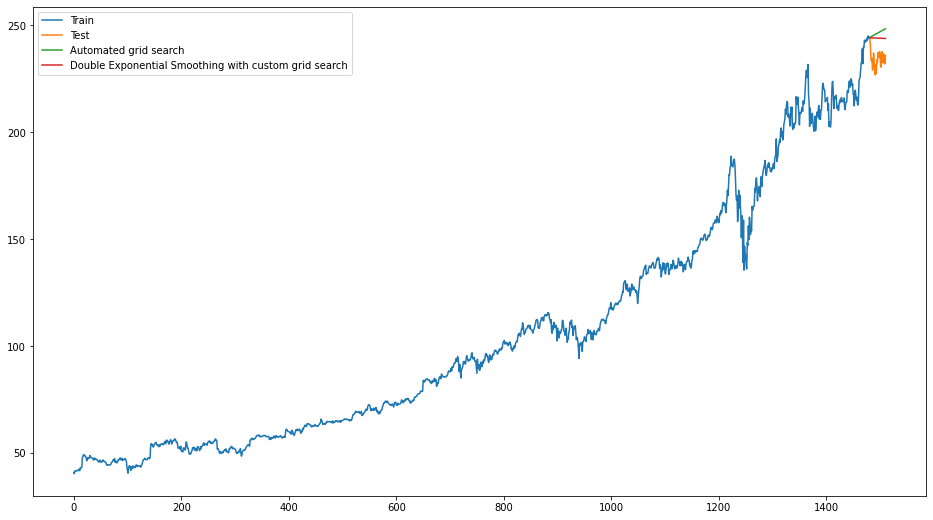

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()
